# Prosper Loan Data Exploration
#### by (Alexander Yirenkyi)


#### This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.
#### In this project, the analysis will be structured to provide simple univariate relationships to multivariate relationships; the study will address questions like whether or not the monthly loan payment has a correlation to the loan original amount, what is the term of the loan in terms of loan status, identifying the frequency of the categorical variables, such as loan term, borrower's employment status, year of loan, and loan status, are there differences between individual loans depending on how large the original loan amount was?


### Preliminary Wrangling

In [176]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette("Set2", 8, .75)

%matplotlib inline

In [177]:
# load dataset in dataframe
prosperloan = pd.read_csv('prosperLoanData.csv')

In [178]:
# calling the prosperloan dataframe 
prosperloan.head(10) 

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
5  0F05359734824199381F61D        1074836  2013-12-14 08:26:37.093000000   
6  0F0A3576754255009D63151         750899  2013-04-12 09:52:56.147000000   
7  0F1035772717087366F9EA7         768193  2013-05-05 06:49:27.493000000   
8  0F043596202561788EA13D5        1023355  2013-12-02 10:43:39.117000000   
9  0F043596202561788EA13D5        1023355  2013-12-02 10:43:39.117000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   
5         NaN    60    Current                  NaN      0.15425   
6         NaN    36    Current                  NaN      0.31032   
7         NaN    36    Current                  NaN      0.23939   
8         NaN    36    Current                  NaN      0.07620   
9         NaN    36    Current                  NaN      0.07620   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380  ...         -133.18                0.0   
1        0.0920       0.0820  ...            0.00                0.0   
2        0.2750       0.2400  ...          -24.20                0.0   
3        0.0974       0.0874  ...         -108.01                0.0   
4        0.2085       0.1985  ...          -60.27                0.0   
5        0.1314       0.1214  ...          -25.33                0.0   
6        0.2712       0.2612  ...          -22.95                0.0   
7        0.2019       0.1919  ...          -69.21                0.0   
8        0.0629       0.0529  ...          -16.77                0.0   
9        0.0629       0.0529  ...          -16.77                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   
1                    0.0                  0.0                             0.0   
2                    0.0                  0.0                             0.0   
3                    0.0                  0.0                             0.0   
4                    0.0                  0.0                             0.0   
5                    0.0                  0.0                             0.0   
6                    0.0                  0.0                             0.0   
7                    0.0                  0.0                             0.0   
8                    0.0                  0.0                             0.0   
9                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   
1            1.0                0                          0   
2            1.0                0                          0   
3            1.0                0                          0   
4            1.0                0                          0   
5            1.0                0                          0   
6            1.0                0                          0   
7            1.0                0                          0   
8            1.0                0                          0   
9            1.0                0                          0   

  InvestmentFromFriendsAmount Investors 

In [179]:
# high-level overview of data shape and composition
print(prosperloan.shape)

print(prosperloan.dtypes)

(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object


In [180]:
# Calling the columns in the dataframe. 
prosperloan.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [181]:
# Getting the informations in the dataframe
prosperloan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [182]:
# checking for duplicates
prosperloan [prosperloan.duplicated()]

Empty DataFrame
Columns: [ListingKey, ListingNumber, ListingCreationDate, CreditGrade, Term, LoanStatus, ClosedDate, BorrowerAPR, BorrowerRate, LenderYield, EstimatedEffectiveYield, EstimatedLoss, EstimatedReturn, ProsperRating (numeric), ProsperRating (Alpha), ProsperScore, ListingCategory (numeric), BorrowerState, Occupation, EmploymentStatus, EmploymentStatusDuration, IsBorrowerHomeowner, CurrentlyInGroup, GroupKey, DateCreditPulled, CreditScoreRangeLower, CreditScoreRangeUpper, FirstRecordedCreditLine, CurrentCreditLines, OpenCreditLines, TotalCreditLinespast7years, OpenRevolvingAccounts, OpenRevolvingMonthlyPayment, InquiriesLast6Months, TotalInquiries, CurrentDelinquencies, AmountDelinquent, DelinquenciesLast7Years, PublicRecordsLast10Years, PublicRecordsLast12Months, RevolvingCreditBalance, BankcardUtilization, AvailableBankcardCredit, TotalTrades, TradesNeverDelinquent (percentage), TradesOpenedLast6Months, DebtToIncomeRatio, IncomeRange, IncomeVerifiable, StatedMonthlyIncome, LoanKey, TotalProsperLoans, TotalProsperPaymentsBilled, OnTimeProsperPayments, ProsperPaymentsLessThanOneMonthLate, ProsperPaymentsOneMonthPlusLate, ProsperPrincipalBorrowed, ProsperPrincipalOutstanding, ScorexChangeAtTimeOfListing, LoanCurrentDaysDelinquent, LoanFirstDefaultedCycleNumber, LoanMonthsSinceOrigination, LoanNumber, LoanOriginalAmount, LoanOriginationDate, LoanOriginationQuarter, MemberKey, MonthlyLoanPayment, LP_CustomerPayments, LP_CustomerPrincipalPayments, LP_InterestandFees, LP_ServiceFees, LP_CollectionFees, LP_GrossPrincipalLoss, LP_NetPrincipalLoss, LP_NonPrincipalRecoverypayments, PercentFunded, Recommendations, InvestmentFromFriendsCount, InvestmentFromFriendsAmount, Investors]
Index: []

[0 rows x 81 columns]

In [183]:
# checking null values in colmun LoanStatus
prosperloan[prosperloan.LoanStatus.isnull()]

Empty DataFrame
Columns: [ListingKey, ListingNumber, ListingCreationDate, CreditGrade, Term, LoanStatus, ClosedDate, BorrowerAPR, BorrowerRate, LenderYield, EstimatedEffectiveYield, EstimatedLoss, EstimatedReturn, ProsperRating (numeric), ProsperRating (Alpha), ProsperScore, ListingCategory (numeric), BorrowerState, Occupation, EmploymentStatus, EmploymentStatusDuration, IsBorrowerHomeowner, CurrentlyInGroup, GroupKey, DateCreditPulled, CreditScoreRangeLower, CreditScoreRangeUpper, FirstRecordedCreditLine, CurrentCreditLines, OpenCreditLines, TotalCreditLinespast7years, OpenRevolvingAccounts, OpenRevolvingMonthlyPayment, InquiriesLast6Months, TotalInquiries, CurrentDelinquencies, AmountDelinquent, DelinquenciesLast7Years, PublicRecordsLast10Years, PublicRecordsLast12Months, RevolvingCreditBalance, BankcardUtilization, AvailableBankcardCredit, TotalTrades, TradesNeverDelinquent (percentage), TradesOpenedLast6Months, DebtToIncomeRatio, IncomeRange, IncomeVerifiable, StatedMonthlyIncome, LoanKey, TotalProsperLoans, TotalProsperPaymentsBilled, OnTimeProsperPayments, ProsperPaymentsLessThanOneMonthLate, ProsperPaymentsOneMonthPlusLate, ProsperPrincipalBorrowed, ProsperPrincipalOutstanding, ScorexChangeAtTimeOfListing, LoanCurrentDaysDelinquent, LoanFirstDefaultedCycleNumber, LoanMonthsSinceOrigination, LoanNumber, LoanOriginalAmount, LoanOriginationDate, LoanOriginationQuarter, MemberKey, MonthlyLoanPayment, LP_CustomerPayments, LP_CustomerPrincipalPayments, LP_InterestandFees, LP_ServiceFees, LP_CollectionFees, LP_GrossPrincipalLoss, LP_NetPrincipalLoss, LP_NonPrincipalRecoverypayments, PercentFunded, Recommendations, InvestmentFromFriendsCount, InvestmentFromFriendsAmount, Investors]
Index: []

[0 rows x 81 columns]

In [184]:
# A value count of the loan terms in months
prosperloan.Term.value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

**Based on the loan term expressed in months, the column data type should be categorical.The numerical value would be renamed as a categorical term, and the integer would be converted to a categorical value.

In [185]:
# replace the numerical value to categorical term
prosperloan.Term = prosperloan.Term.map({36: 'Medium Term', 60: 'Long Term', 12: 'Short Term'})

In [186]:
# checking the term value counts
prosperloan.Term.value_counts()

Medium Term    87778
Long Term      24545
Short Term      1614
Name: Term, dtype: int64

In [187]:
# converting the integer data type to categorical data type
prosperloan.Term = prosperloan.Term.astype('category')

In [188]:
# Validating the coversion to categorical type
prosperloan.Term.dtypes

CategoricalDtype(categories=['Long Term', 'Medium Term', 'Short Term'], ordered=False)

In [189]:
# Another interested column is the loan status. changing data type of Loan Status column to categorical
prosperloan.LoanStatus = prosperloan.LoanStatus.astype('category')

In [190]:
# Validating the coversion to categorical type
prosperloan.LoanStatus.dtype

CategoricalDtype(categories=['Cancelled', 'Chargedoff', 'Completed', 'Current',
                  'Defaulted', 'FinalPaymentInProgress',
                  'Past Due (1-15 days)', 'Past Due (16-30 days)',
                  'Past Due (31-60 days)', 'Past Due (61-90 days)',
                  'Past Due (91-120 days)', 'Past Due (>120 days)'],
, ordered=False)

**To eliminate the numeric value from the loan status coulm where we have past due as this span through different number of days but the same outcome.

In [191]:
# # replacing the past due with numeric value to just 'Past Due'
prosperloan.LoanStatus = prosperloan.LoanStatus.replace({'Past Due (1-15 days)':'Past Due', 'Past Due (16-30 days)':'Past Due',
                  'Past Due (31-60 days)':'Past Due', 'Past Due (61-90 days)' :'Past Due',
                  'Past Due (91-120 days)' :'Past Due', 'Past Due (>120 days)' :'Past Due'})

In [192]:
# check the values
prosperloan.LoanStatus.dtypes

CategoricalDtype(categories=['Cancelled', 'Chargedoff', 'Completed', 'Current',
                  'Defaulted', 'FinalPaymentInProgress', 'Past Due'],
, ordered=False)

**Converting the loan origination date column from object to datetime and extracting the year out of the column for analysis**

In [193]:
# Value count of loan origination date
prosperloan.LoanOriginationDate.value_counts()

2014-01-22 00:00:00    491
2013-11-13 00:00:00    490
2014-02-19 00:00:00    439
2013-10-16 00:00:00    434
2014-01-28 00:00:00    339
                      ... 
2006-02-03 00:00:00      1
2006-01-24 00:00:00      1
2005-11-18 00:00:00      1
2009-07-20 00:00:00      1
2005-11-15 00:00:00      1
Name: LoanOriginationDate, Length: 1873, dtype: int64

In [194]:
# converting to datetime
prosperloan.LoanOriginationDate = pd.to_datetime(prosperloan.LoanOriginationDate)

In [195]:
# extracting year from the column
prosperloan['Year'] = pd.DatetimeIndex(prosperloan['LoanOriginationDate']).year

In [196]:
prosperloan.Year = prosperloan.Year.astype('category')

In [197]:
prosperloan.Year.dtypes

CategoricalDtype(categories=[2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014], ordered=False)

In [198]:
# Employment status value count
prosperloan.EmploymentStatus.value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [199]:
# To determine the sum of missing values
prosperloan.EmploymentStatus.isnull().sum() 

2255

In [200]:
# replacing the missing value withrhe dominant value
prosperloan.EmploymentStatus.fillna('Employed', inplace = True) 

In [201]:
# To check for missing values
prosperloan[prosperloan.EmploymentStatus.isnull()]

Empty DataFrame
Columns: [ListingKey, ListingNumber, ListingCreationDate, CreditGrade, Term, LoanStatus, ClosedDate, BorrowerAPR, BorrowerRate, LenderYield, EstimatedEffectiveYield, EstimatedLoss, EstimatedReturn, ProsperRating (numeric), ProsperRating (Alpha), ProsperScore, ListingCategory (numeric), BorrowerState, Occupation, EmploymentStatus, EmploymentStatusDuration, IsBorrowerHomeowner, CurrentlyInGroup, GroupKey, DateCreditPulled, CreditScoreRangeLower, CreditScoreRangeUpper, FirstRecordedCreditLine, CurrentCreditLines, OpenCreditLines, TotalCreditLinespast7years, OpenRevolvingAccounts, OpenRevolvingMonthlyPayment, InquiriesLast6Months, TotalInquiries, CurrentDelinquencies, AmountDelinquent, DelinquenciesLast7Years, PublicRecordsLast10Years, PublicRecordsLast12Months, RevolvingCreditBalance, BankcardUtilization, AvailableBankcardCredit, TotalTrades, TradesNeverDelinquent (percentage), TradesOpenedLast6Months, DebtToIncomeRatio, IncomeRange, IncomeVerifiable, StatedMonthlyIncome, LoanKey, TotalProsperLoans, TotalProsperPaymentsBilled, OnTimeProsperPayments, ProsperPaymentsLessThanOneMonthLate, ProsperPaymentsOneMonthPlusLate, ProsperPrincipalBorrowed, ProsperPrincipalOutstanding, ScorexChangeAtTimeOfListing, LoanCurrentDaysDelinquent, LoanFirstDefaultedCycleNumber, LoanMonthsSinceOrigination, LoanNumber, LoanOriginalAmount, LoanOriginationDate, LoanOriginationQuarter, MemberKey, MonthlyLoanPayment, LP_CustomerPayments, LP_CustomerPrincipalPayments, LP_InterestandFees, LP_ServiceFees, LP_CollectionFees, LP_GrossPrincipalLoss, LP_NetPrincipalLoss, LP_NonPrincipalRecoverypayments, PercentFunded, Recommendations, InvestmentFromFriendsCount, InvestmentFromFriendsAmount, Investors, Year]
Index: []

[0 rows x 82 columns]

In [202]:
# change the data type to categorical variables
prosperloan.EmploymentStatus = prosperloan.EmploymentStatus.astype('category')

In [203]:
# To validate the data type of employment status
prosperloan.EmploymentStatus.dtypes

CategoricalDtype(categories=['Employed', 'Full-time', 'Not available', 'Not employed',
                  'Other', 'Part-time', 'Retired', 'Self-employed'],
, ordered=False)

In [204]:
# sum of missing values in occupation column
prosperloan.Occupation.isnull().sum()

3588

In [205]:
# replace null with Unknown
prosperloan.Occupation.fillna('Unknown', inplace = True)

In [206]:
# check for null records
prosperloan[prosperloan.Occupation.isnull()]

Empty DataFrame
Columns: [ListingKey, ListingNumber, ListingCreationDate, CreditGrade, Term, LoanStatus, ClosedDate, BorrowerAPR, BorrowerRate, LenderYield, EstimatedEffectiveYield, EstimatedLoss, EstimatedReturn, ProsperRating (numeric), ProsperRating (Alpha), ProsperScore, ListingCategory (numeric), BorrowerState, Occupation, EmploymentStatus, EmploymentStatusDuration, IsBorrowerHomeowner, CurrentlyInGroup, GroupKey, DateCreditPulled, CreditScoreRangeLower, CreditScoreRangeUpper, FirstRecordedCreditLine, CurrentCreditLines, OpenCreditLines, TotalCreditLinespast7years, OpenRevolvingAccounts, OpenRevolvingMonthlyPayment, InquiriesLast6Months, TotalInquiries, CurrentDelinquencies, AmountDelinquent, DelinquenciesLast7Years, PublicRecordsLast10Years, PublicRecordsLast12Months, RevolvingCreditBalance, BankcardUtilization, AvailableBankcardCredit, TotalTrades, TradesNeverDelinquent (percentage), TradesOpenedLast6Months, DebtToIncomeRatio, IncomeRange, IncomeVerifiable, StatedMonthlyIncome, LoanKey, TotalProsperLoans, TotalProsperPaymentsBilled, OnTimeProsperPayments, ProsperPaymentsLessThanOneMonthLate, ProsperPaymentsOneMonthPlusLate, ProsperPrincipalBorrowed, ProsperPrincipalOutstanding, ScorexChangeAtTimeOfListing, LoanCurrentDaysDelinquent, LoanFirstDefaultedCycleNumber, LoanMonthsSinceOrigination, LoanNumber, LoanOriginalAmount, LoanOriginationDate, LoanOriginationQuarter, MemberKey, MonthlyLoanPayment, LP_CustomerPayments, LP_CustomerPrincipalPayments, LP_InterestandFees, LP_ServiceFees, LP_CollectionFees, LP_GrossPrincipalLoss, LP_NetPrincipalLoss, LP_NonPrincipalRecoverypayments, PercentFunded, Recommendations, InvestmentFromFriendsCount, InvestmentFromFriendsAmount, Investors, Year]
Index: []

[0 rows x 82 columns]

In [207]:
# convert to category data type
prosperloan.Occupation = prosperloan.Occupation.astype('category')

In [208]:
# To check data type
prosperloan.Occupation.dtype

CategoricalDtype(categories=['Accountant/CPA', 'Administrative Assistant', 'Analyst',
                  'Architect', 'Attorney', 'Biologist', 'Bus Driver',
                  'Car Dealer', 'Chemist', 'Civil Service', 'Clergy',
                  'Clerical', 'Computer Programmer', 'Construction', 'Dentist',
                  'Doctor', 'Engineer - Chemical', 'Engineer - Electrical',
                  'Engineer - Mechanical', 'Executive', 'Fireman',
                  'Flight Attendant', 'Food Service',
                  'Food Service Management', 'Homemaker', 'Investor', 'Judge',
                  'Laborer', 'Landscaping', 'Medical Technician',
                  'Military Enlisted', 'Military Officer', 'Nurse (LPN)',
                  'Nurse (RN)', 'Nurse's Aide', 'Other', 'Pharmacist',
                  'Pilot - Private/Commercial',
                  'Police Officer/Correction Officer', 'Postal Service',
                  'Principal', 'Professional', 'Professor', 'Psychologist',
          

In [209]:
# fill missing state with unknown
prosperloan.BorrowerState.fillna('Unknown', inplace = True)

In [210]:
# convert data type to categorical
prosperloan.BorrowerState = prosperloan.BorrowerState.astype('category')

In [211]:
# Validating the data type
prosperloan.BorrowerState.dtypes

CategoricalDtype(categories=['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL',
                  'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA',
                  'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE',
                  'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI',
                  'SC', 'SD', 'TN', 'TX', 'UT', 'Unknown', 'VA', 'VT', 'WA',
                  'WI', 'WV', 'WY'],
, ordered=False)

In [212]:
# Replacing the sate abbrevation
state = {'WA': 'WASHINGTON', 'VA': 'VIRGINIA', 'DE': 'DELAWARE', 
         'DC': 'DISTRICT OF COLUMBIA', 'WI': 'WISCONSIN', 'WV': 'WEST VIRGINIA',
         'HI': 'HAWAII', 'FL': 'FLORIDA', 'WY': 'WYOMING', 
         'NH': 'NEW HAMPSHIRE', 'NJ': 'NEW JERSEY', 'NM': 'NEW MEXICO', 
         'TX': 'TEXAS', 'LA': 'LOUISIANA', 'NC': 'NORTH CAROLINA', 
         'ND': 'NORTH DAKOTA', 'NE': 'NEBRASKA', 'TN': 'TENNESSEE',
         'NY': 'NEW YORK', 'PA': 'PENNSYLVANIA', 'CA': 'CALIFORNIA',
         'NV': 'NEVADA', 'CO': 'COLORADO', 'VI': 'VIRGIN ISLANDS', 
         'AK': 'ALASKA', 'AL': 'ALABAMA',  'AR': 'ARKANSAS', 
         'VT': 'VERMONT', 'IL': 'ILLINOIS', 'GA': 'GEORGIA', 
         'IN': 'INDIANA', 'IA': 'IOWA', 'OK': 'OKLAHOMA', 
         'AZ': 'ARIZONA', 'ID': 'IDAHO', 'CT': 'CONNECTICUT', 
         'ME': 'MAINE', 'MD': 'MARYLAND', 'MA': 'MASSACHUSETTS', 
         'OH': 'OHIO', 'UT': 'UTAH', 'MO': 'MISSOURI',
         'MN': 'MINNESOTA', 'MI': 'MICHIGAN', 'RI': 'RHODE ISLAND',
         'KS': 'KANSAS', 'MT': 'MONTANA', 'MS': 'MISSISSIPPI', 
         'SC': 'SOUTH CAROLINA', 'KY': 'KENTUCKY', 'OR': 'OREGON', 
         'SD': 'SOUTH DAKOTA', 'Unknown': 'UNKNOWN' }

In [213]:
prosperloan.BorrowerState = prosperloan.BorrowerState.map(state)

In [214]:
# To validate the abbrevation replacement
prosperloan.BorrowerState.value_counts()

CALIFORNIA              14717
TEXAS                    6842
NEW YORK                 6729
FLORIDA                  6720
ILLINOIS                 5921
UNKNOWN                  5515
GEORGIA                  5008
OHIO                     4197
MICHIGAN                 3593
VIRGINIA                 3278
NEW JERSEY               3097
NORTH CAROLINA           3084
WASHINGTON               3048
PENNSYLVANIA             2972
MARYLAND                 2821
MISSOURI                 2615
MINNESOTA                2318
MASSACHUSETTS            2242
COLORADO                 2210
INDIANA                  2078
ARIZONA                  1901
WISCONSIN                1842
OREGON                   1817
TENNESSEE                1737
ALABAMA                  1679
CONNECTICUT              1627
SOUTH CAROLINA           1122
NEVADA                   1090
KANSAS                   1062
KENTUCKY                  983
OKLAHOMA                  971
LOUISIANA                 954
UTAH                      877
ARKANSAS  

In [215]:
# convert from float to integer
prosperloan.MonthlyLoanPayment = prosperloan.MonthlyLoanPayment.astype(int)

In [216]:
# convert from float to integer
prosperloan.StatedMonthlyIncome = prosperloan.StatedMonthlyIncome.astype(int)

#### The data set consists of 113,937 rows with 81 features.
#### There are a number of features that are relevant to this study, including but not limited to loan status, loan term, employment status, whether the borrower is a homeowner or not, borrower state, income verifiability or not, and occupation. Most variables are numeric in nature but changes has been made to some features that are of interest. 
#### For a better understanding of how this study would be conducted, a number of features would be involved such as original loan amount, monthly loan payment, current days of delinquency, stated monthly income, investors,
#### While the dataframe contains 81 features, this study is only interested in few of them, so reducing the dataframe to the useful columns would be appropriate. For analysis, the following line of code would be executed.

In [217]:
# Creating a new dataframe for the reduced data features relevant to the project
prosperloan_reduced = prosperloan[['LoanOriginationDate','Term', 'Year', 'LoanStatus', 'BorrowerState', 'Occupation', 
                     'EmploymentStatus', 'IsBorrowerHomeowner', 'LoanCurrentDaysDelinquent',
                     'IncomeVerifiable', 'StatedMonthlyIncome', 'LoanOriginalAmount', 
                     'MonthlyLoanPayment','Recommendations', 'Investors']]

In [218]:
# save the shrinked df as a csv file
prosperloan_reduced.to_csv('prosperloan_reduced.csv', index = False)

In [219]:
# high-level overview of data shape and composition
print(prosperloan_reduced.shape)
print(prosperloan_reduced.dtypes)

(113937, 15)
LoanOriginationDate          datetime64[ns]
Term                               category
Year                               category
LoanStatus                         category
BorrowerState                      category
Occupation                         category
EmploymentStatus                   category
IsBorrowerHomeowner                    bool
LoanCurrentDaysDelinquent             int64
IncomeVerifiable                       bool
StatedMonthlyIncome                   int32
LoanOriginalAmount                    int64
MonthlyLoanPayment                    int32
Recommendations                       int64
Investors                             int64
dtype: object


In [220]:
prosperloan_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   LoanOriginationDate        113937 non-null  datetime64[ns]
 1   Term                       113937 non-null  category      
 2   Year                       113937 non-null  category      
 3   LoanStatus                 113937 non-null  category      
 4   BorrowerState              113937 non-null  category      
 5   Occupation                 113937 non-null  category      
 6   EmploymentStatus           113937 non-null  category      
 7   IsBorrowerHomeowner        113937 non-null  bool          
 8   LoanCurrentDaysDelinquent  113937 non-null  int64         
 9   IncomeVerifiable           113937 non-null  bool          
 10  StatedMonthlyIncome        113937 non-null  int32         
 11  LoanOriginalAmount         113937 non-null  int64   

In [221]:
prosperloan_reduced.describe()

LoanCurrentDaysDelinquent  StatedMonthlyIncome  LoanOriginalAmount  \
count              113937.000000         1.139370e+05        113937.00000   
mean                  152.816539         5.607707e+03          8337.01385   
std                   466.320254         7.478491e+03          6245.80058   
min                     0.000000         0.000000e+00          1000.00000   
25%                     0.000000         3.200000e+03          4000.00000   
50%                     0.000000         4.666000e+03          6500.00000   
75%                     0.000000         6.825000e+03         12000.00000   
max                  2704.000000         1.750002e+06         35000.00000   

       MonthlyLoanPayment  Recommendations      Investors  
count       113937.000000    113937.000000  113937.000000  
mean           271.978128         0.048027      80.475228  
std            192.701916         0.332353     103.239020  
min              0.000000         0.000000       1.000000  
25%            131.000000         0.000000       2.000000  
50%            217.000000         0.000000      44.000000  
75%            371.000000         0.000000     115.000000  
max           2251.000000        39.000000    1189.000000

## Univariate Exploration

Determine whether the distribution of the numerical variables loan original amount and monthly loan payment is symmetric or asymmetric by plotting the distributions.

In [222]:
# defining a function to plot histogram
def draw_hist(x, title):
    """plot histogram to show 
    dist of numeric variable"""
    """param: x, title"""
    """return none"""
    plt.figure(figsize=(8,5), dpi = 400)
    plt.hist(x = x)
    plt.title(title)
    plt.xlabel('Amount (Dollars)', fontsize = 10)
    plt.ylabel('Distribution', fontsize = 10)

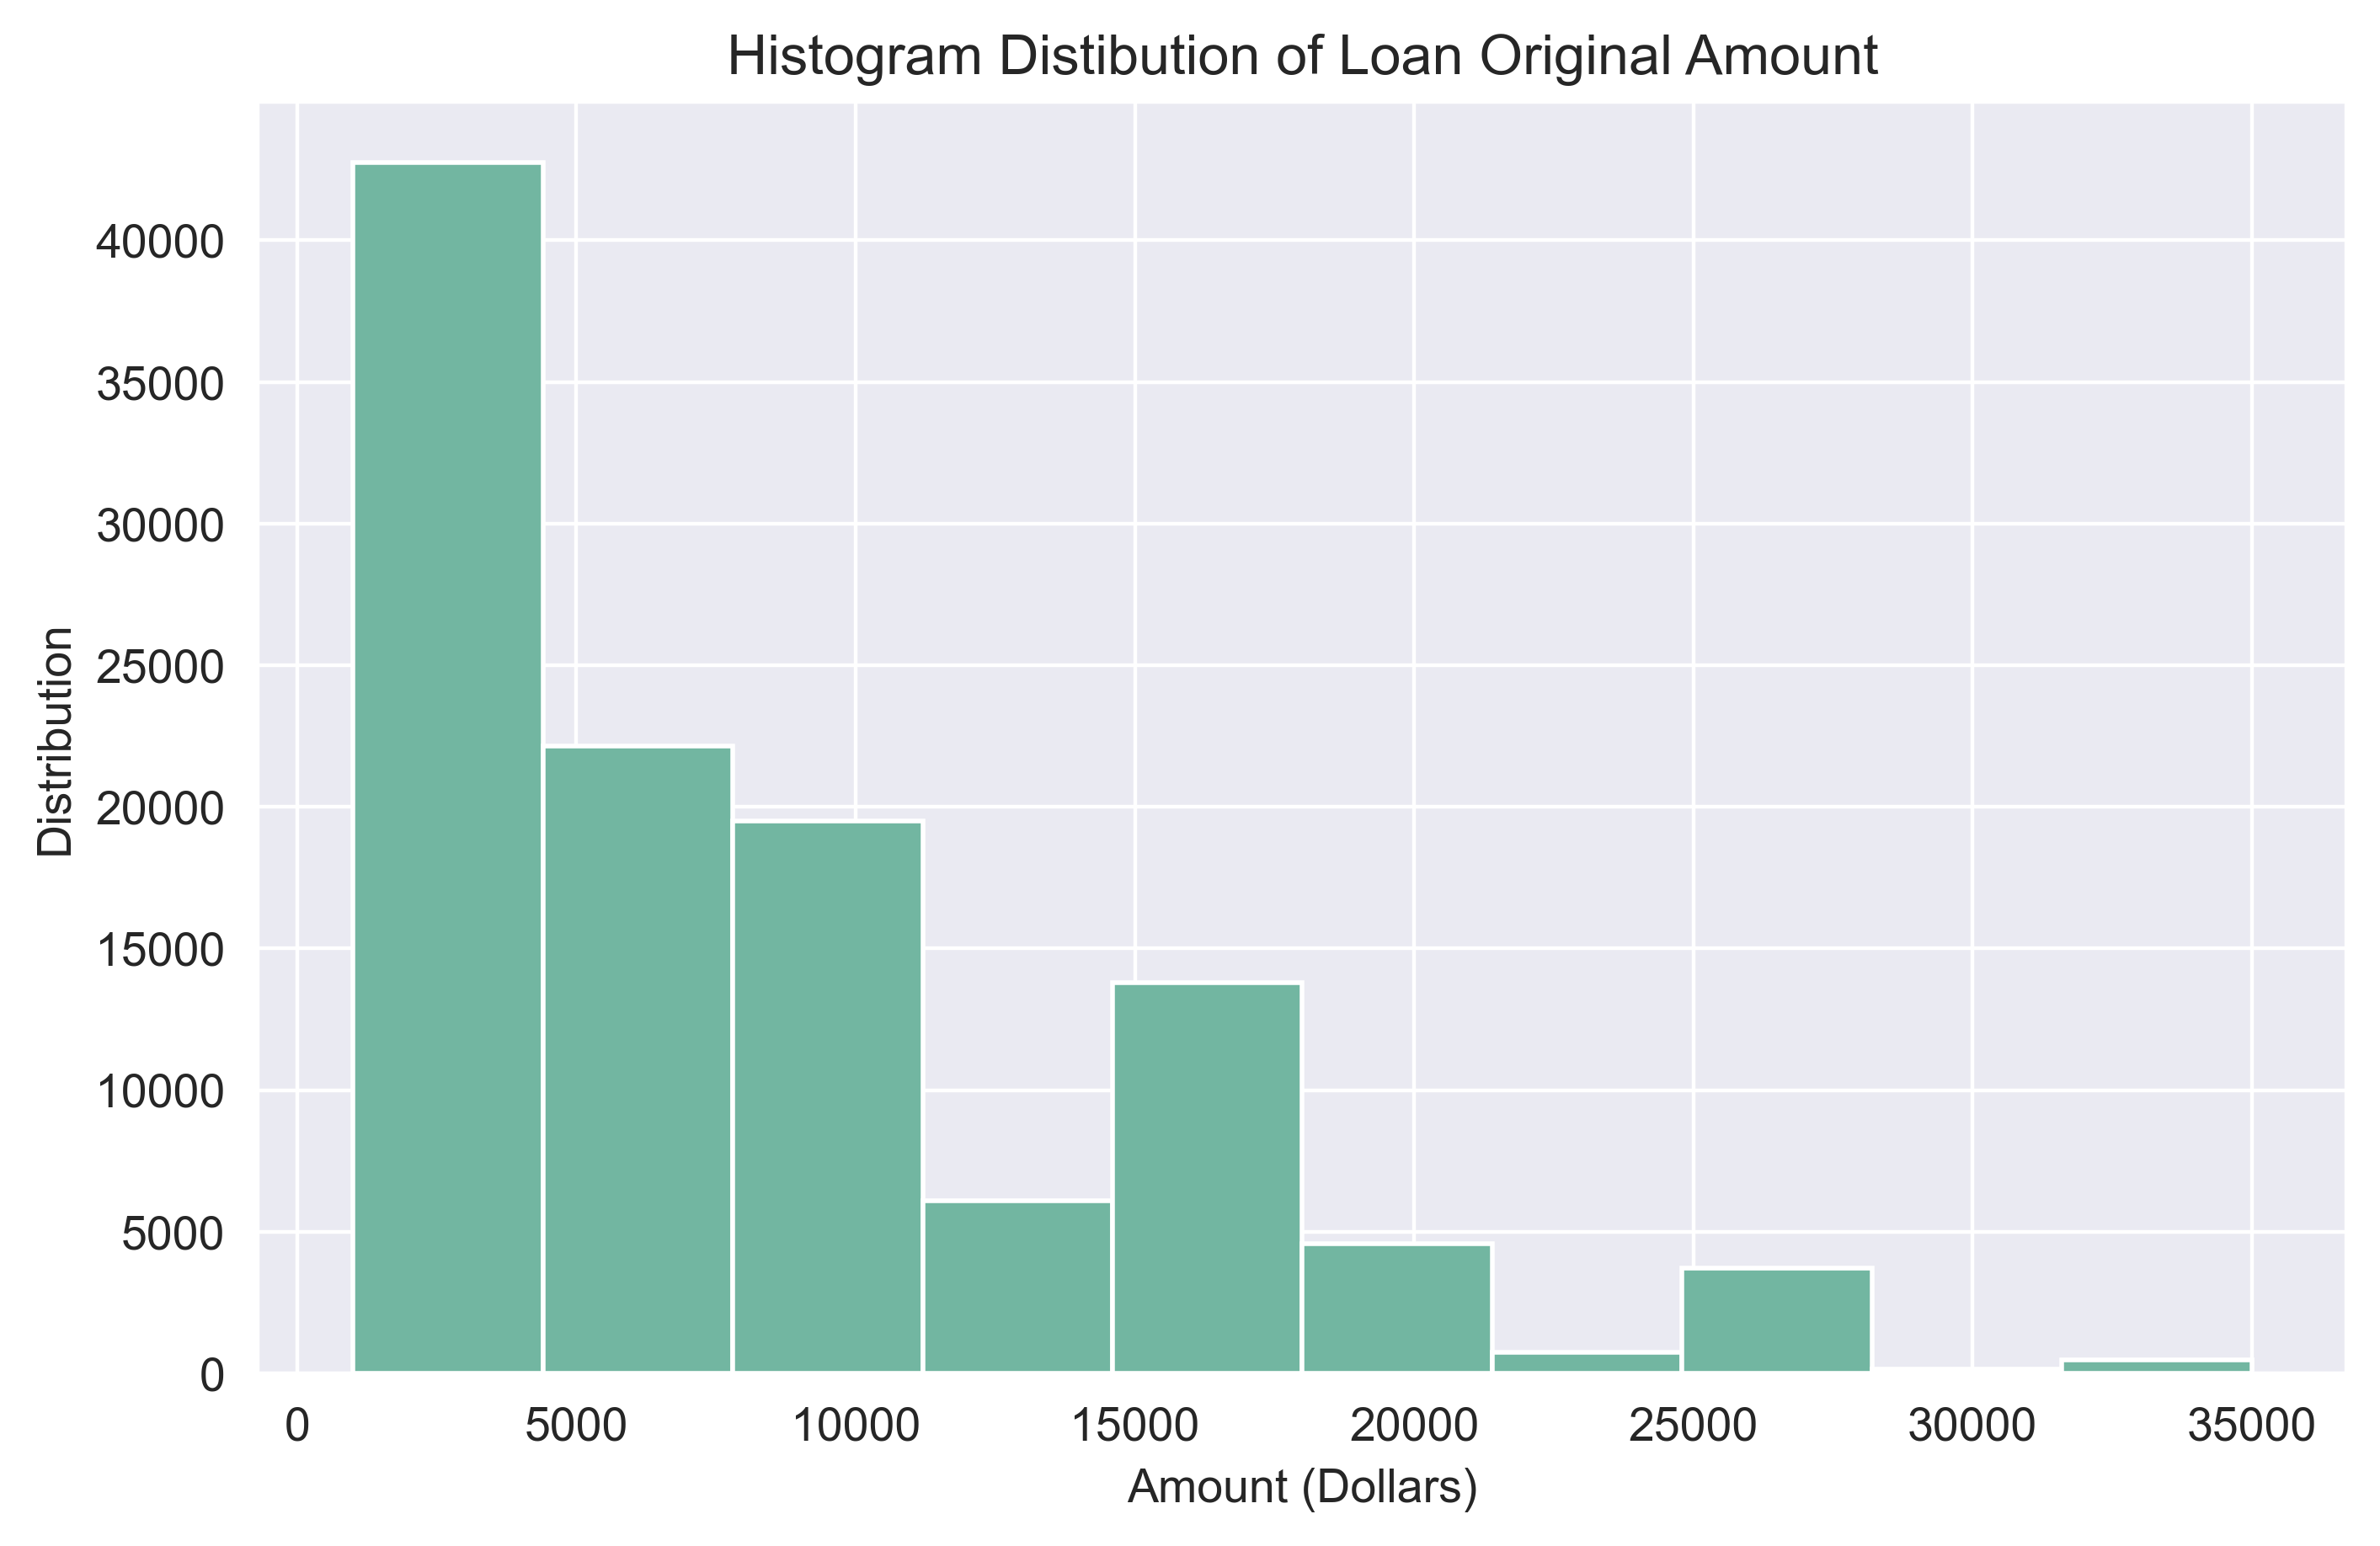

In [223]:
# call func to plot hist of loan original amount
draw_hist(prosperloan_reduced.LoanOriginalAmount, 'Histogram Distibution of Loan Original Amount')

Graphs such as the one above show right-skewed data, which is characteristic of symmetrical distributions.The majority of the original loan amount is located on the left side of the histogram.At about 5000 dollars, the original loan amount peaks,In the range of 32,000 dollars to 35000 dollars, an outlier is indicated by the isolated bar.

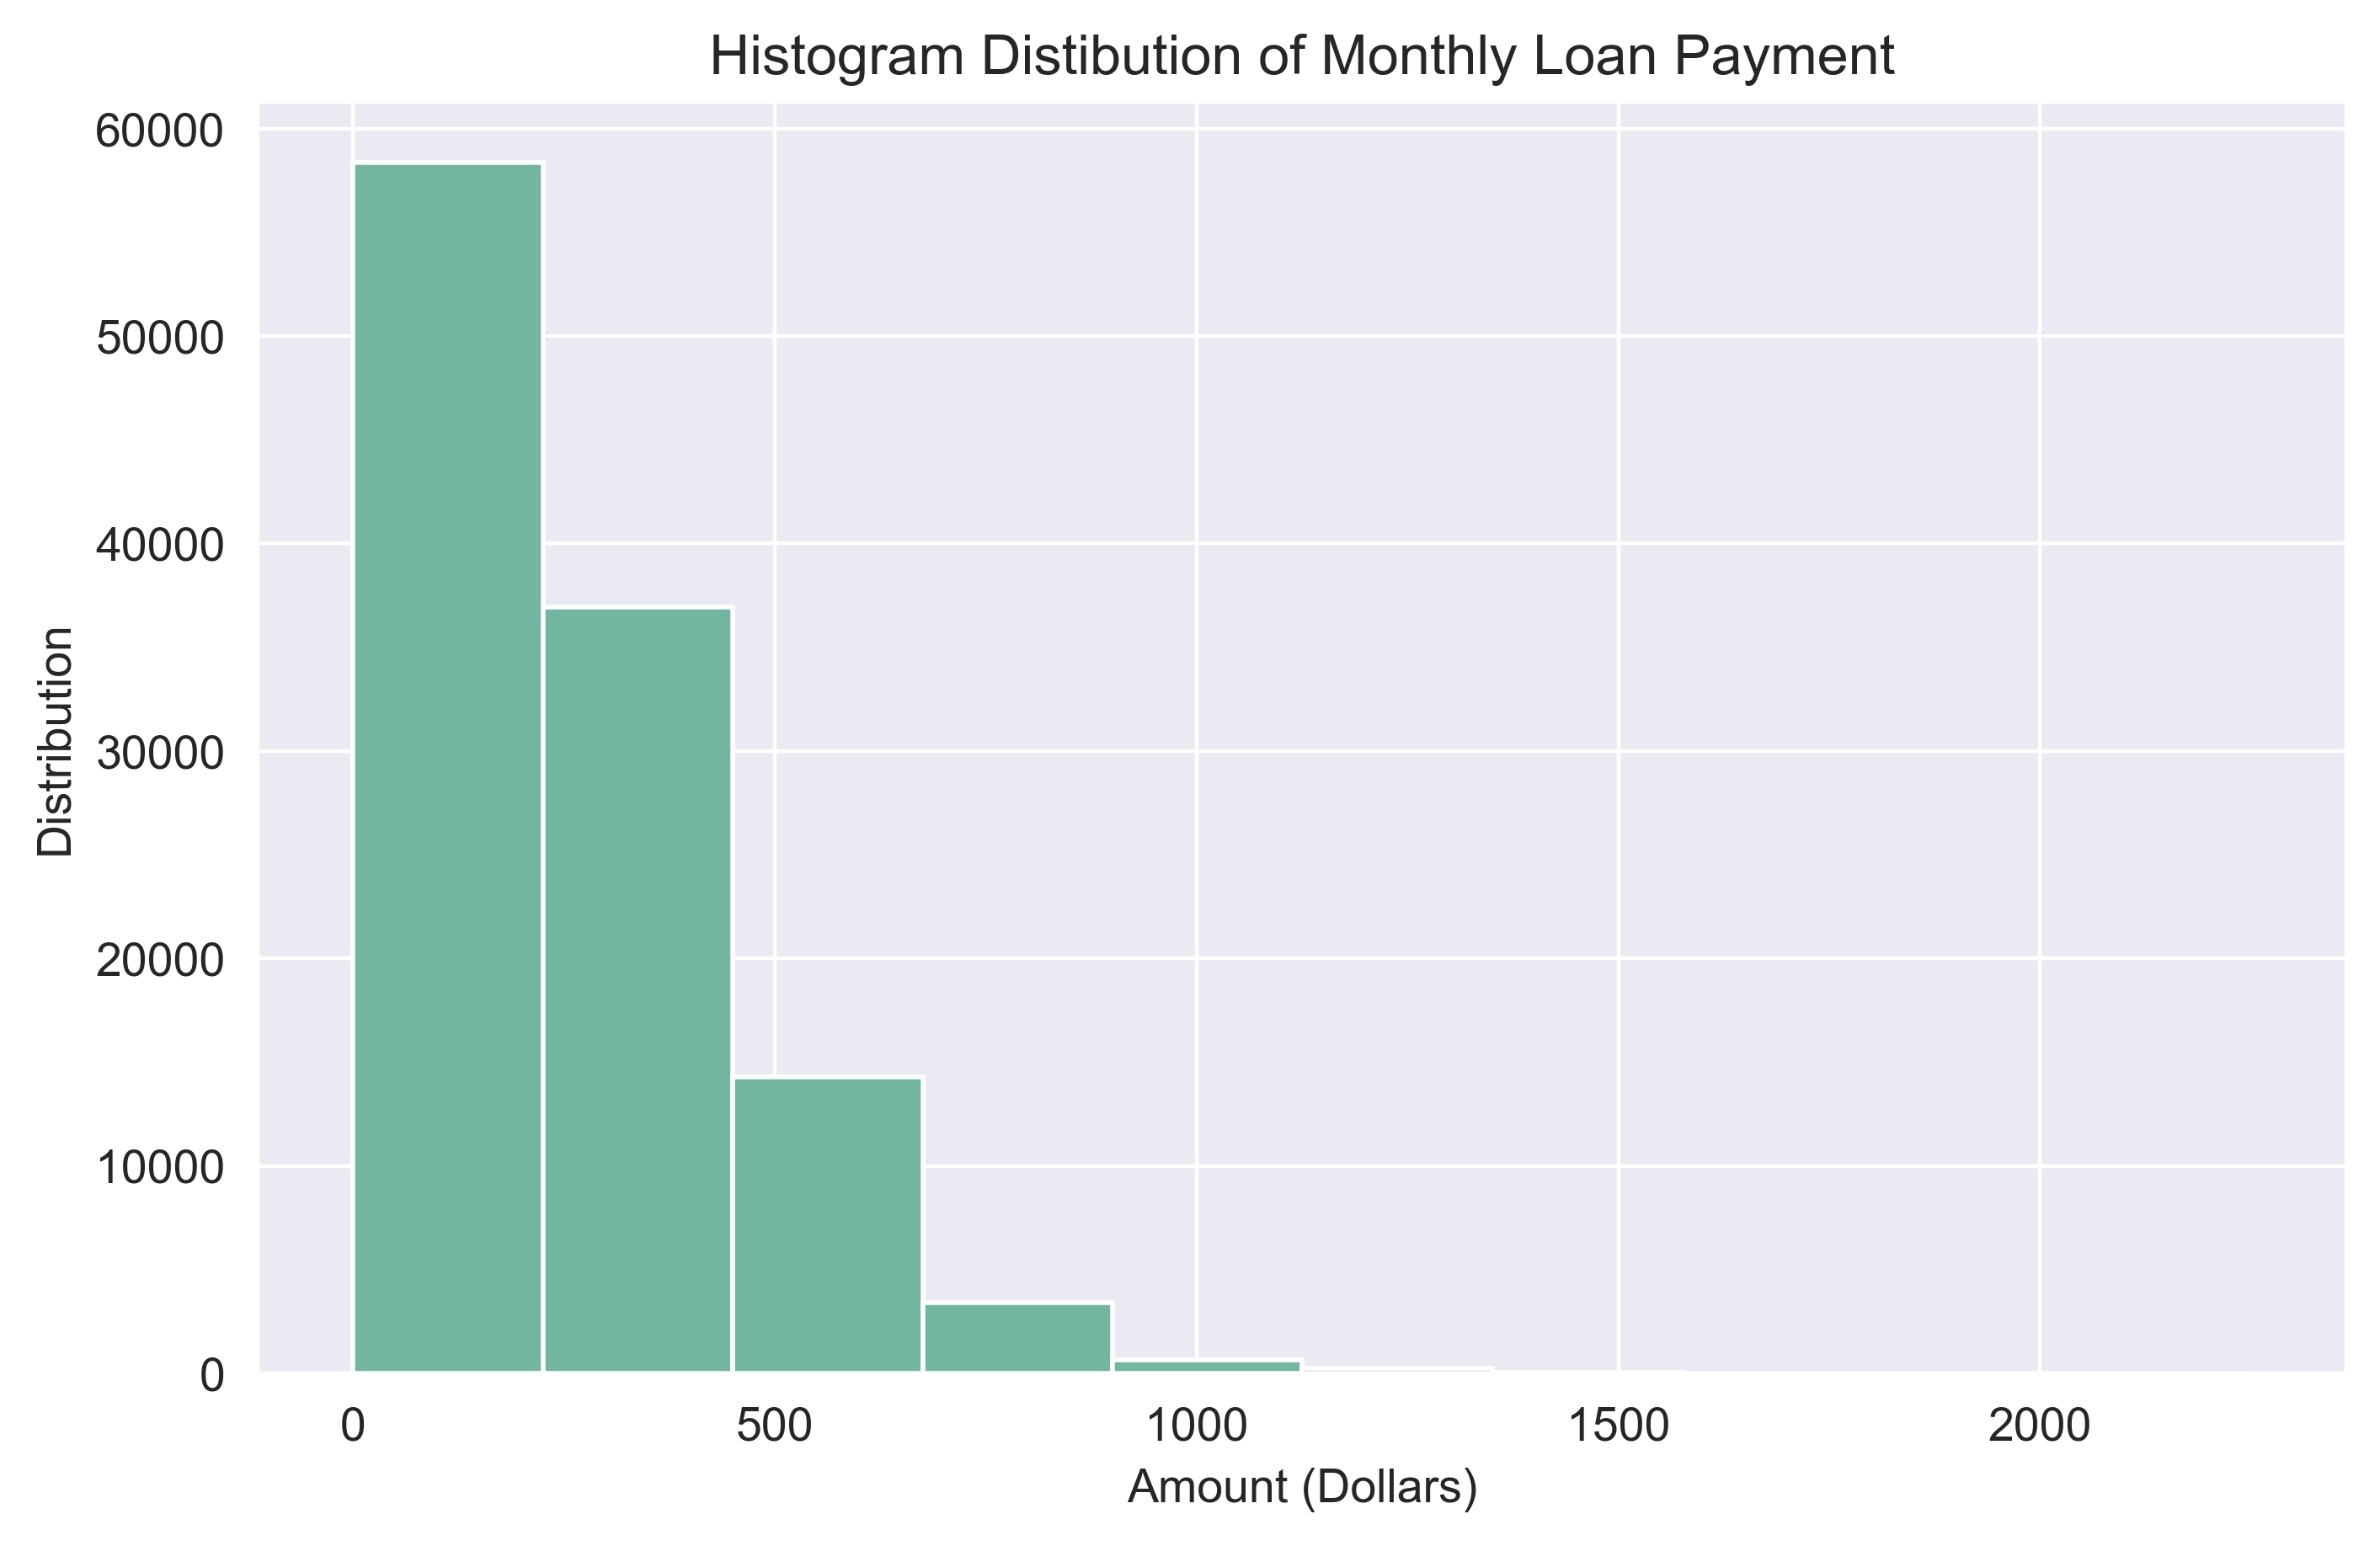

In [224]:
# call func to plot hist of monthly loan payment
draw_hist(prosperloan_reduced.MonthlyLoanPayment, 'Histogram Distibution of Monthly Loan Payment')

According to the above graph, the data are right-skewed, a case of symmetrical distribution.The majority of loan payments are clustered on the left side of the histogram.At about 173 dollars, the initial loan amount peaks.

#### This study examines the frequency of categorical variables: term of loan, borrower's employment status, year of loan, and loan status.

In [225]:
# a func to plot a univariate countplot
def univariate_count_plot(x, title):
    """plot a countplot"""
    """param: x, title"""
    """return none"""
    plt.figure(figsize=(8,6), dpi = 400)
    ax = sns.countplot(x = x, data = prosperloan_reduced, color = 'blue')
    for p in ax.patches:
      ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0, p.get_height()+0.05))
    plt.suptitle(title)
    plt.xticks(rotation = 90)
    plt.plot()   
plt.show();

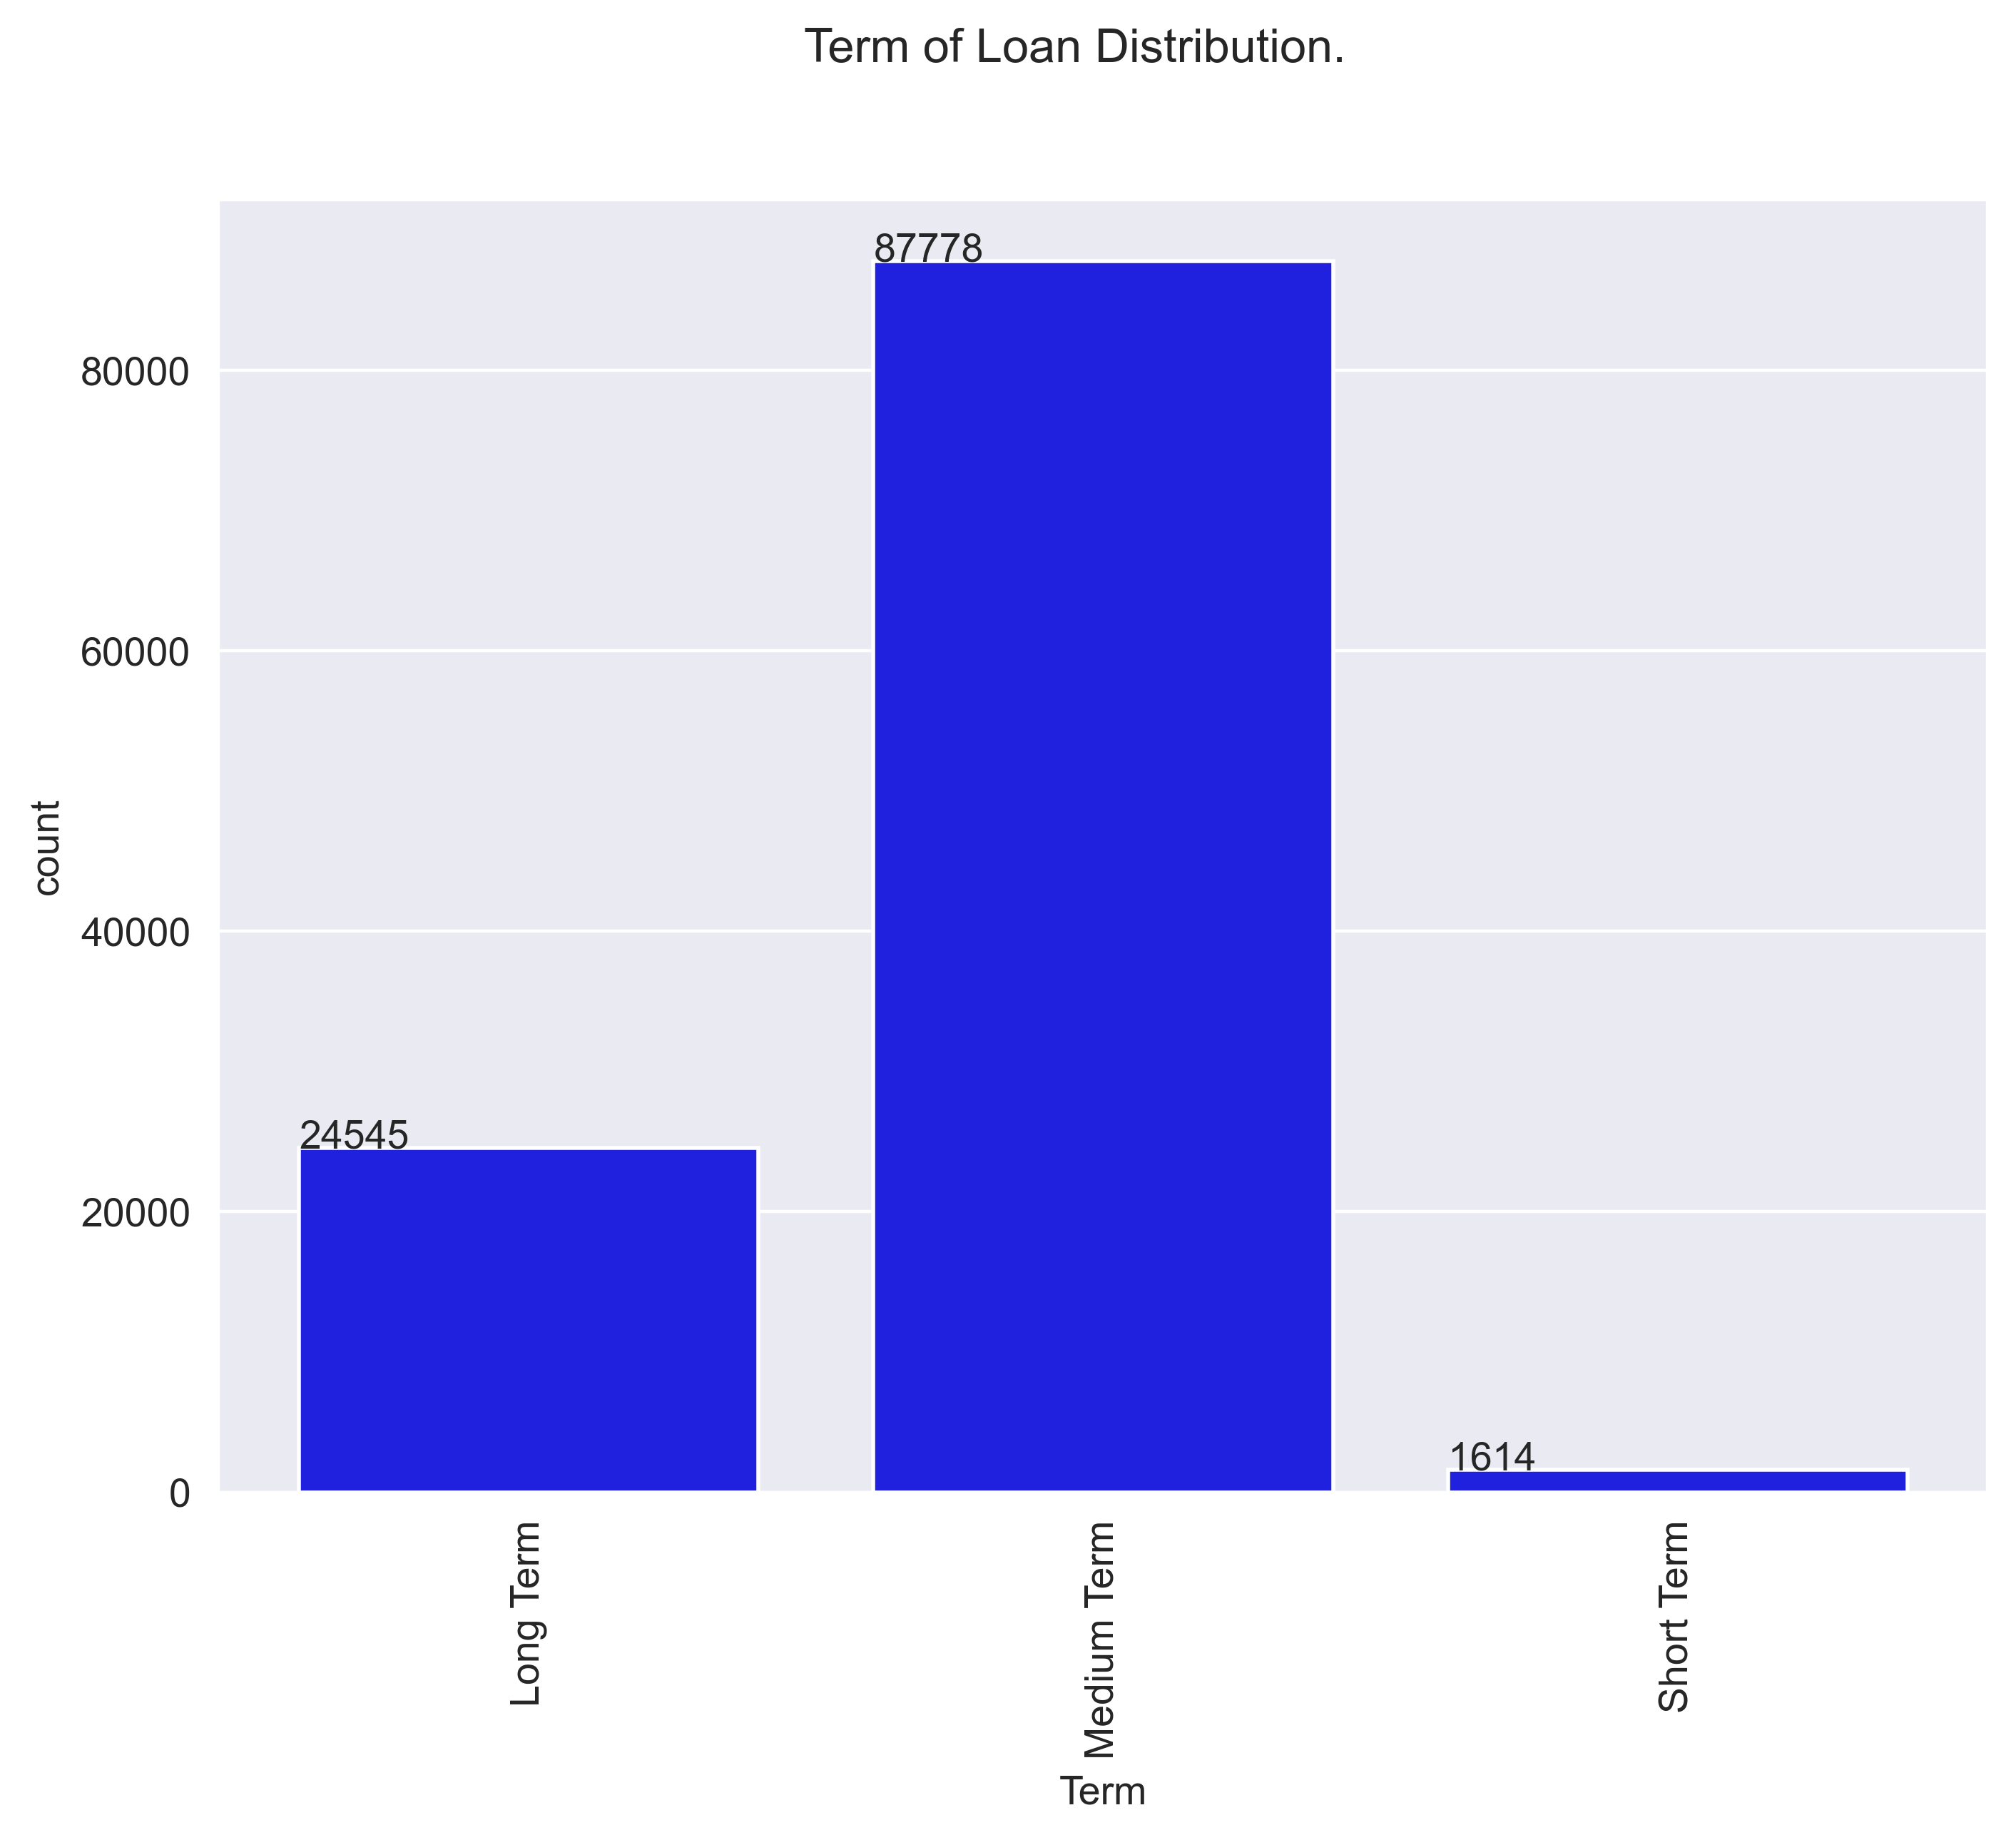

In [226]:
univariate_count_plot('Term', 'Term of Loan Distribution.')

The above shows that mediu loan term has more count, relating to the fact that more medium loan term are sorted. There is minimal short term loan as compared to long term. The medium term, in this case 36 months, accounted for the majority of disbursed loans, with 87778 loans, representing approximately 77 percent of the total loan term duration, with the remaining 23 percent divided between long and short terms.

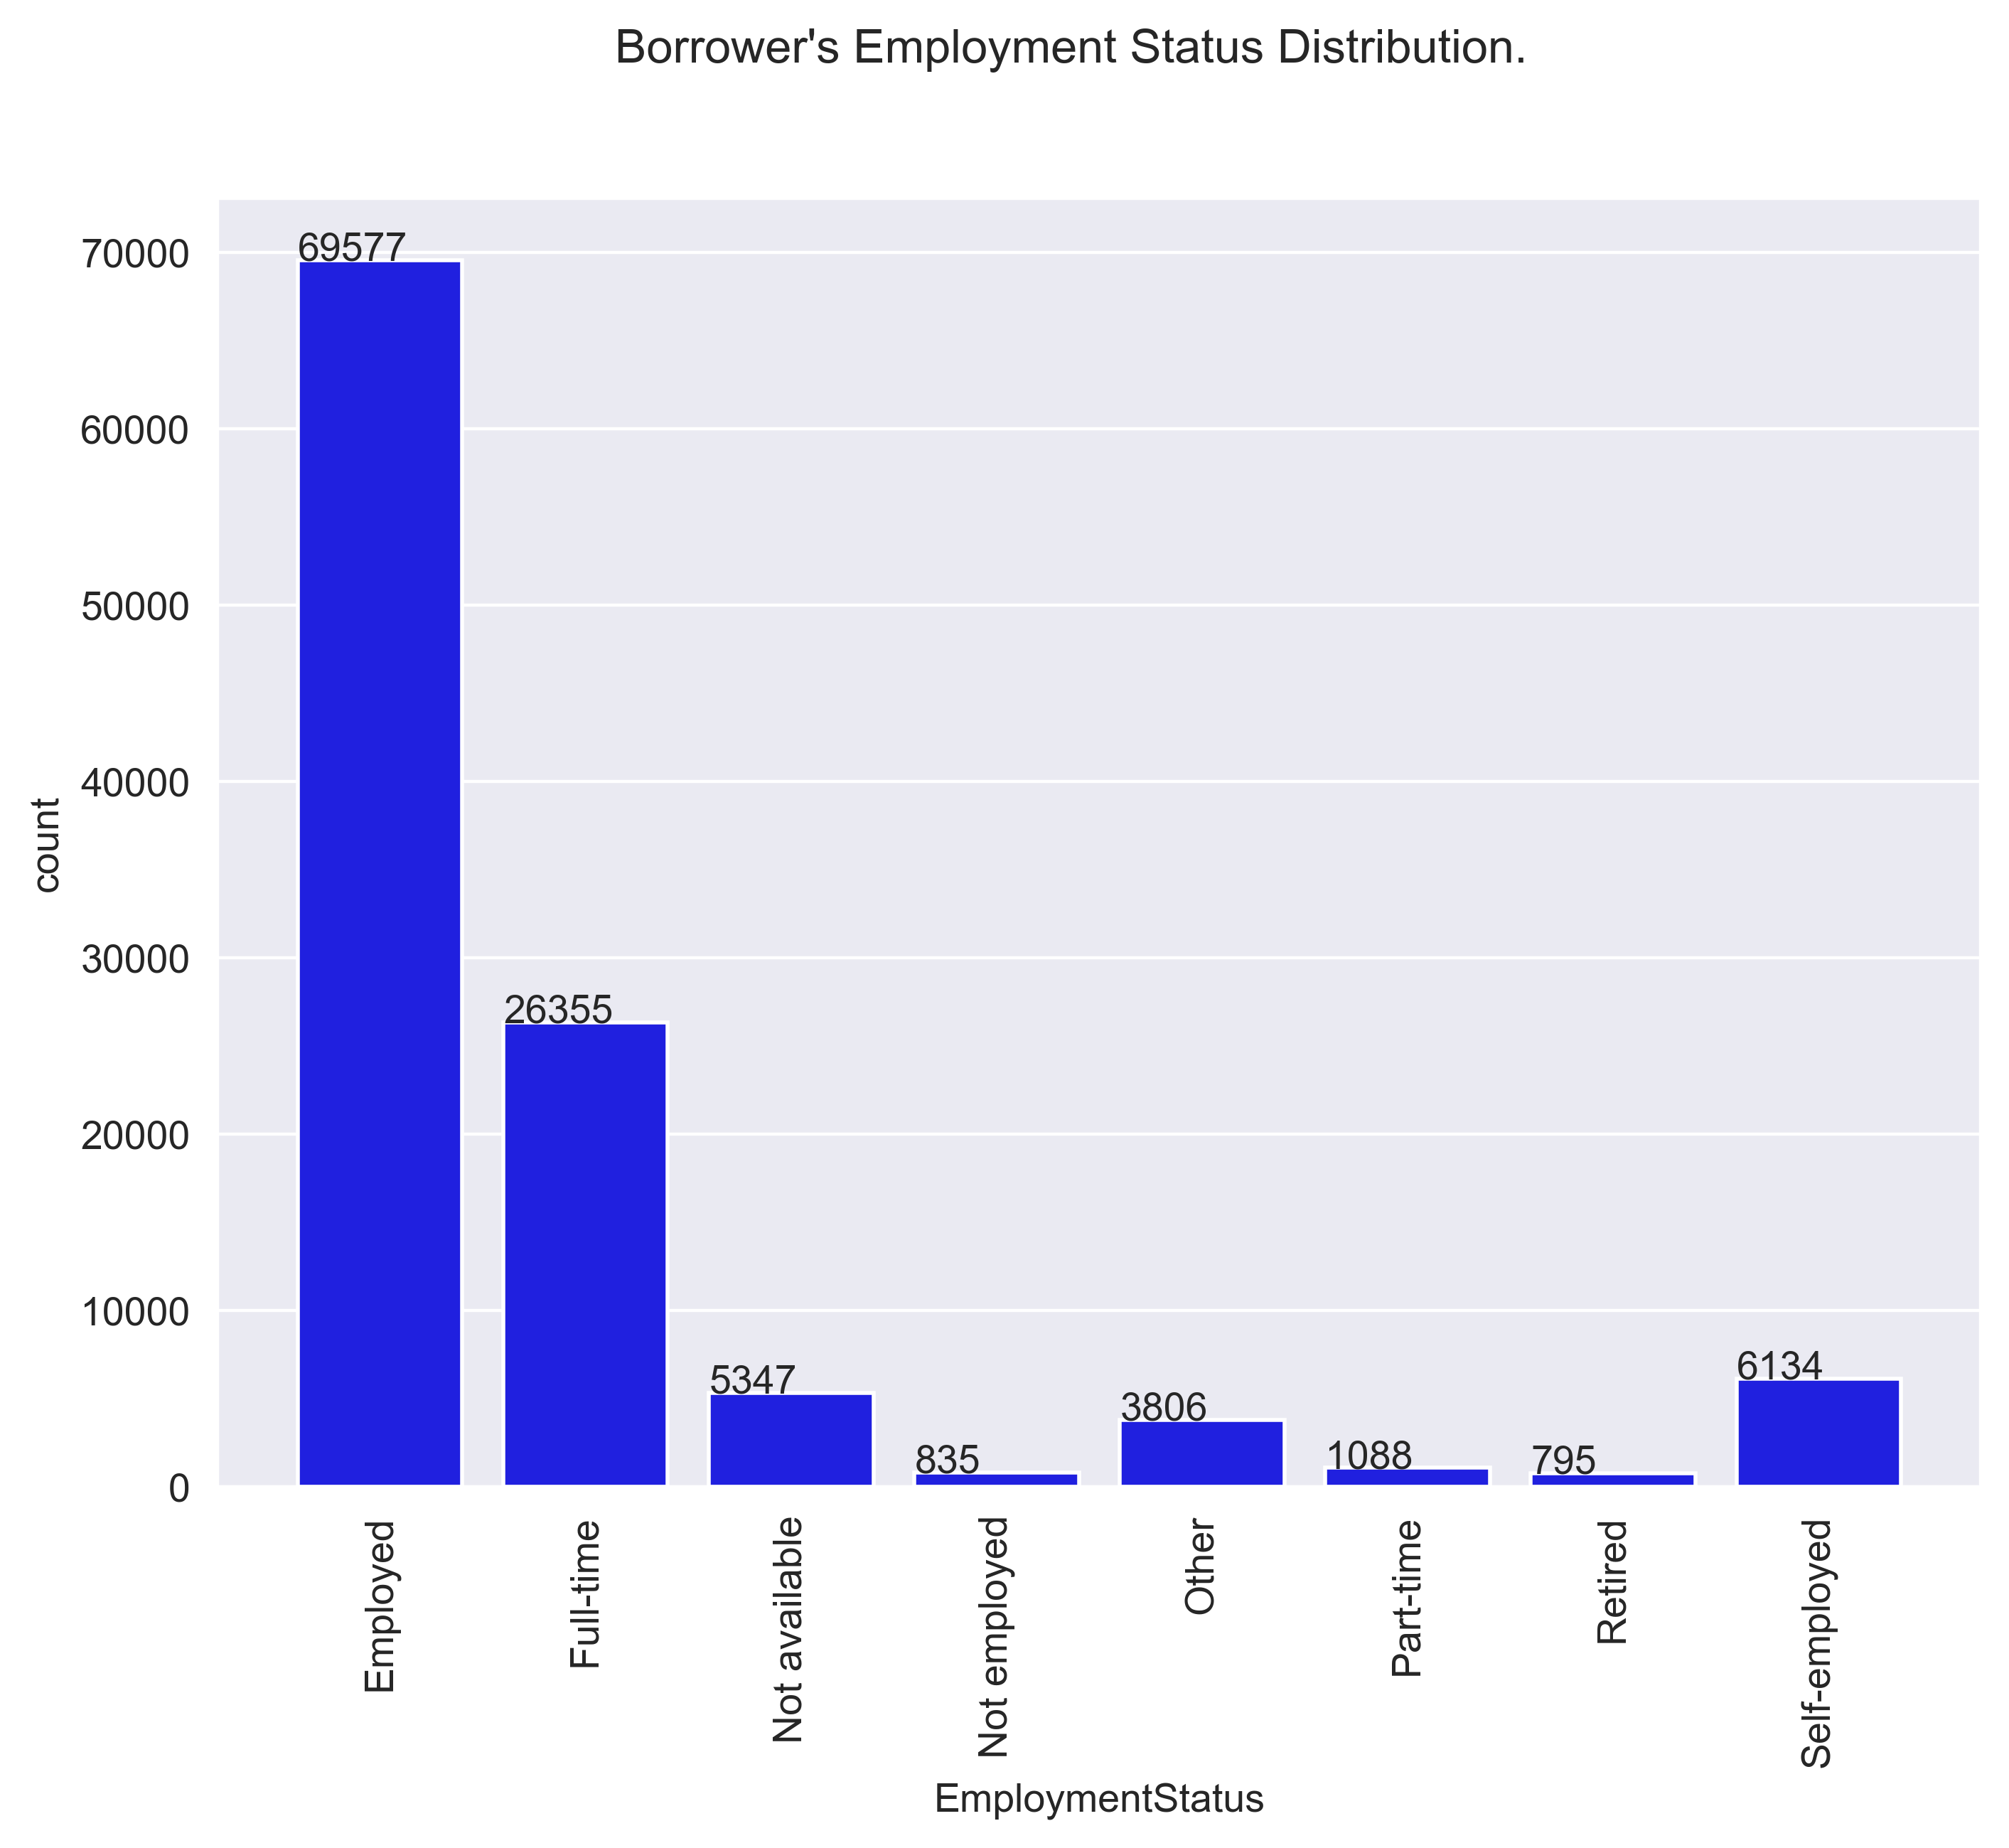

In [227]:
# Drawing countplot of the feature Employment Status
univariate_count_plot('EmploymentStatus', "Borrower's Employment Status Distribution.")

There are 69557 occurrences in the employment status category of employed people. The employment status category related to retirement had the lowest occurrence. An institution is more likely to disburse a loan to a working-class individual than to a retiree.

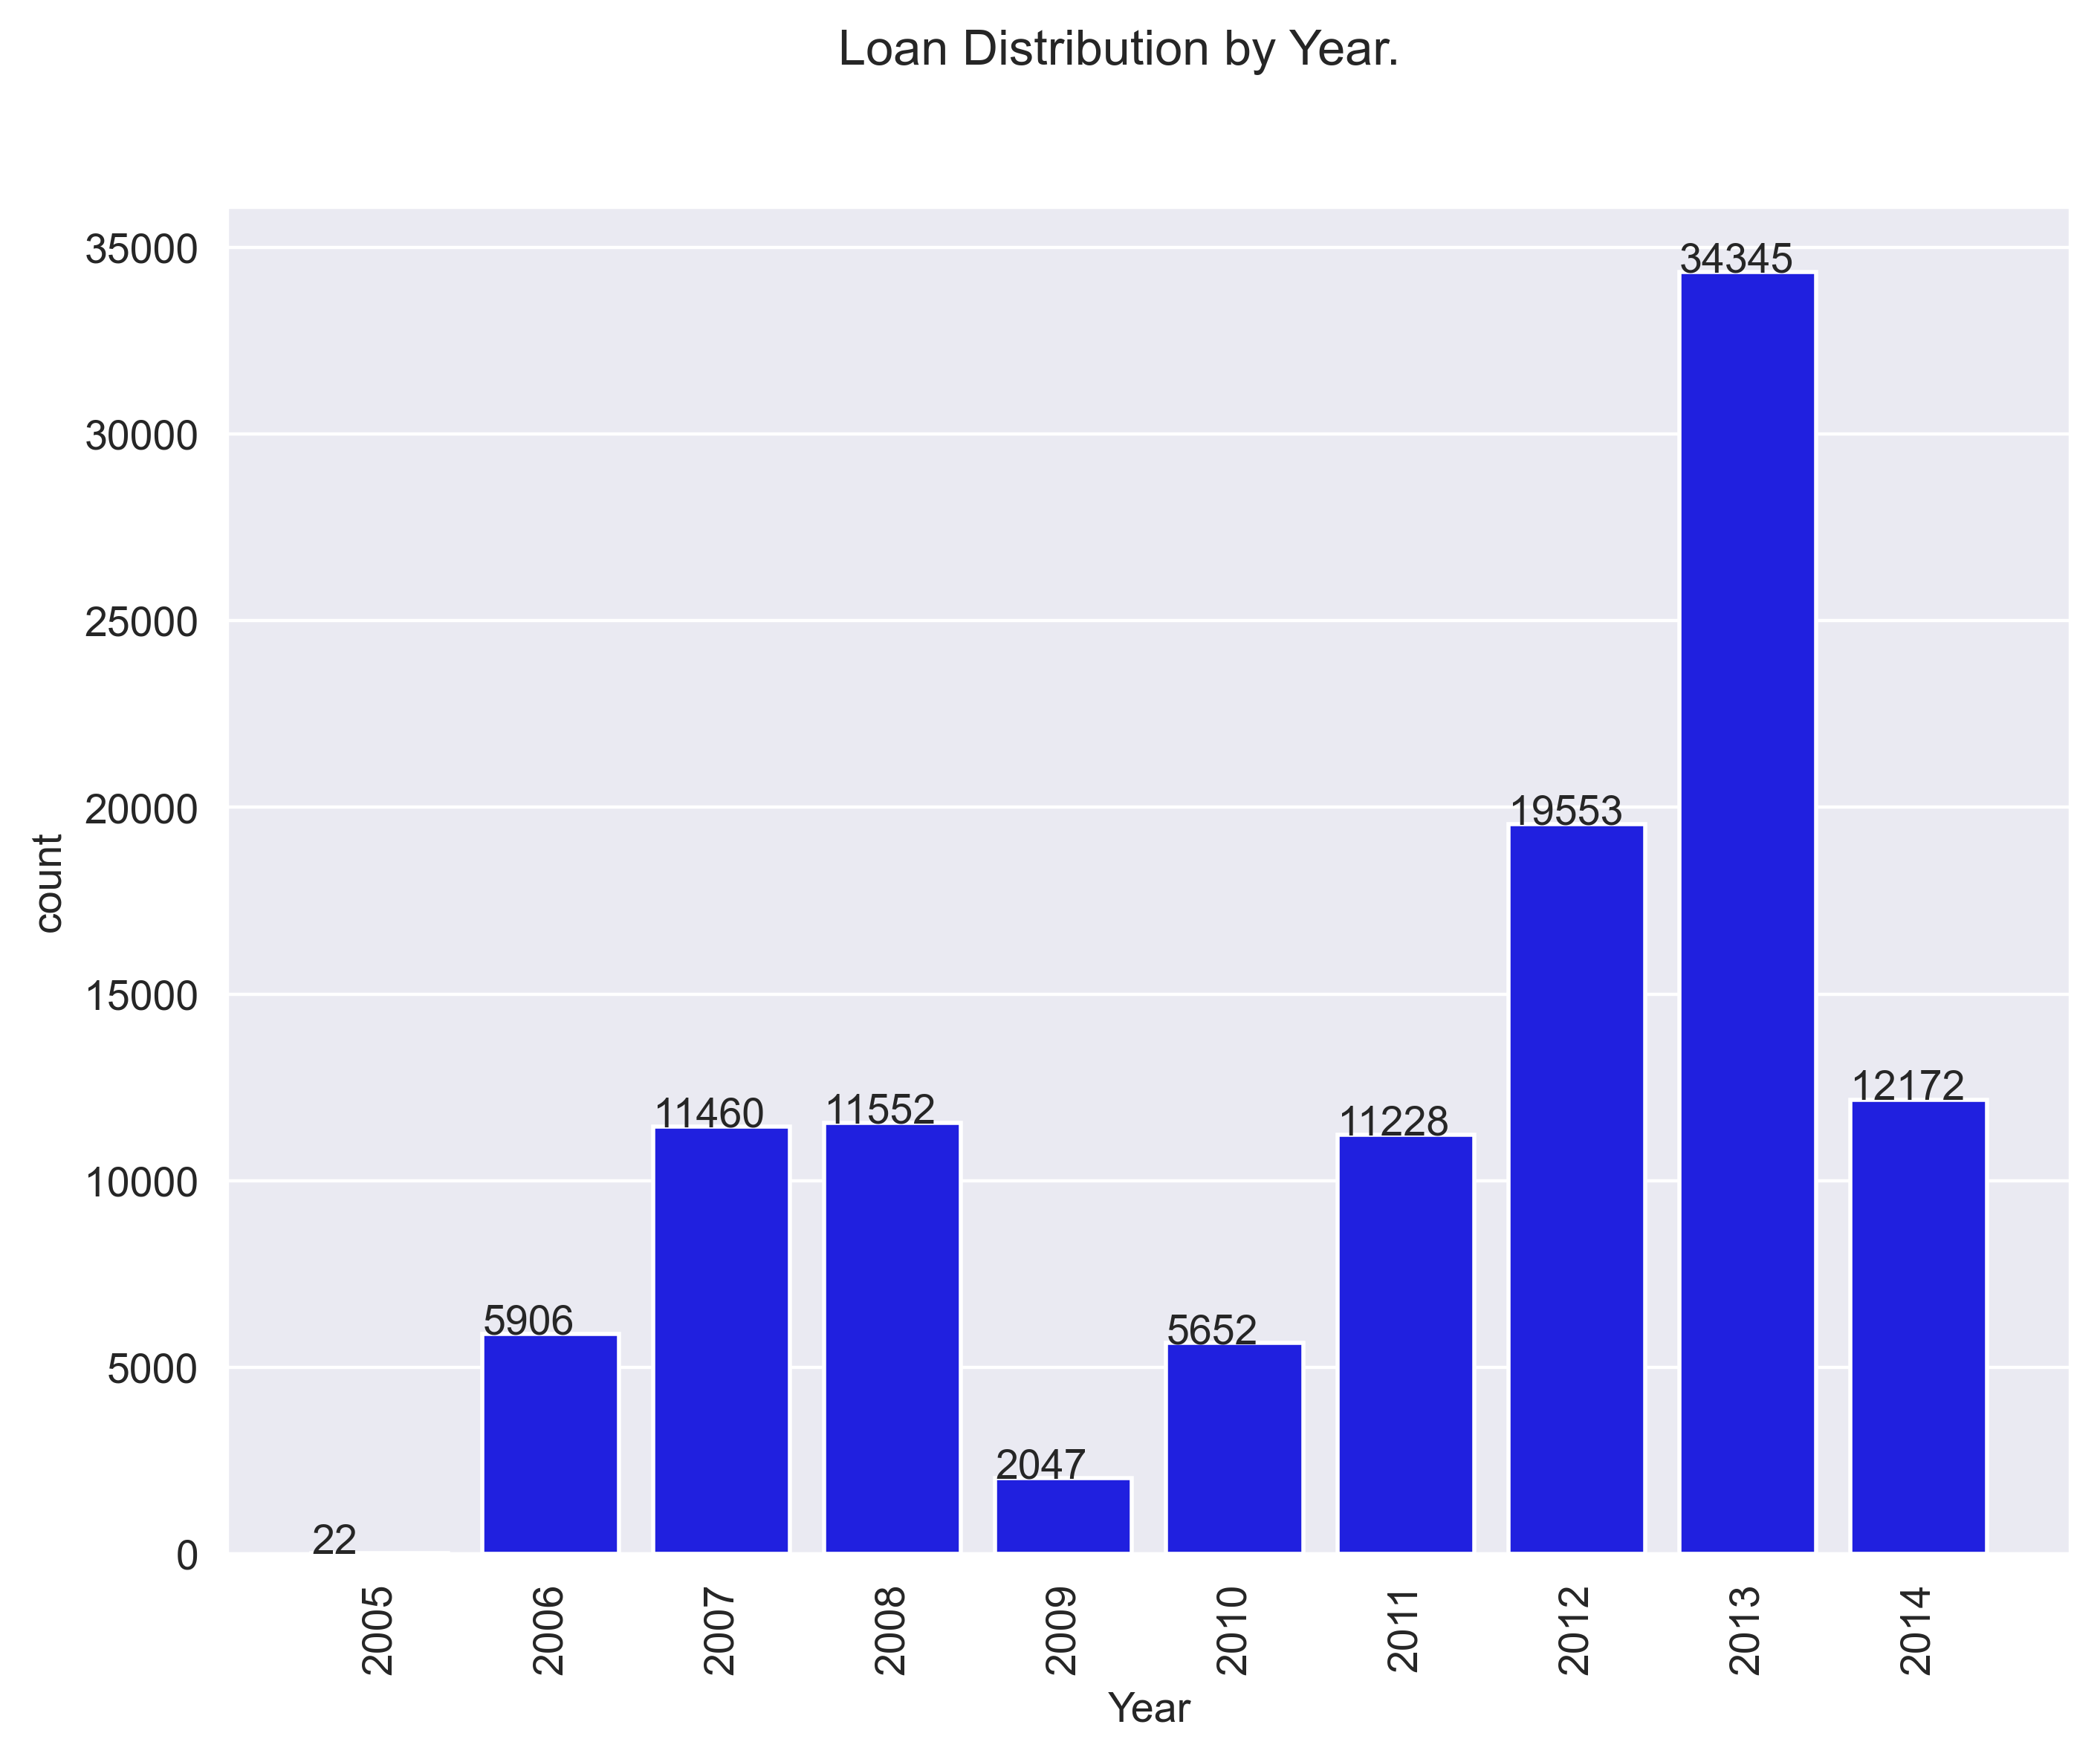

In [228]:
# To draw countplot of the feature term
univariate_count_plot('Year', 'Loan Distribution by Year.')

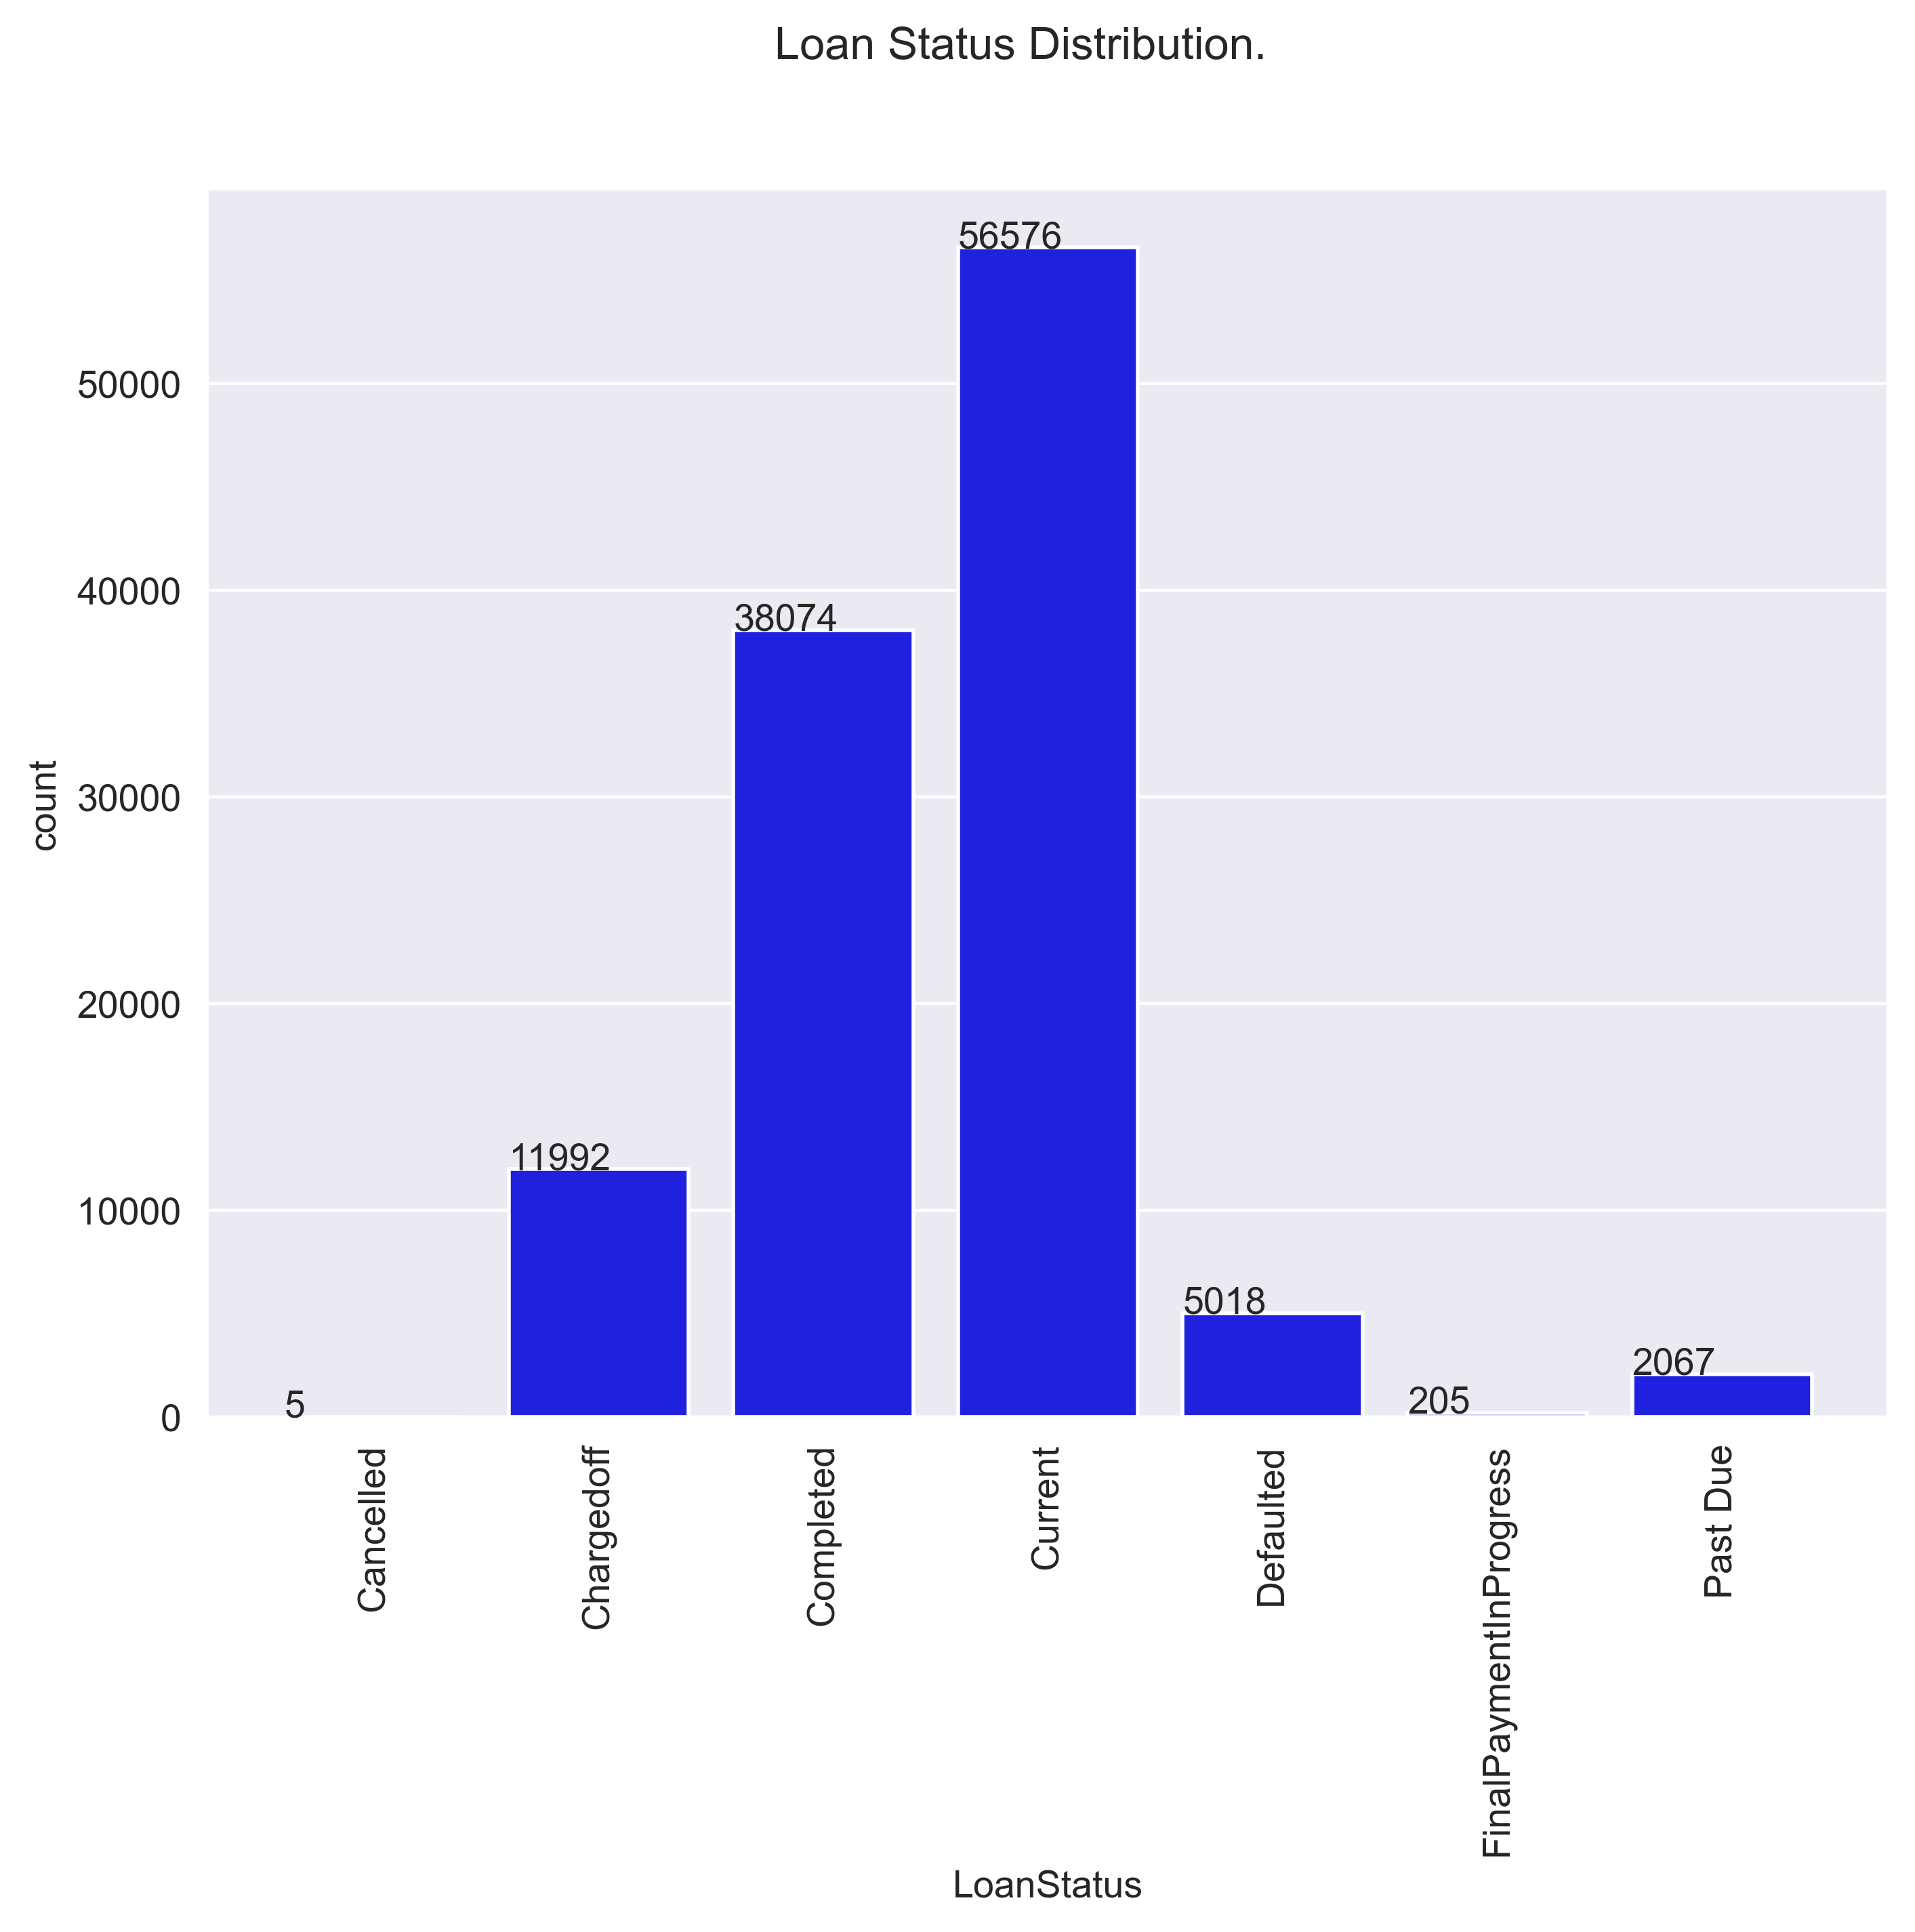

In [229]:
# calling function to draw countplot of the feature loan status
univariate_count_plot('LoanStatus', 'Loan Status Distribution.')

According to the loan status data distribution, few borrowers canceled their loans, while most borrowers have current and serviceable loans. Those who defaulted in servicing their loan are about 10 percent of those who have current and serviceable loans. Those borrowers who are past their due date still have one or more due days.

**To identify the frequency of the booleen variables;need to raise the argument if Borrower is homeowner and/or verifiable income.**

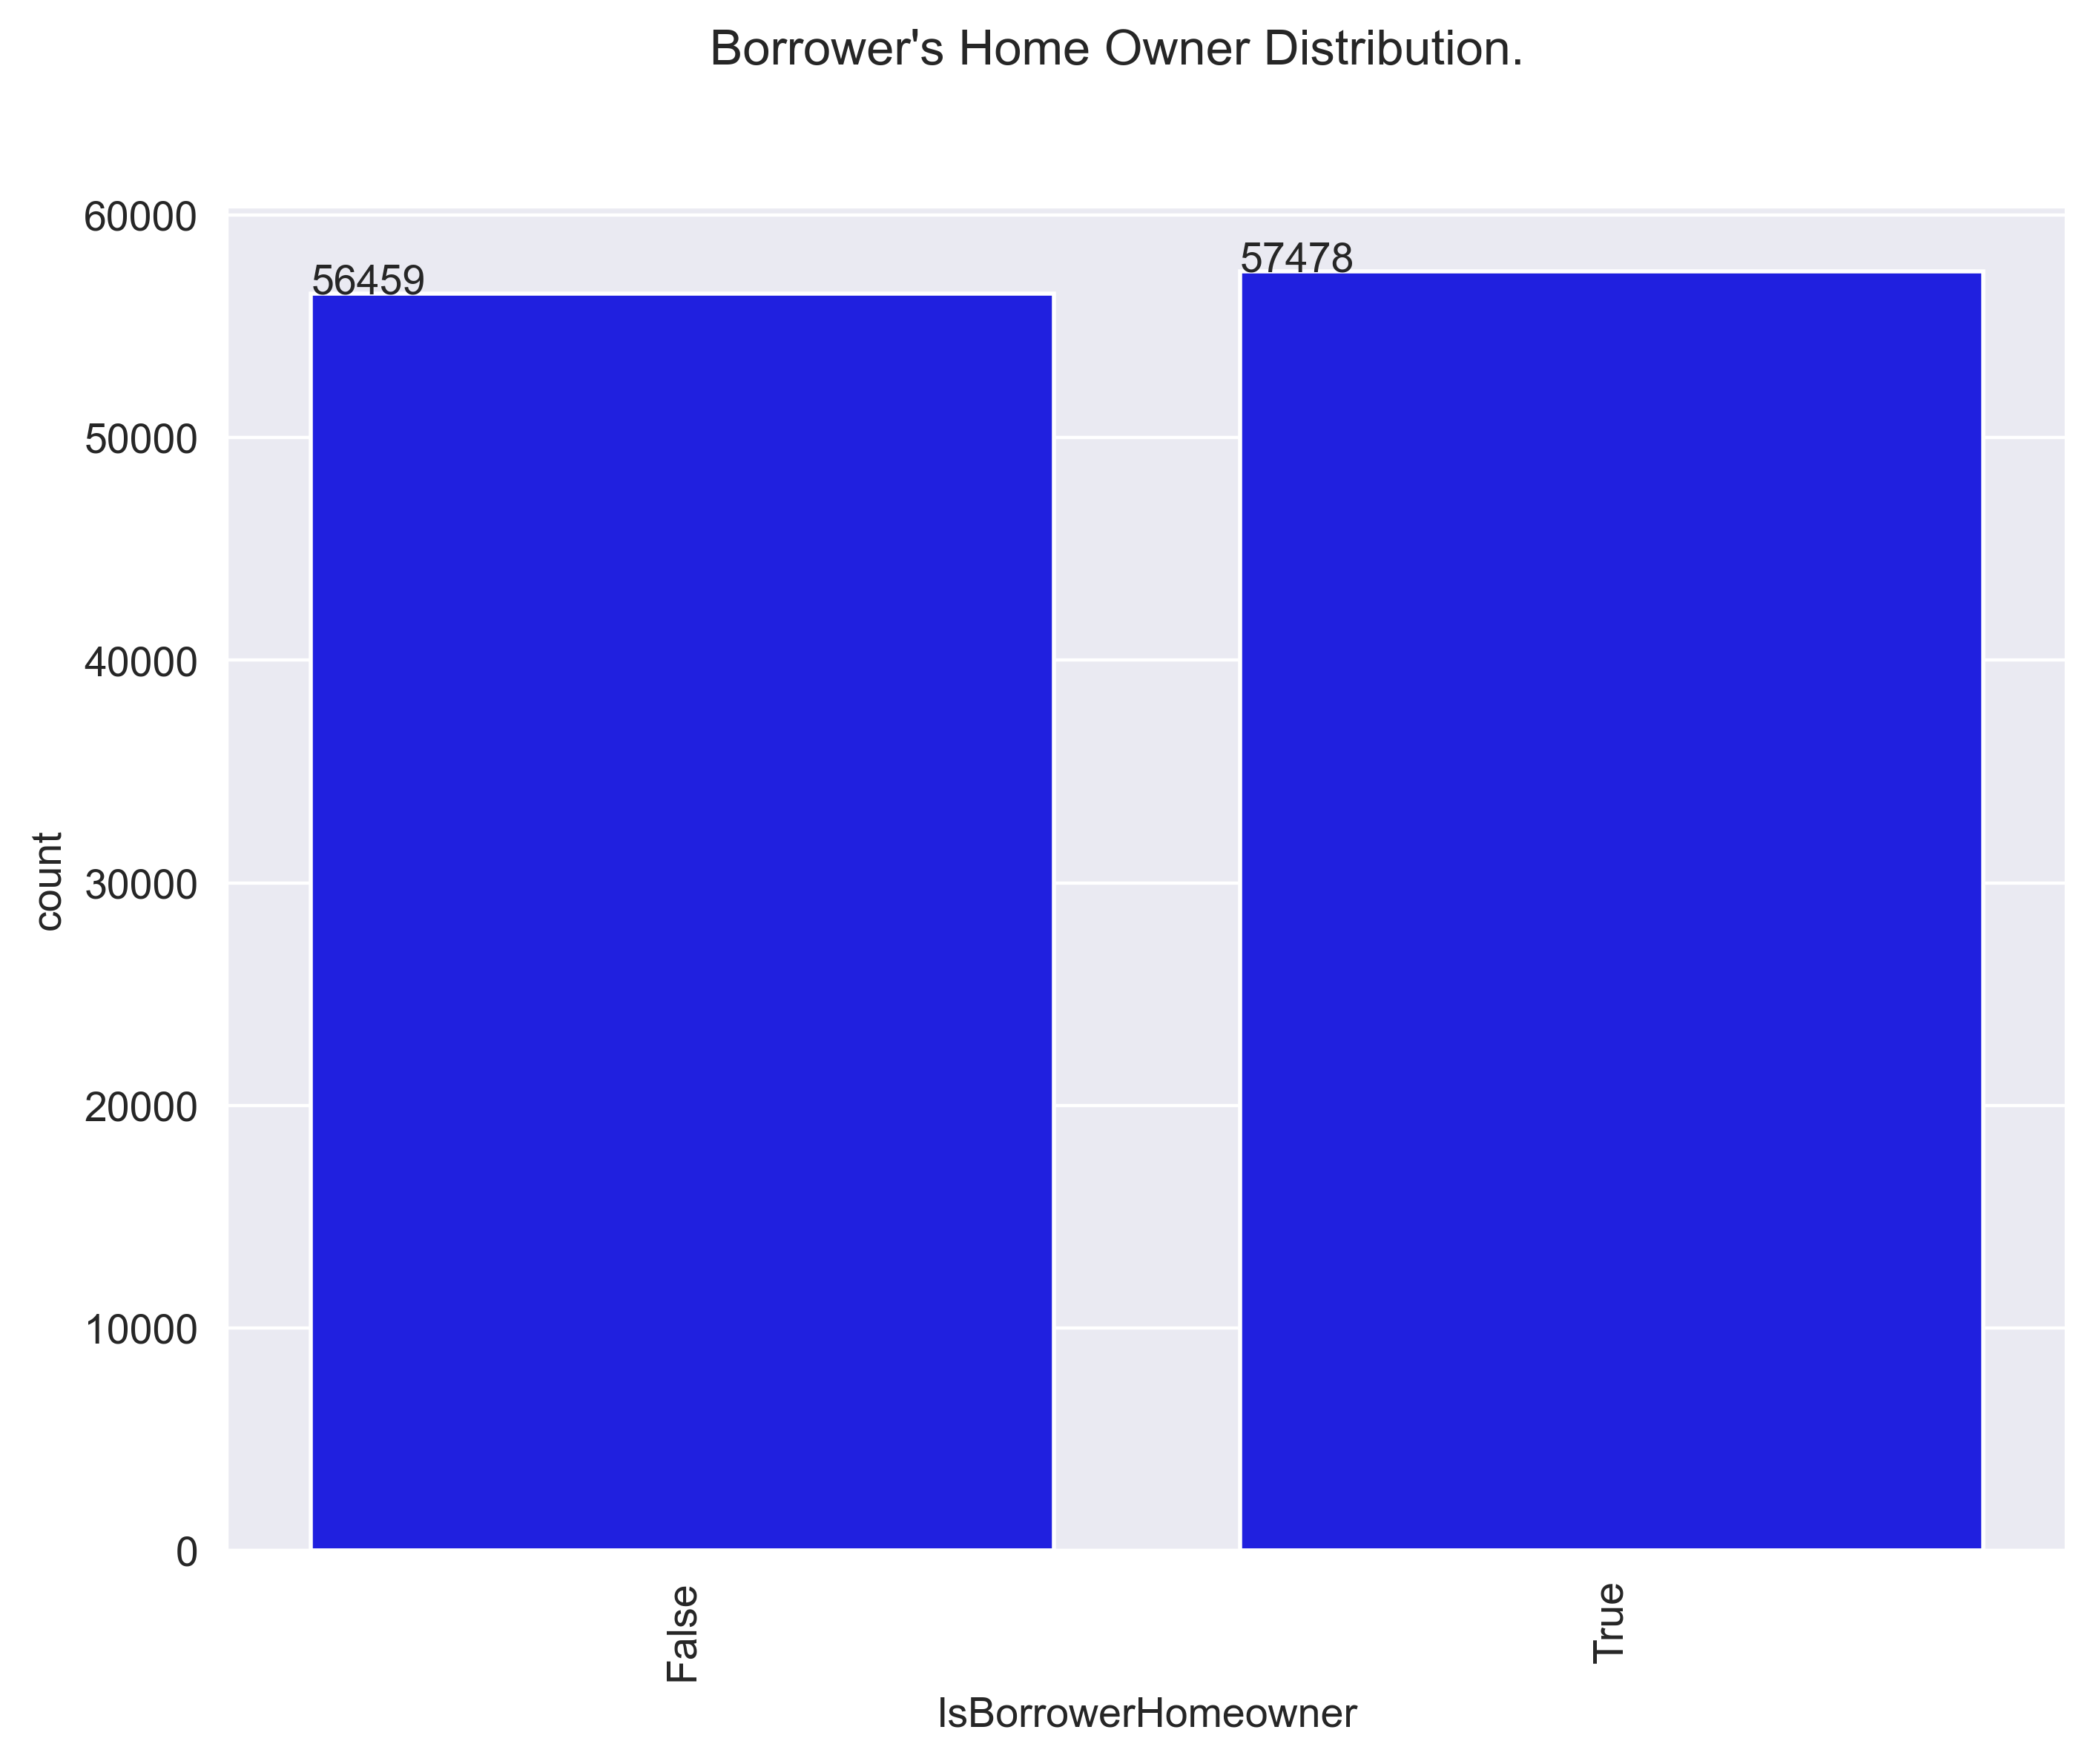

In [230]:
# To draw countplot of the feature Borrower's Home Owner Distribution.
univariate_count_plot('IsBorrowerHomeowner', "Borrower's Home Owner Distribution.")

There is no clear cut difference between borrowers who are home owners and those who are not. 

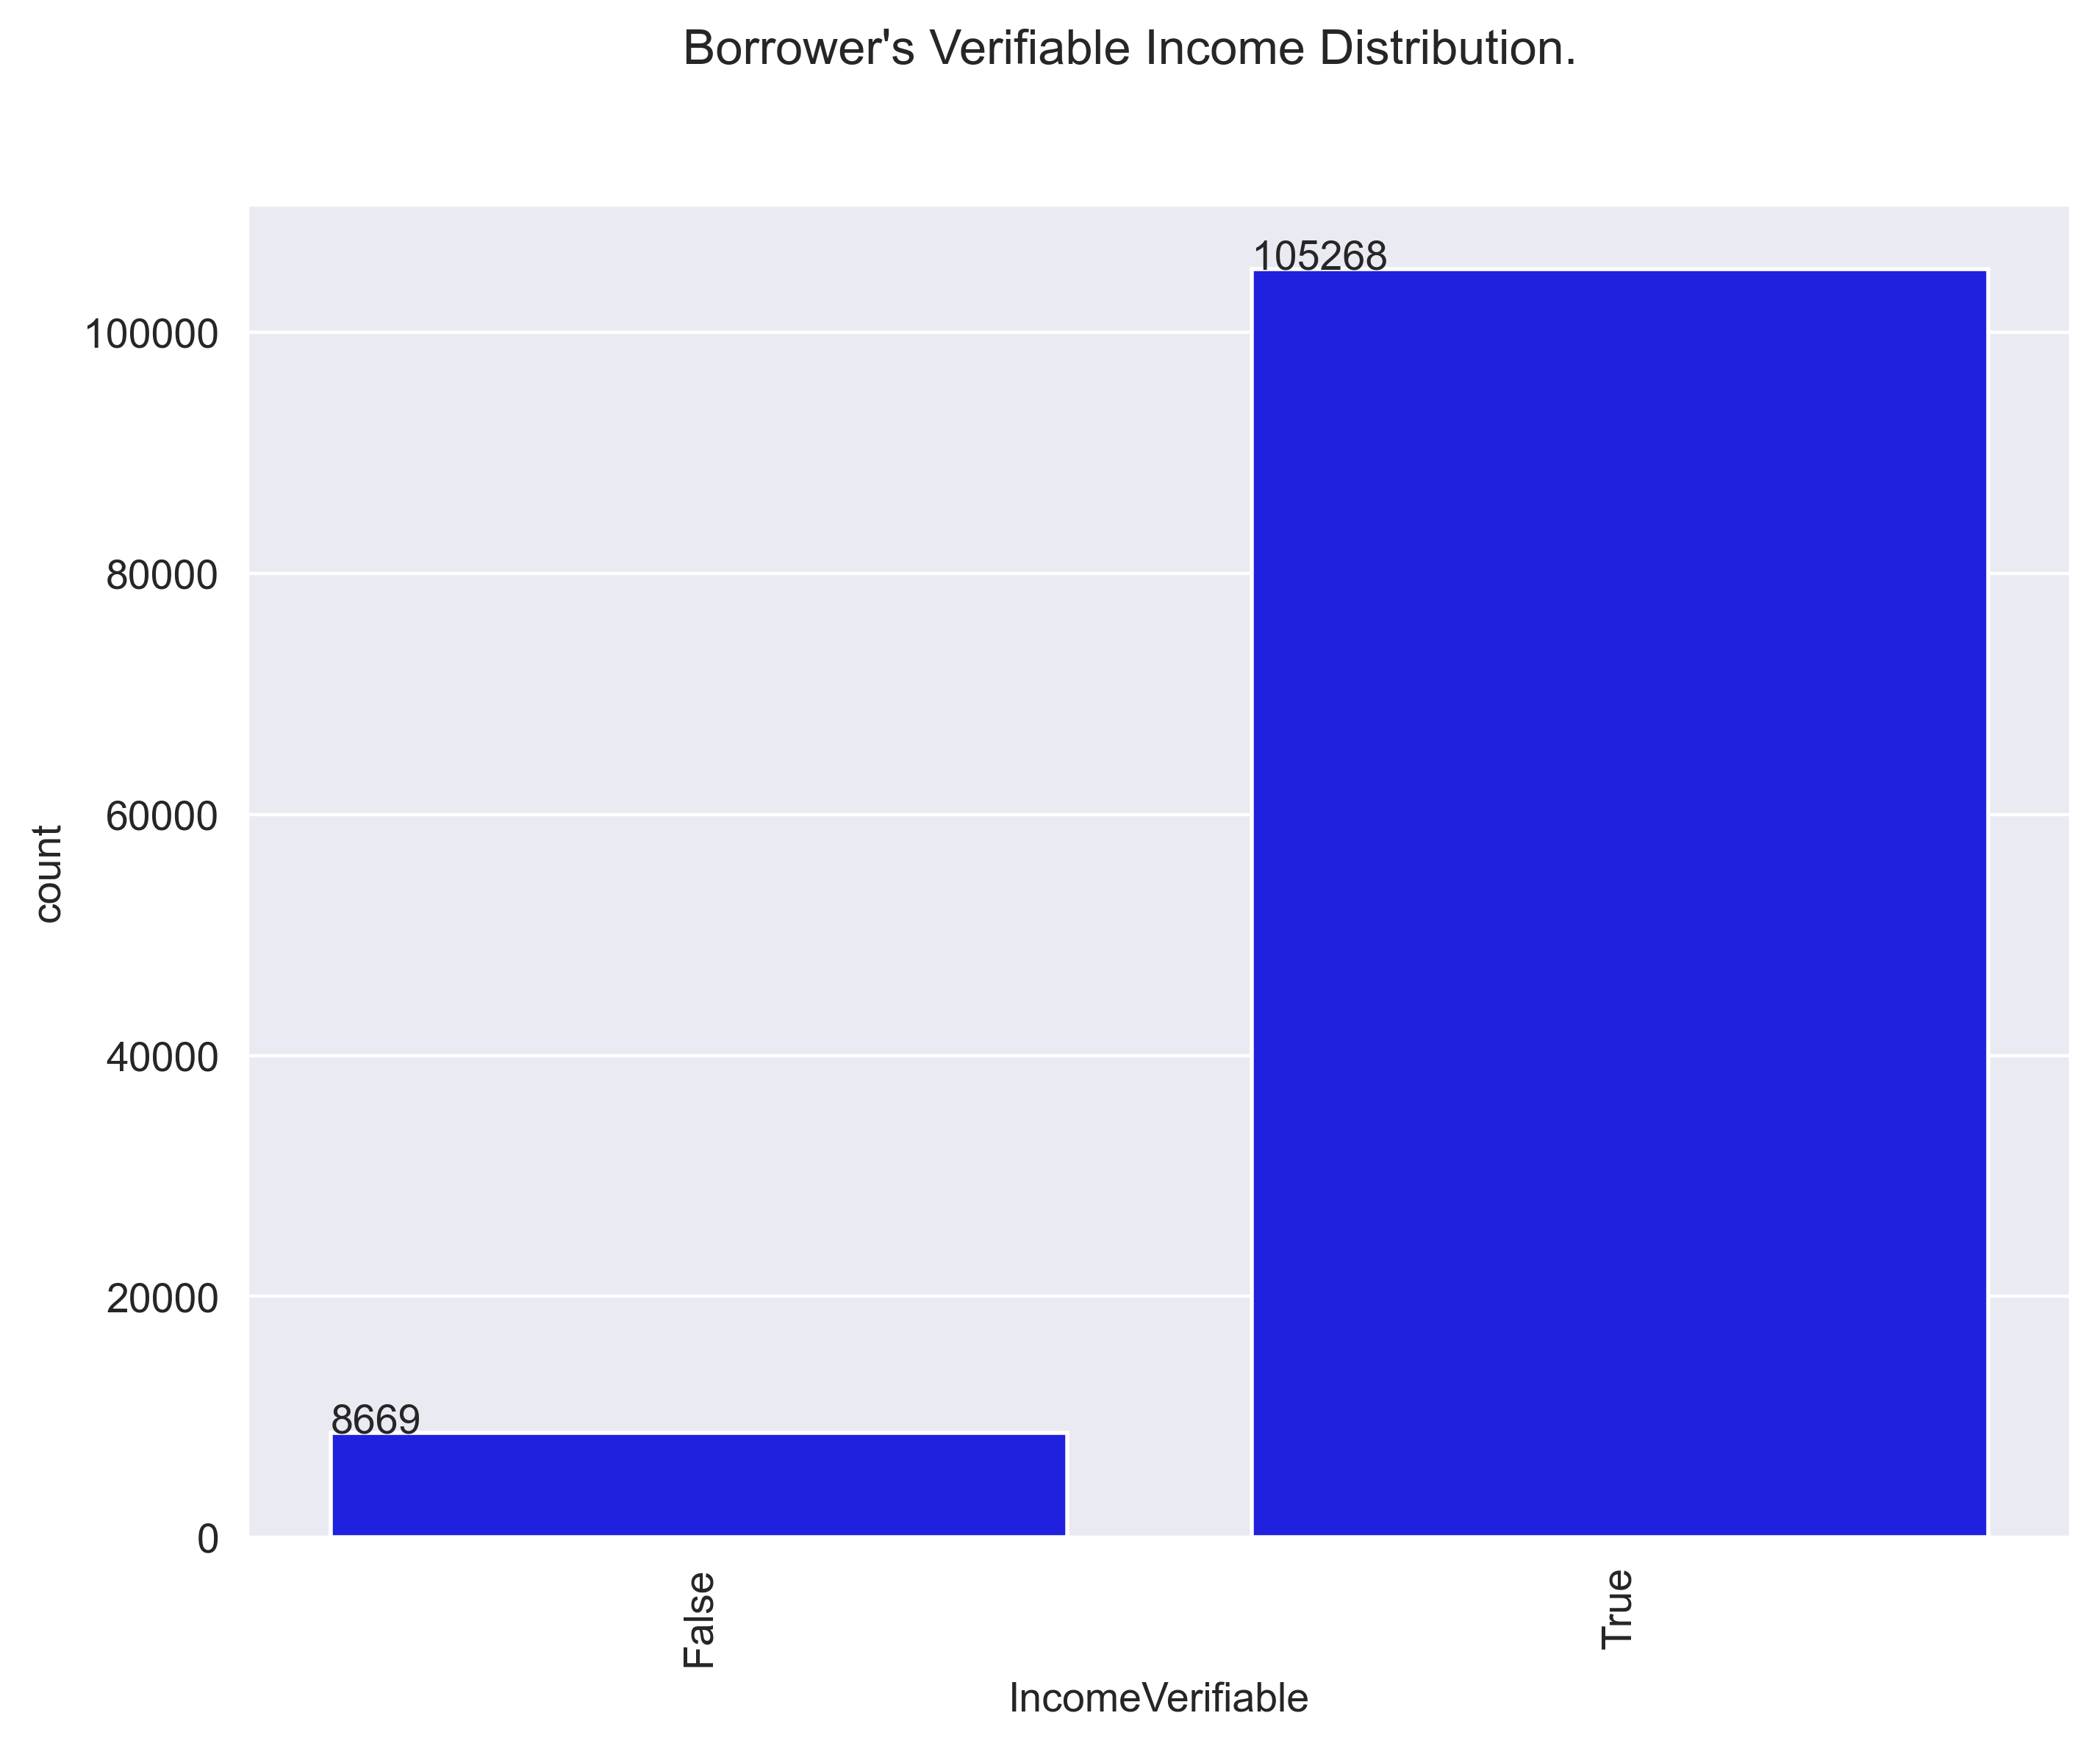

In [231]:
# To draw countplot of the feature Borrower's Verifiable Income Distribution.
univariate_count_plot('IncomeVerifiable', "Borrower's Verifiable Income Distribution.")

In this regard, borrowers with verifiable income have the highest incidence, as it is more likely to obtain a loan if the source of income is well defined and verifiable. In other words, a verifiable income increases the probability of securing a loan.

- To display an estimate of loan original amount and monthly loan payment will be made using a kernel density estimator.

In [232]:
# define a func to plot kernel density estimate
def draw_kdense(x, title):
    """plot a kernel density estimate"""
    """param: x, title"""
    """return none"""
    plt.figure(figsize=(10,8), dpi = 400)
    sns.kdeplot(x = x, data = prosperloan_reduced, fill = True)
    plt.xlabel('Amount(Dollars)')
    plt.title(title)

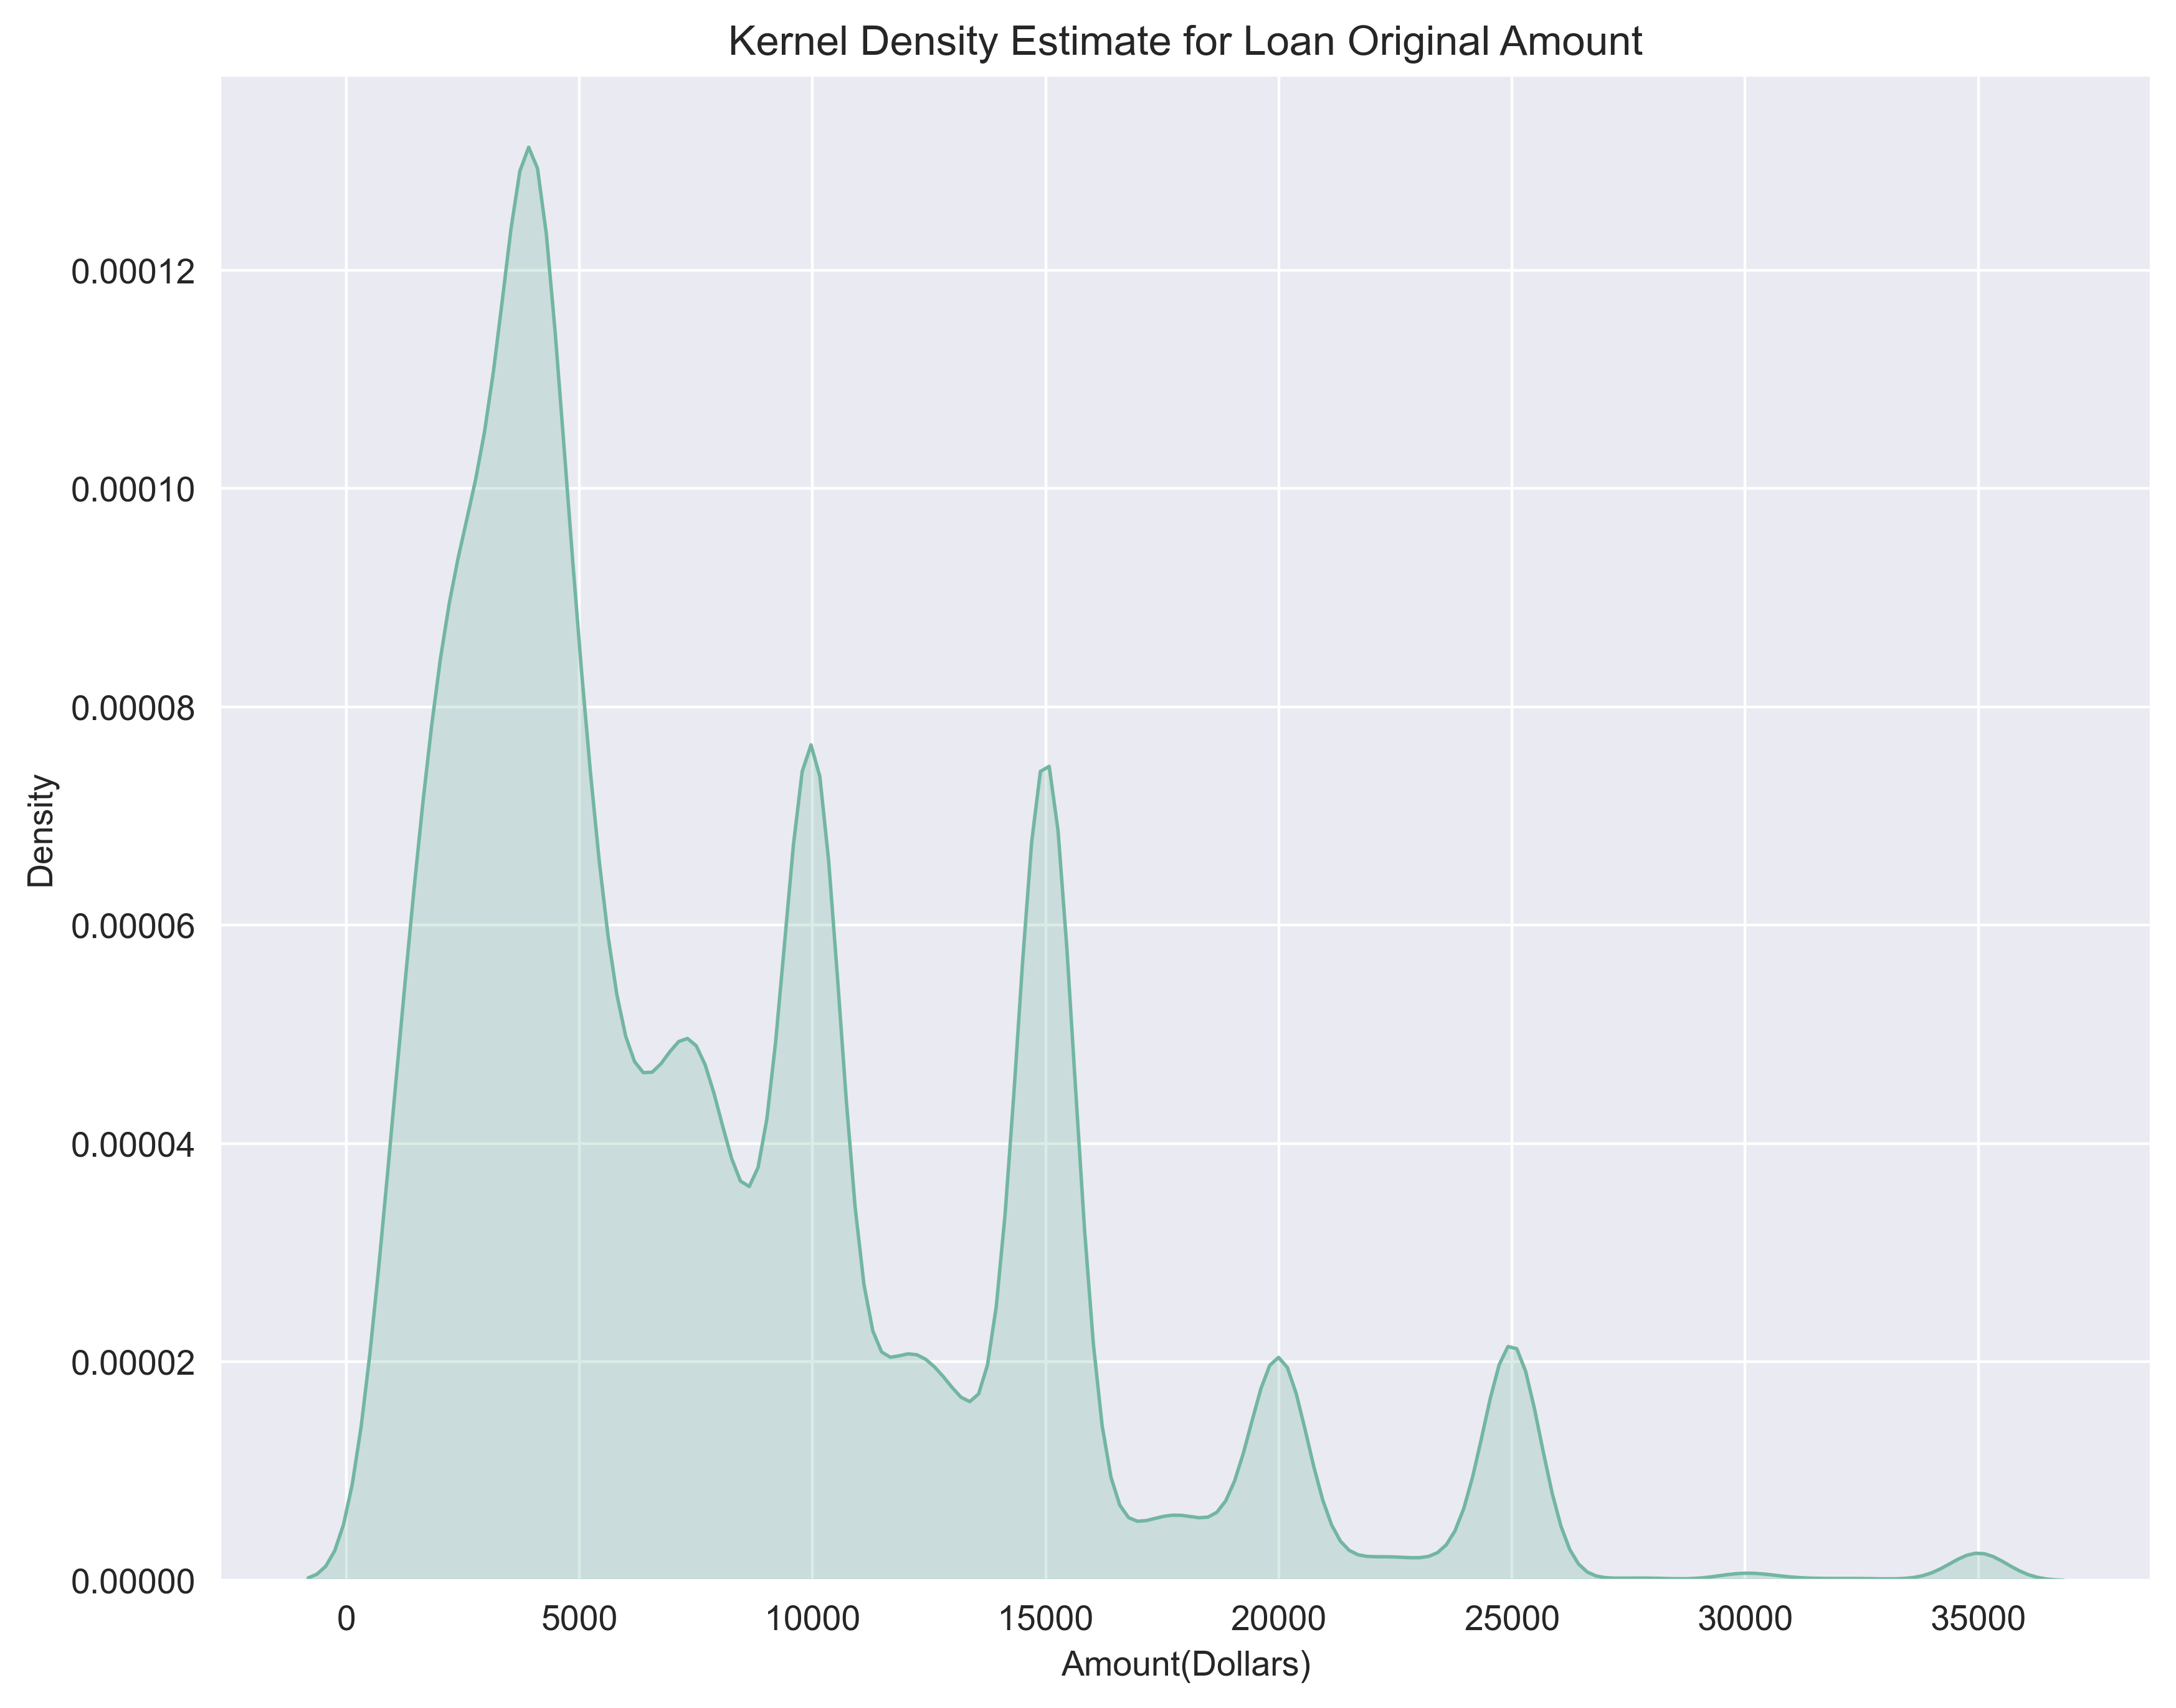

In [233]:
# plot kernel density estimate for loan original amount
draw_kdense('LoanOriginalAmount', 'Kernel Density Estimate for Loan Original Amount')

Probability that a randomly chosen loan will have an original amount between 5000 dollars and 12000 dollars can be calculated using the area between the density function (graph) and x-axis.

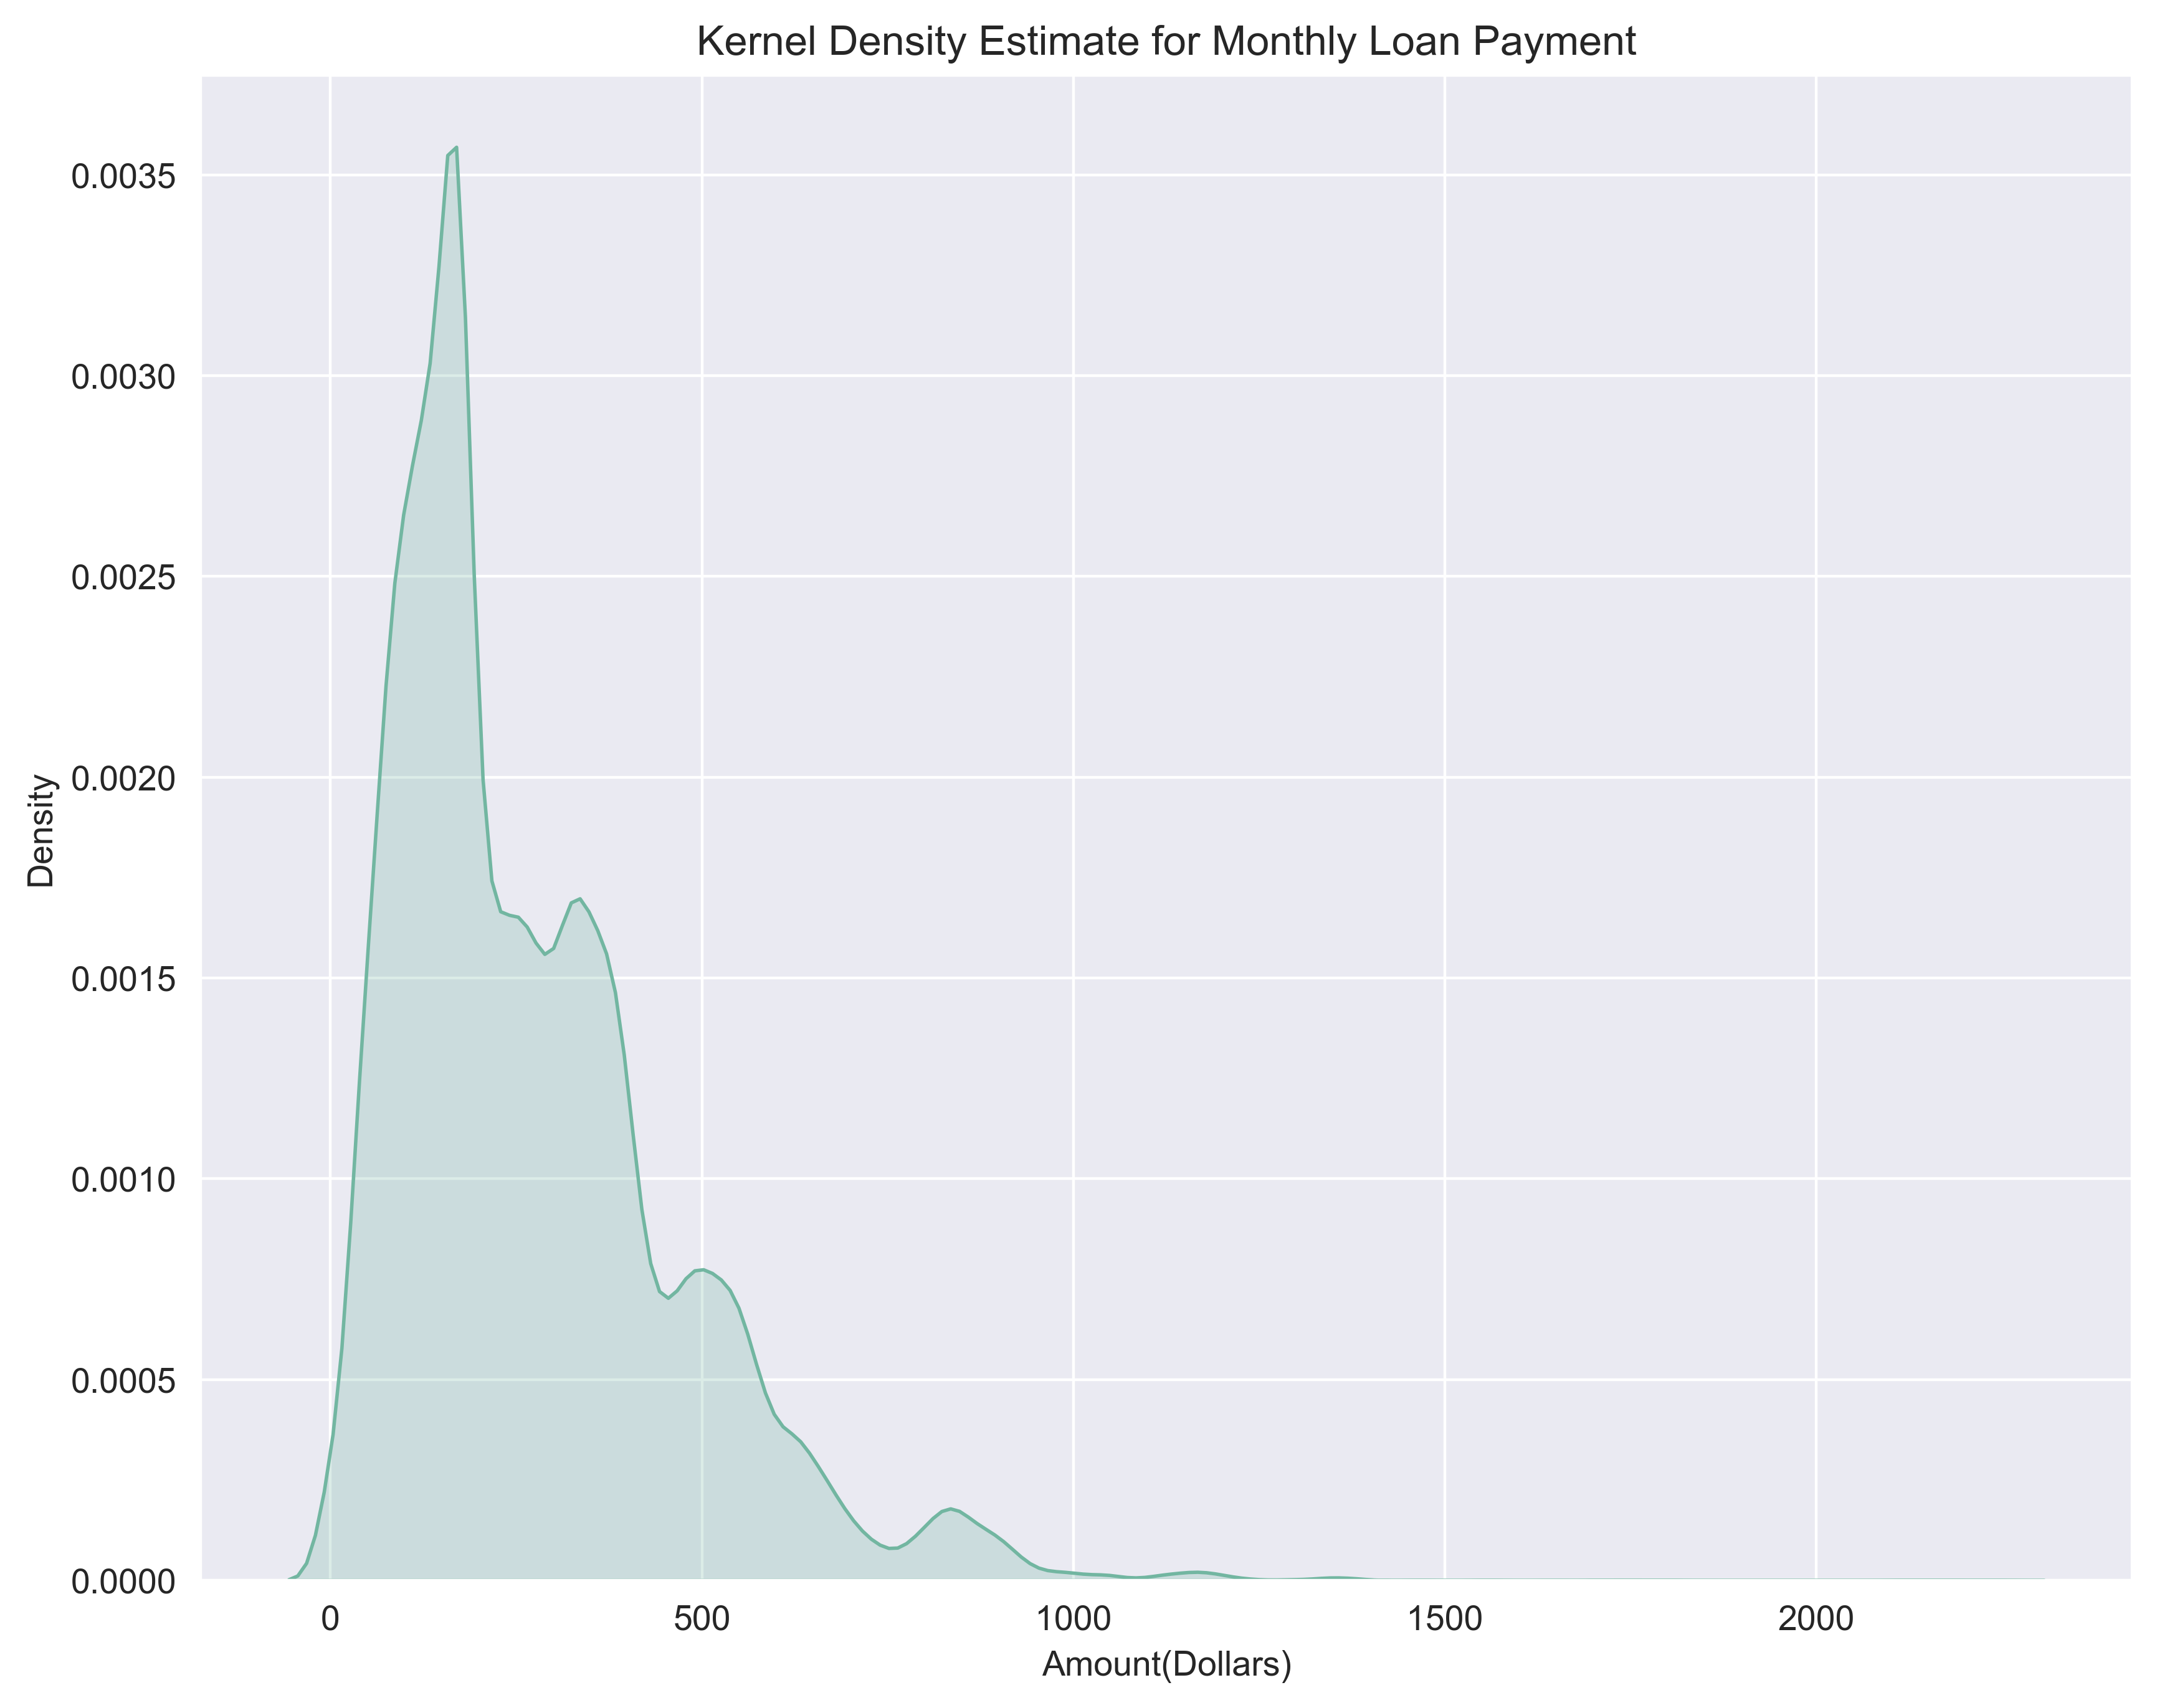

In [234]:
# plot kernel density estimate for monthly loan payment
draw_kdense('MonthlyLoanPayment', 'Kernel Density Estimate for Monthly Loan Payment')

If a randomly chosen loan payment is between 300 and 500 dollars, then the area between the density function (graph) and the x-axis is the probability that it will fall in that range.

- Outliers are data values that are significantly different from other values. To identify outliers, the distribution of continuous numerical variables can be compared using a five-part summary; the first quartile (25th percentile), the median (50th percentile), the third quartile (75th percentile), and the fourth quartile (maximum).

In [235]:
# To plot a boxplot to show distribution of numerical variable
def univariate_boxplot(x, title):
    """plot a univariate boxplot"""
    """param:x, title"""
    """return none"""
    plt.figure(figsize=(8,6),dpi = 400)
    sns.boxplot(x = x, data = prosperloan_reduced)
    plt.suptitle(title)
    plt.show();

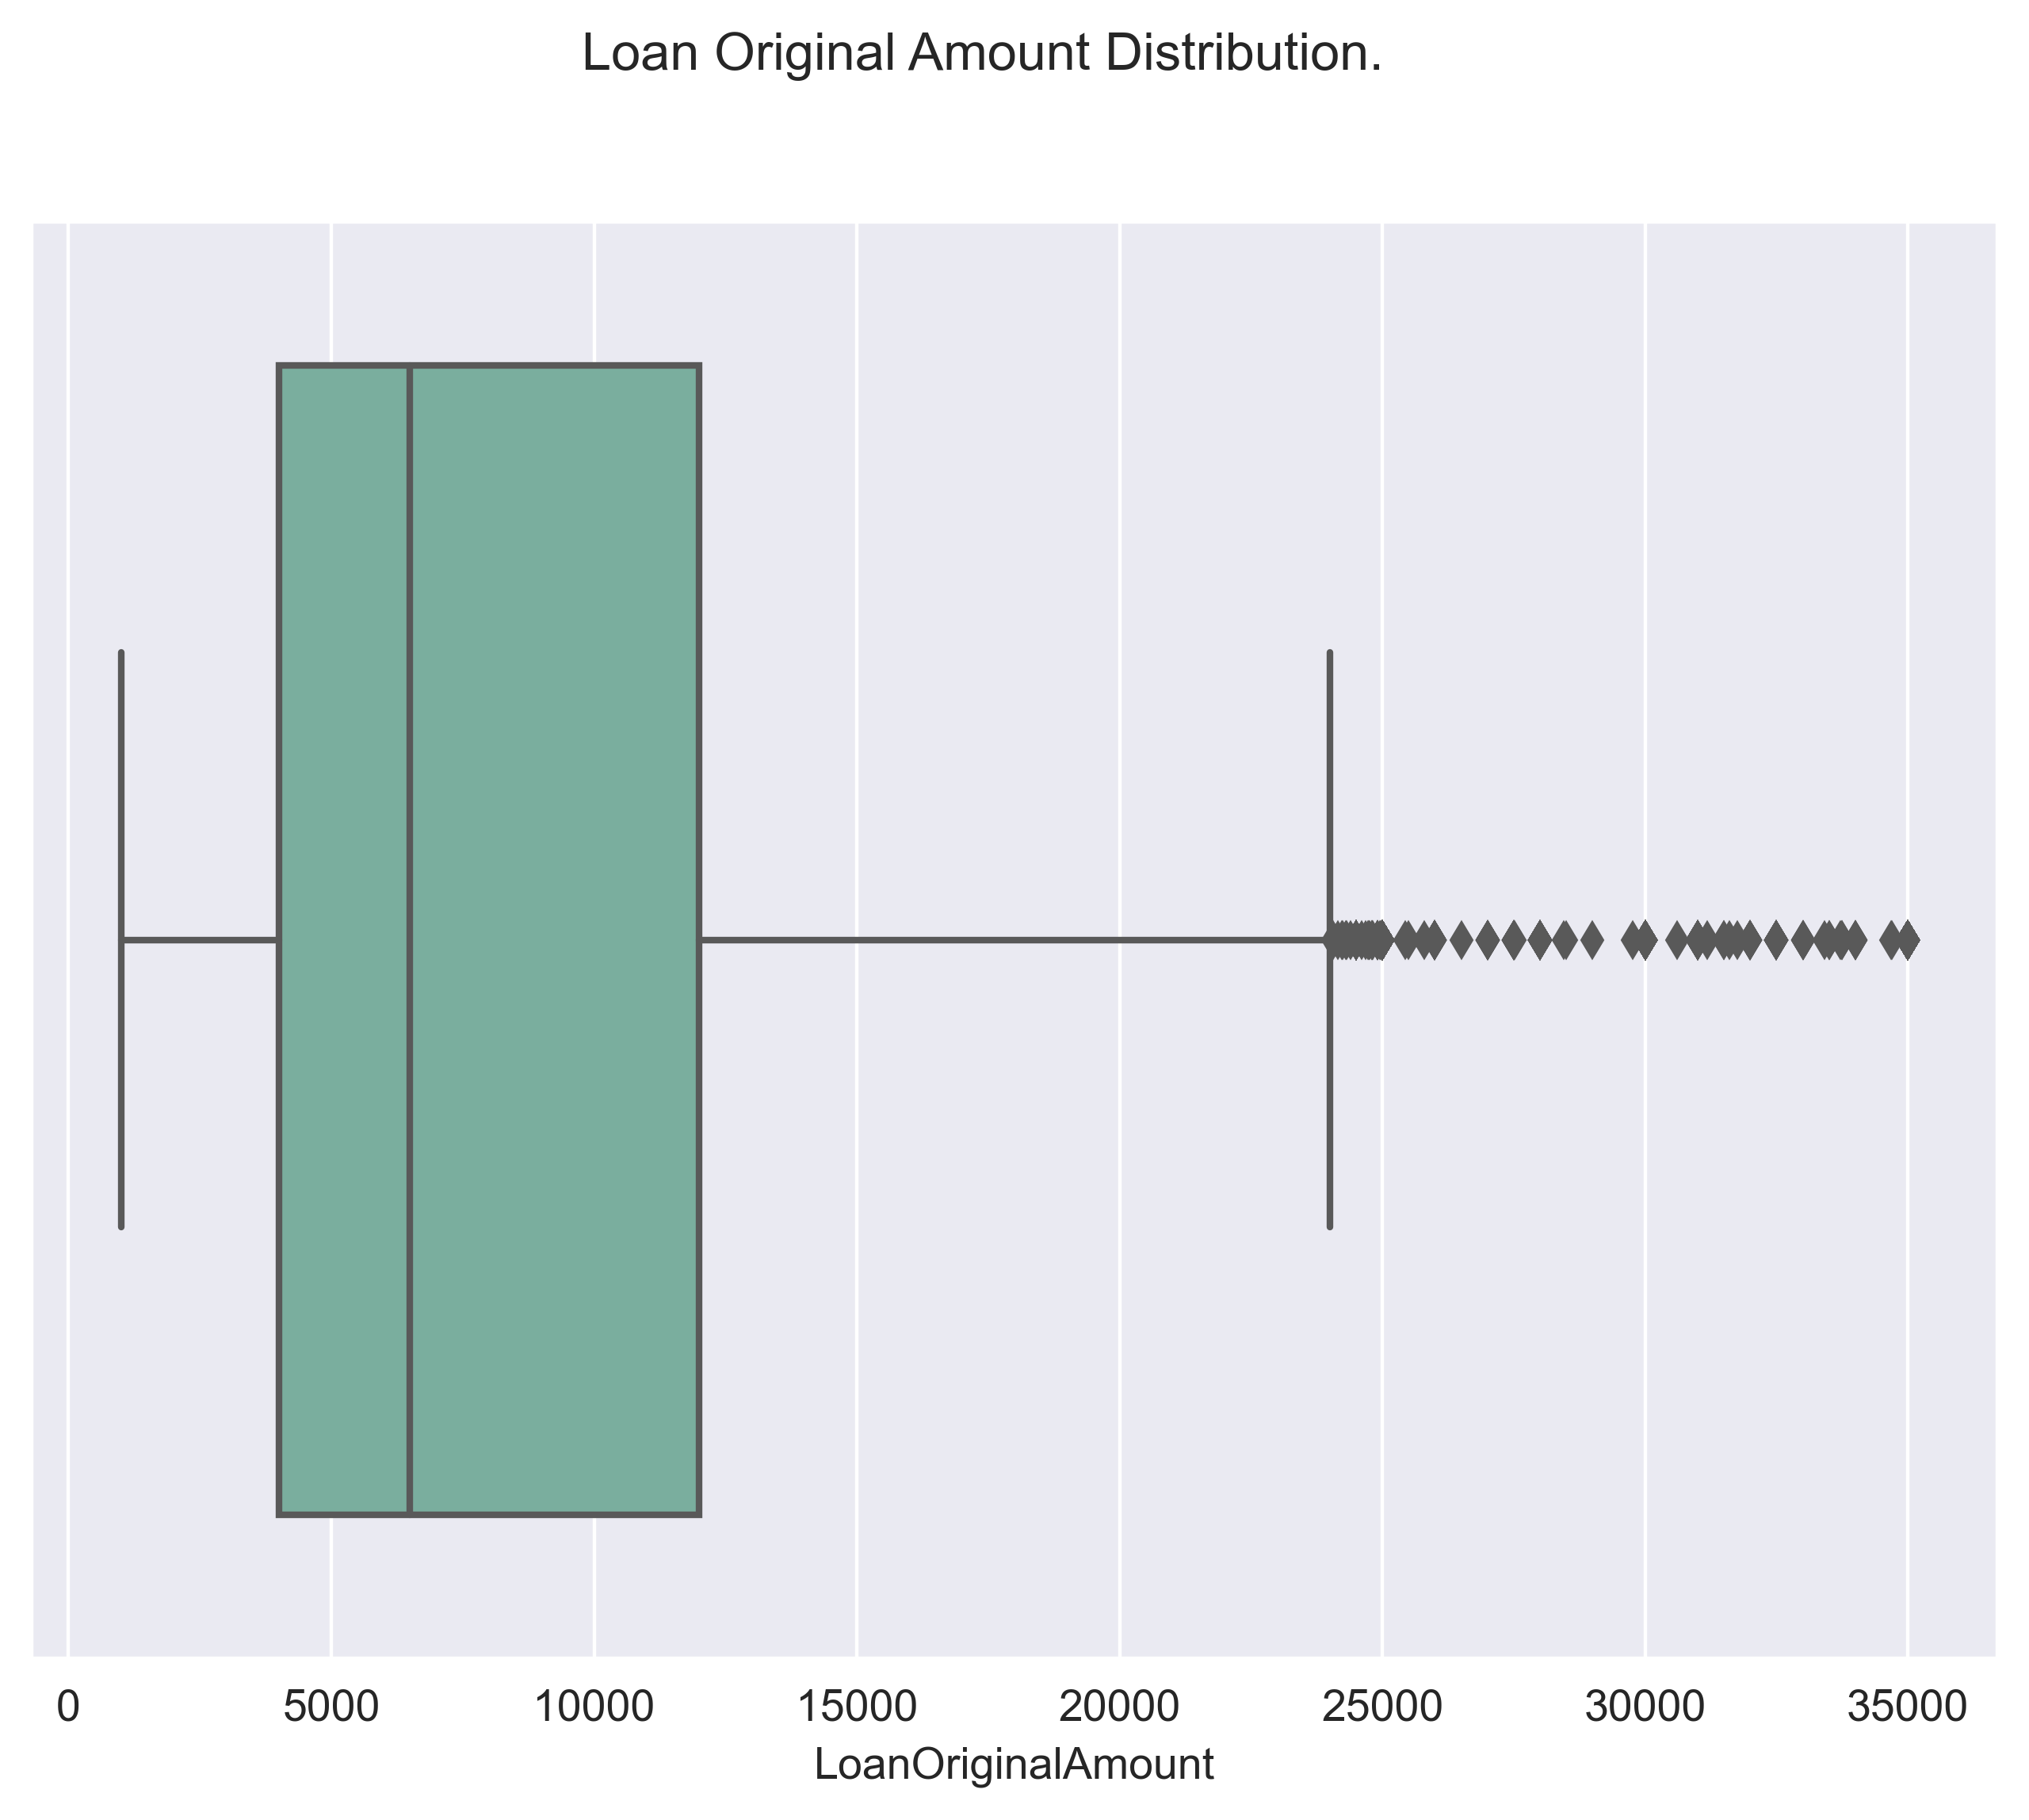

In [236]:
# To plot loan original amount distribution
univariate_boxplot('LoanOriginalAmount', 'Loan Original Amount Distribution.')

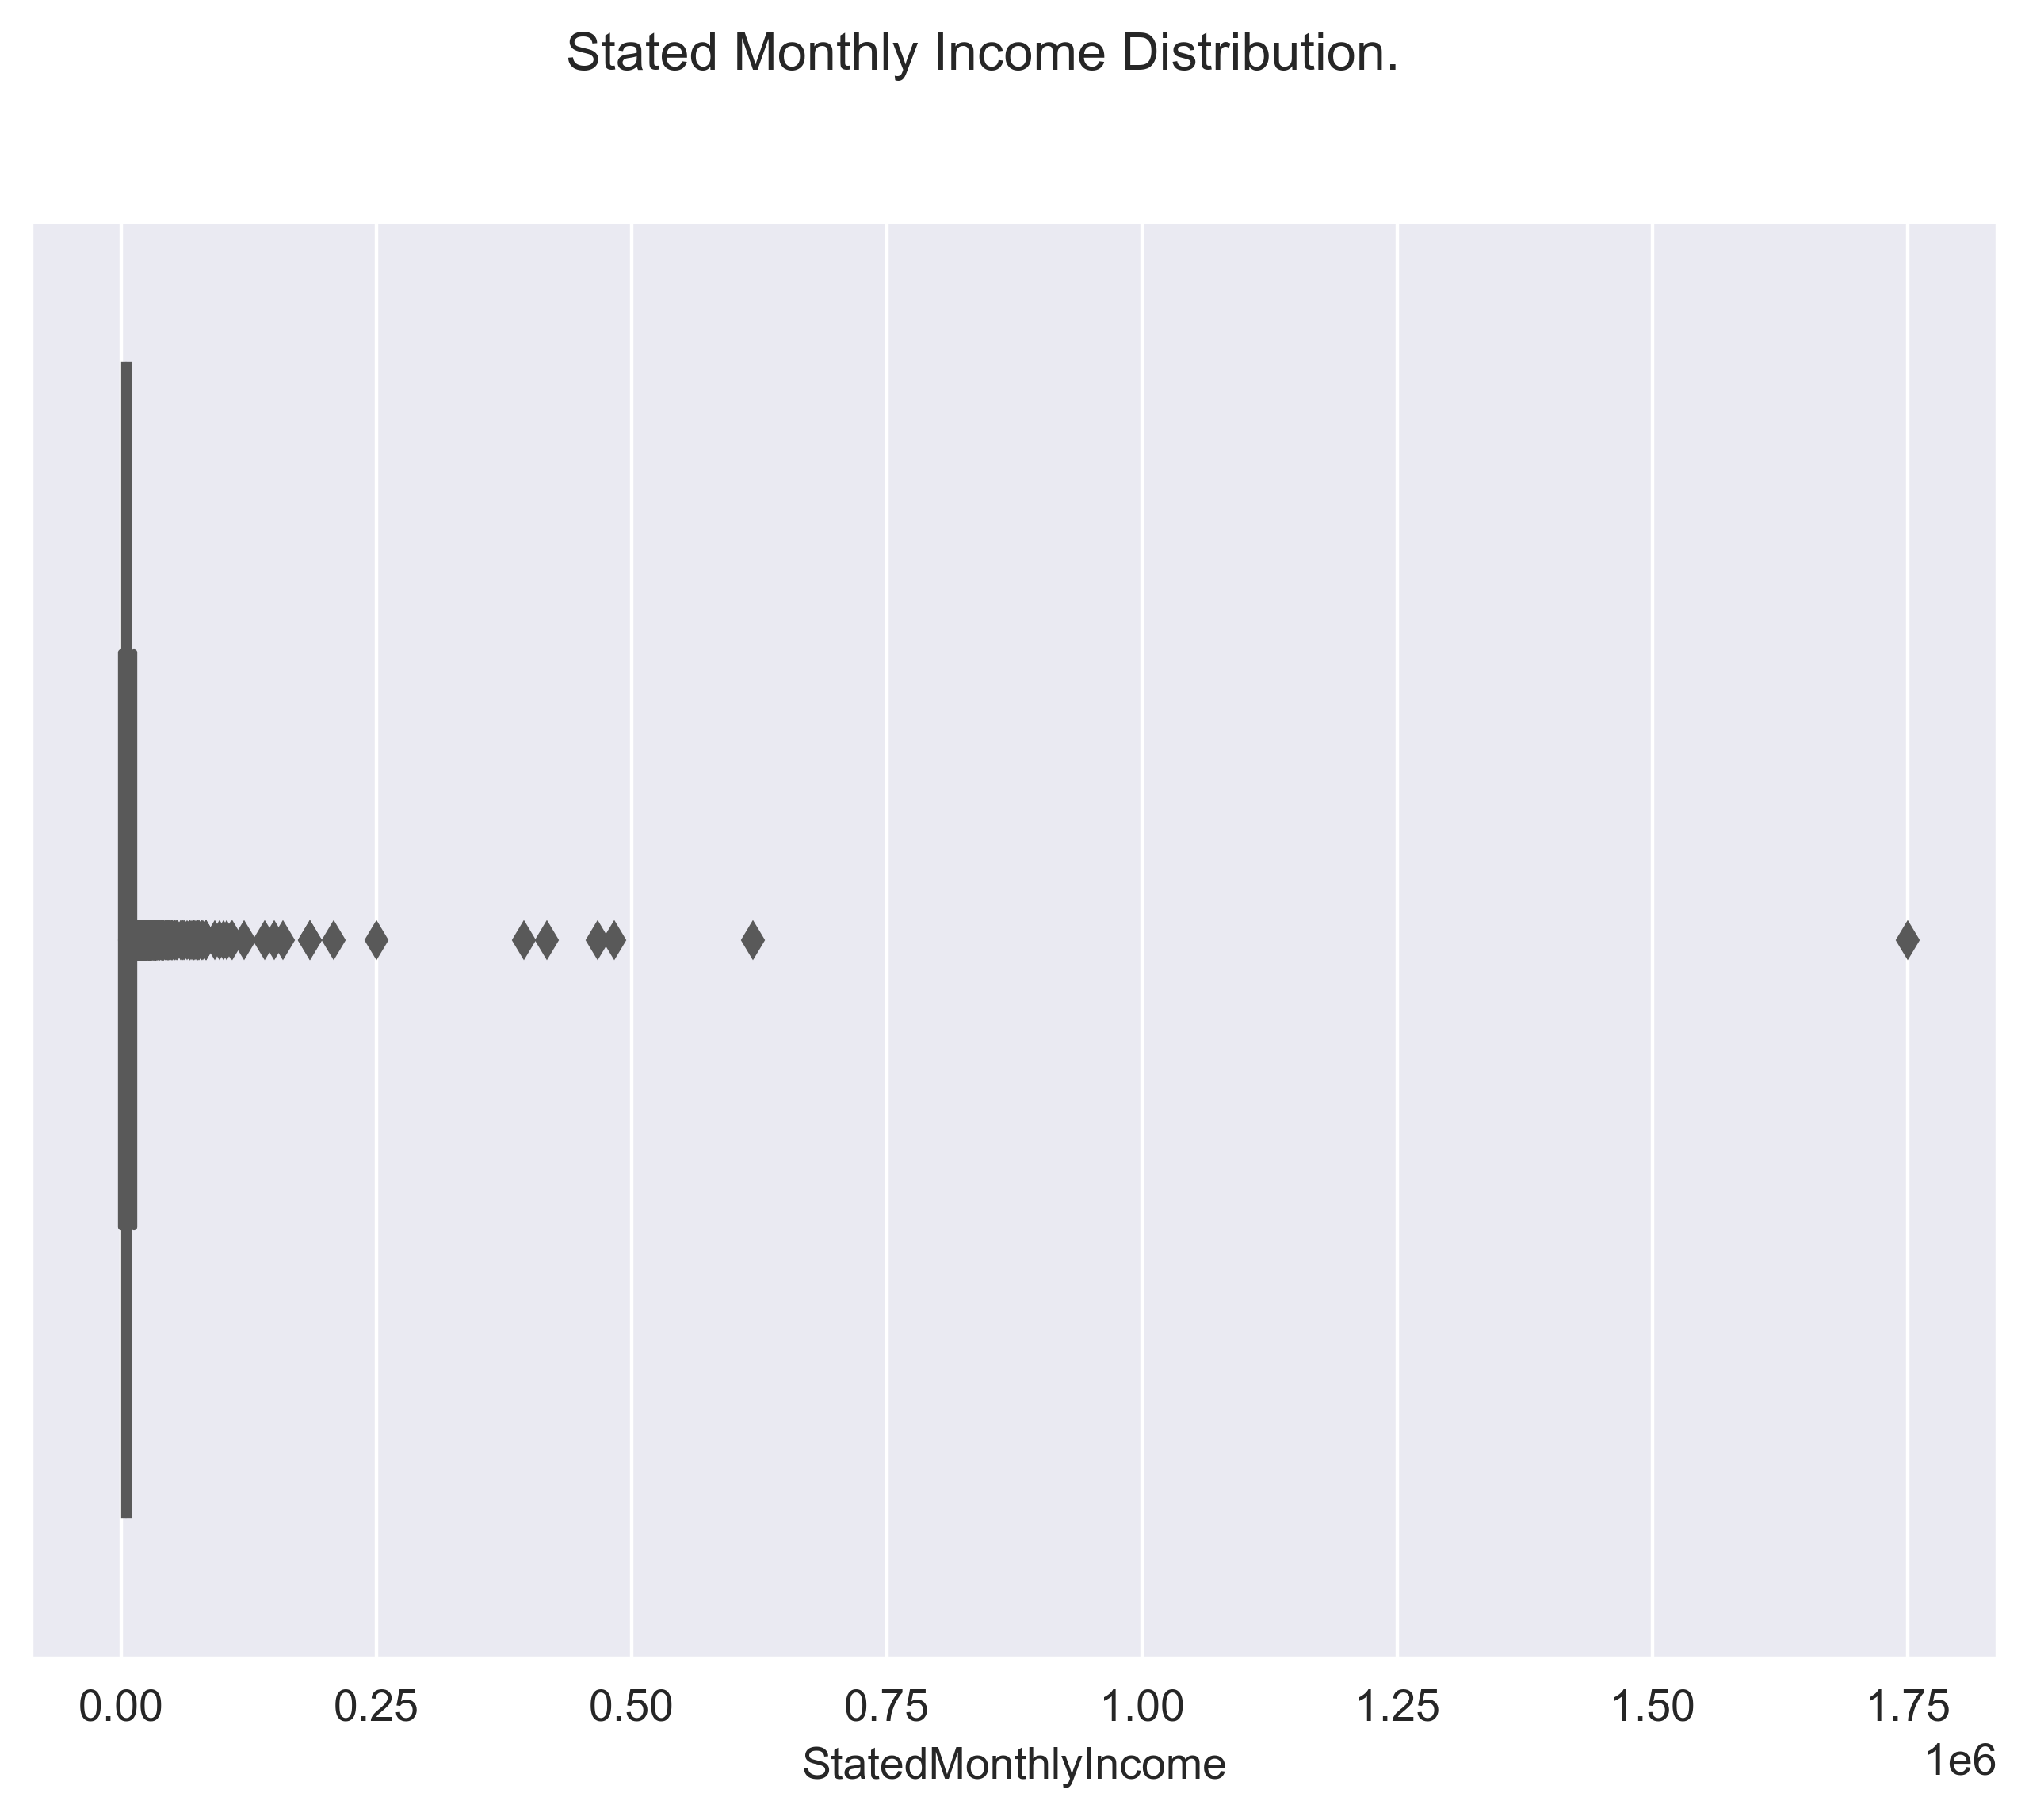

In [237]:
# To plot stated monthly income dist
univariate_boxplot('StatedMonthlyIncome', 'Stated Monthly Income Distribution.')

In the above figure, the original loan amount distribution is skew to the right, with outliers indicated by asterisks. A 25th percentile of loan original amount falls slightly below 5000 dollars, a median exceeds 5000 dollars, and a 75th percentile falls short of 15000 dollars.

> ### Summary
> **In order to analyze the loan with respect to the year, the loan origination date column was converted from object datatype to datetime, after which the year was extracted from the datetime column before setting the data type of the extracted year column as categorical variable, and the loan term values were converted from the original values 12months, 36months, and 60months to short term, medium term, and long term to make for a better categorical variable behavior.**

> **There are several categories of days representing past due in the loan status. These values have been replaced with a single value named 'past due' regardless of the number of days.The borrower state values were transformed from state abbreviation to full text without leaving out the stated monthly income and monthly loan payment variables from transformation, which were converted from float to integer for consistency with the loan amount data type. A categorical data type was applied to the occupation column, which was previously an object type.**

> **There are 87778 loans disbursed on a medium term of 36months in this case, representing around 77 percent of the duration of the loan, leaving the remaining 23 percent distributed over long term (60 months) and short term (12months) loans. Over 10 years, from 2005 to 2014, there were 34345 loan disbursements. The year 2013 had the highest number, followed by the year 2012 and 2014 at second and third, respectively. The least number occurred in 2005 with 22 loans disbursed. Other observation were documented above.**

## Bivariate Exploration

- To establish a categorical variable's relativity with another categorical variable, this would indicate how much of a categorical variable spreads over another categorical variable.

In [238]:
# To plot a bivariate countplot
def bivariate_count_plot(x, hue, title):
    """plot a countplot"""
    """param: x, hue title"""
    """return none"""
    plt.figure(figsize=(8,6), dpi = 400)
    ax = sns.countplot(x = x, hue = hue, data = prosperloan_reduced)
    for p in ax.patches:
      ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.05))
    plt.suptitle(title)
    plt.xticks(rotation = 90)
    ax.margins(y=0.1)
    plt.xlabel('Loan Status', fontsize = 15)
    plt.tight_layout()
    plt.plot()   
plt.show();

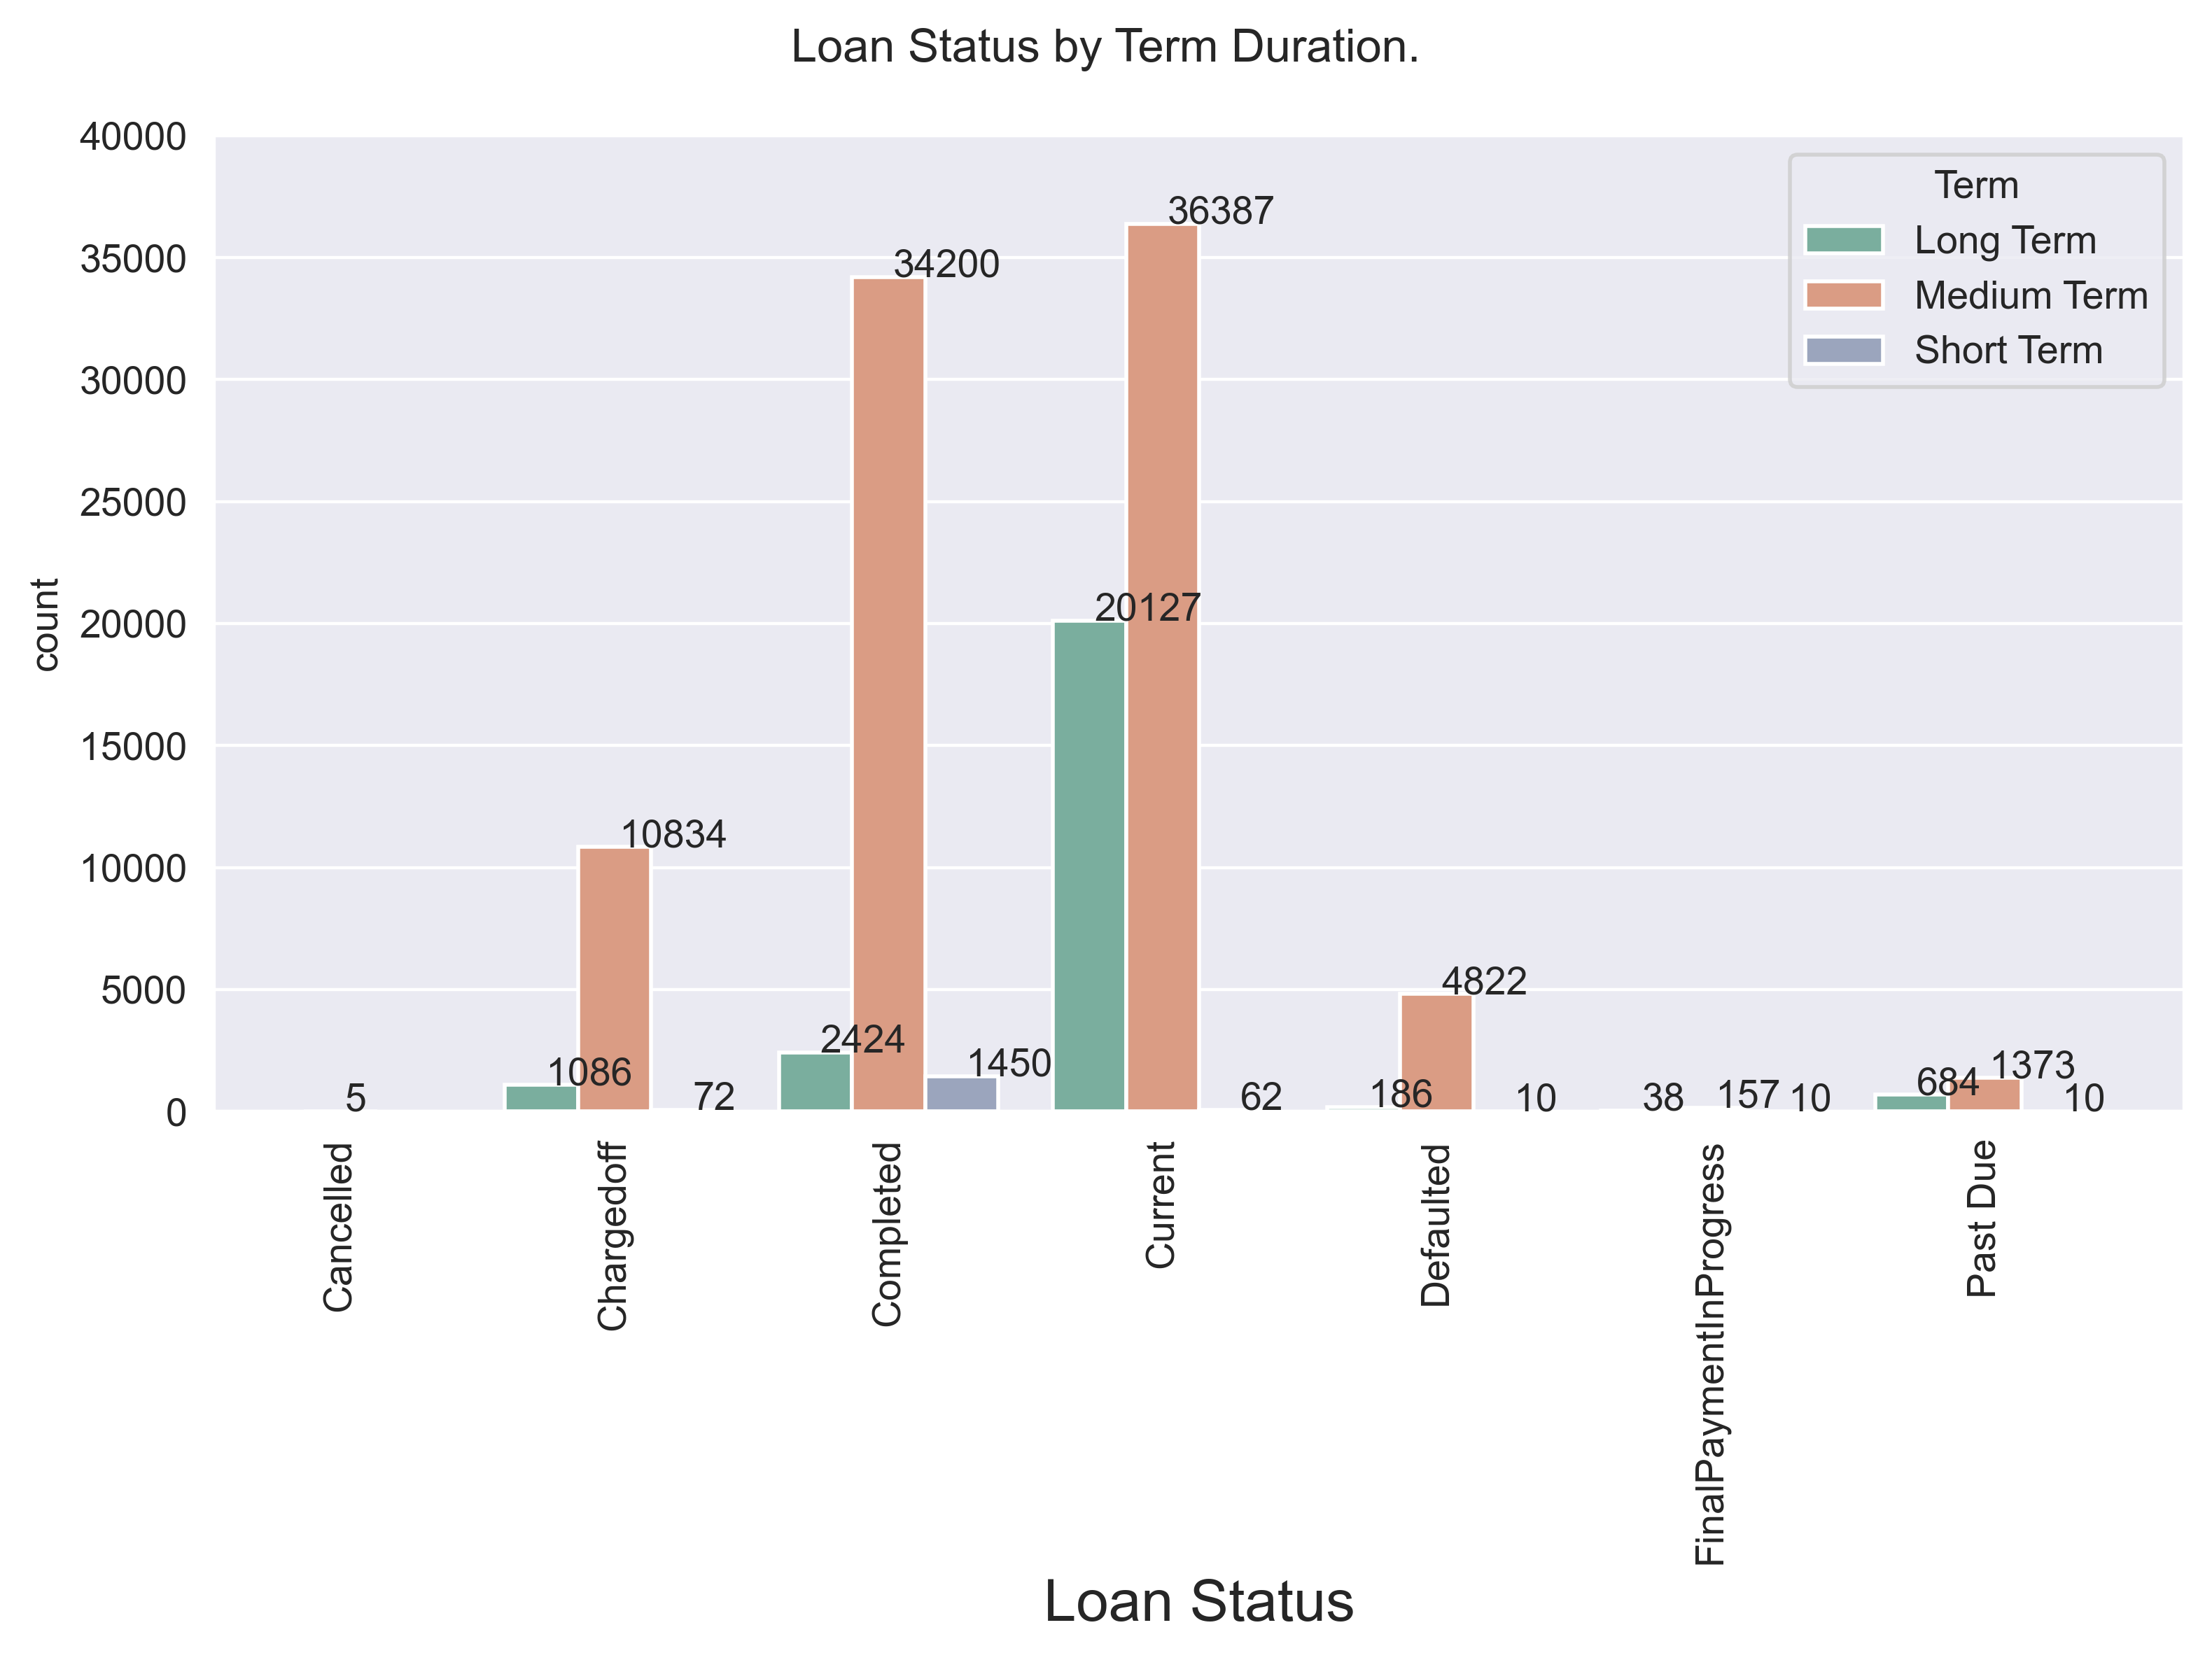

In [239]:
# call func to plot laon status by term
bivariate_count_plot('LoanStatus', 'Term', 'Loan Status by Term Duration.')

A distribution of loan duration shows that medium-term loans are the most prevalent. The figure above illustrates how much this spreads over different loan status categories. 20127 loans were on long term, 36387 were on medium-term, while only 62 were on short term loans.There are 684 past dues with a long term duration, 1373 with a medium term duration, and 10 with a short term duration in the past due category. The figure above illustrates other categories.

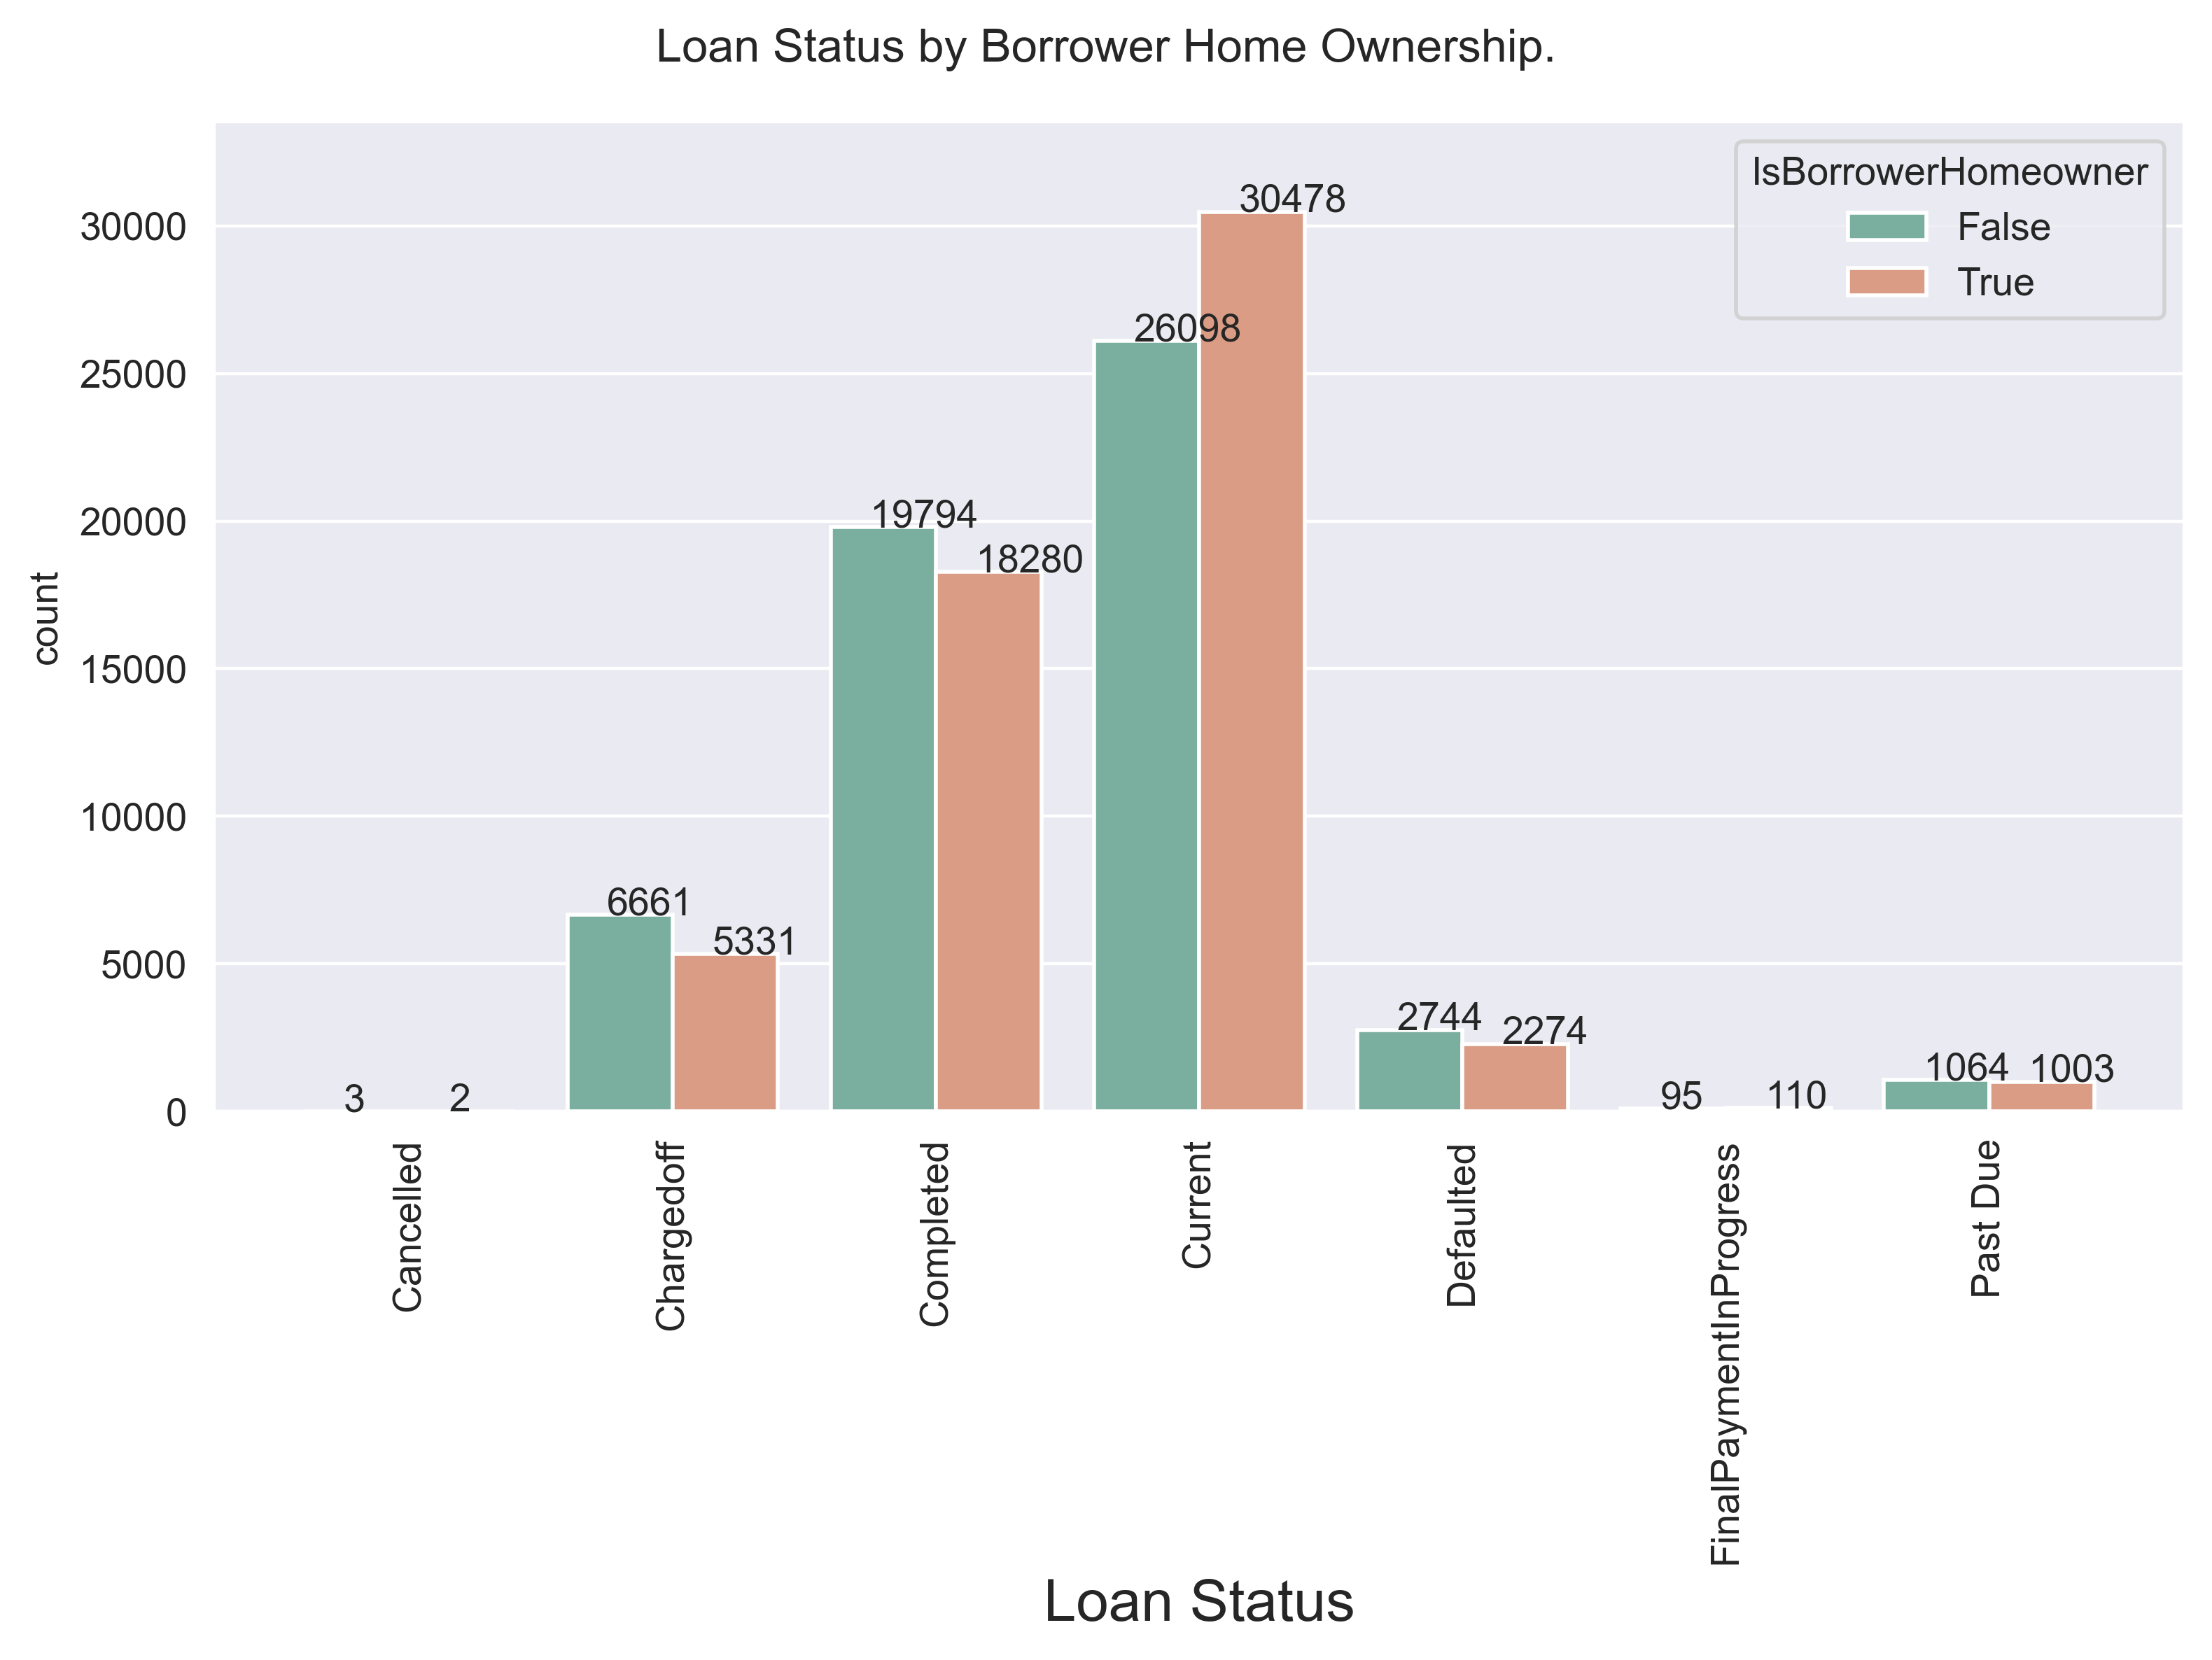

In [240]:
# To plot laon status by home ownership
bivariate_count_plot('LoanStatus', 'IsBorrowerHomeowner', 'Loan Status by Borrower Home Ownership.')

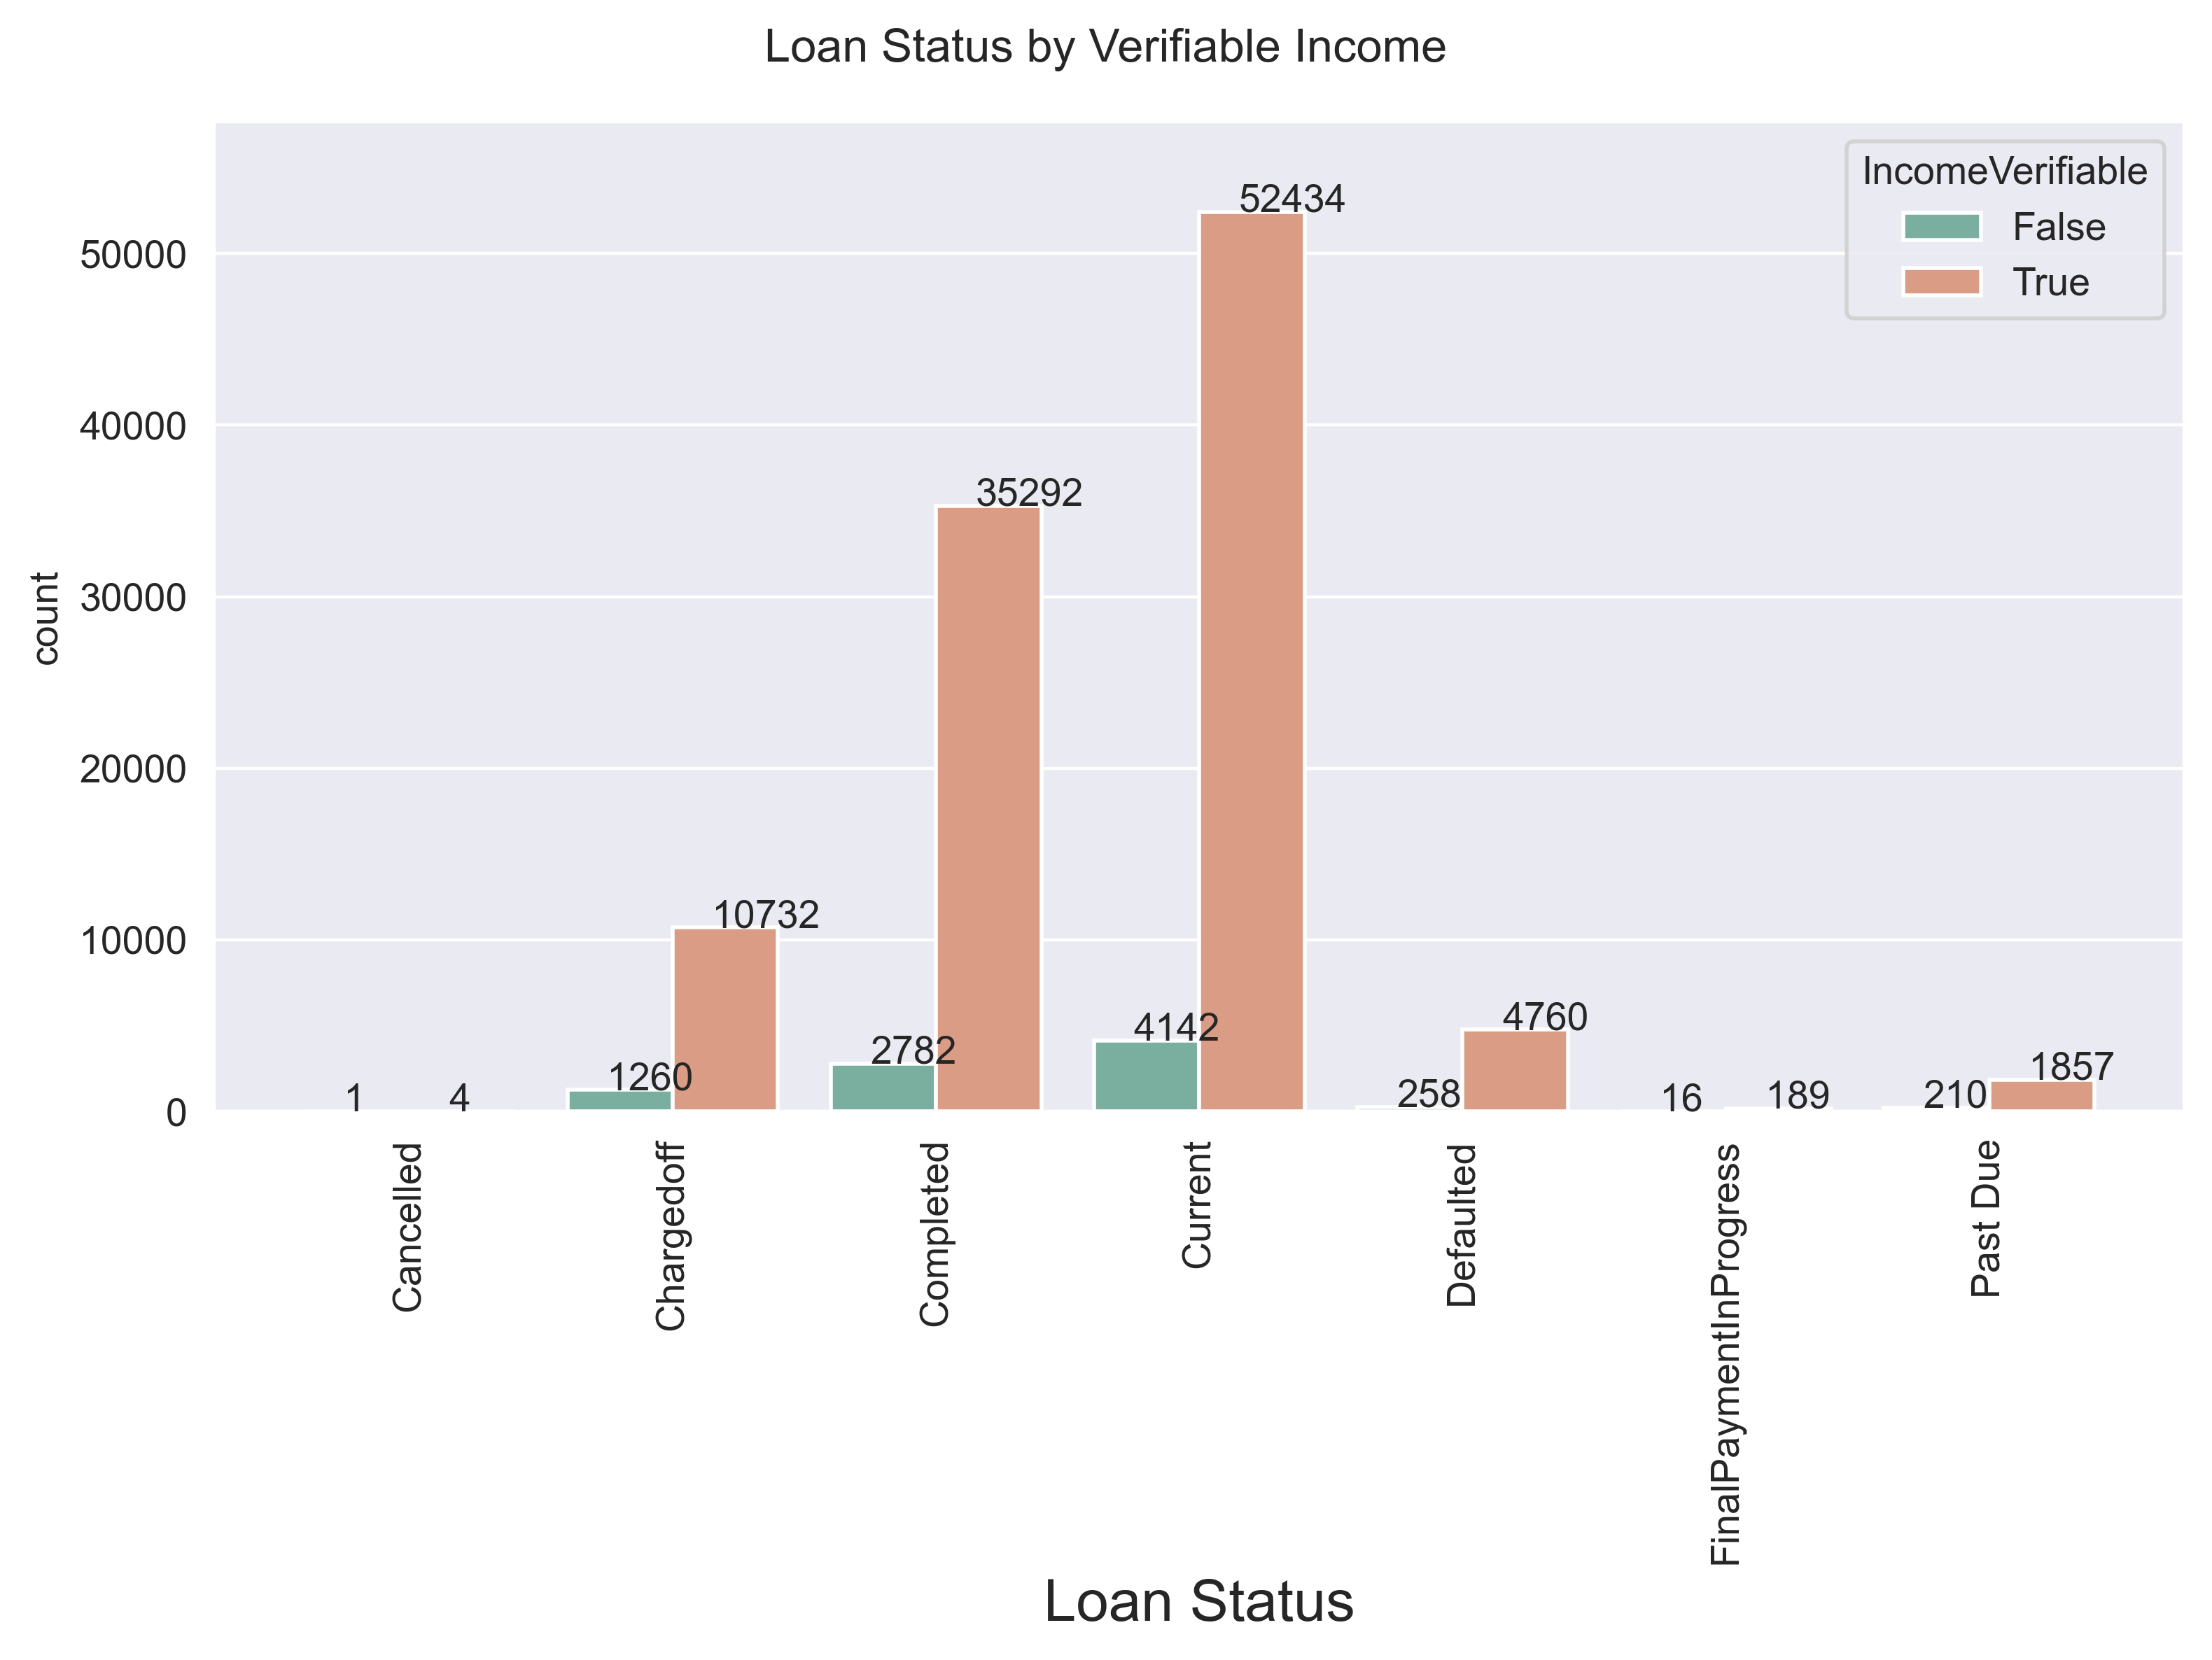

In [241]:
# To plot laon status by verifiable income
bivariate_count_plot('LoanStatus', 'IncomeVerifiable', 'Loan Status by Verifiable Income')

A verifiable income variable that has the highest occurrences in the distribution in earlier findings has the true value. This figure depicts how this spreads over the loan status category. For the current loan status, 52434 have true income (verifiable income), while 4142 have false income (no verifiable income).The past due category has a spread of 1857 verifiable income borrowers, and 210 non-income verifiable borrowers. The completed loan status category has verifiable income borrowers of 35292 while 2792 does not have a verifiable income.

In [242]:
# define a func to plot lineplot
def line_plot(x, y, title):
    """plot a line plot"""
    """param: x, y, title"""
    """return none"""
    plt.figure(figsize=(8,6), dpi= 400)
    p = sns.lineplot(x = x, y = y, data = prosperloan_reduced)
    plt.title(title); 

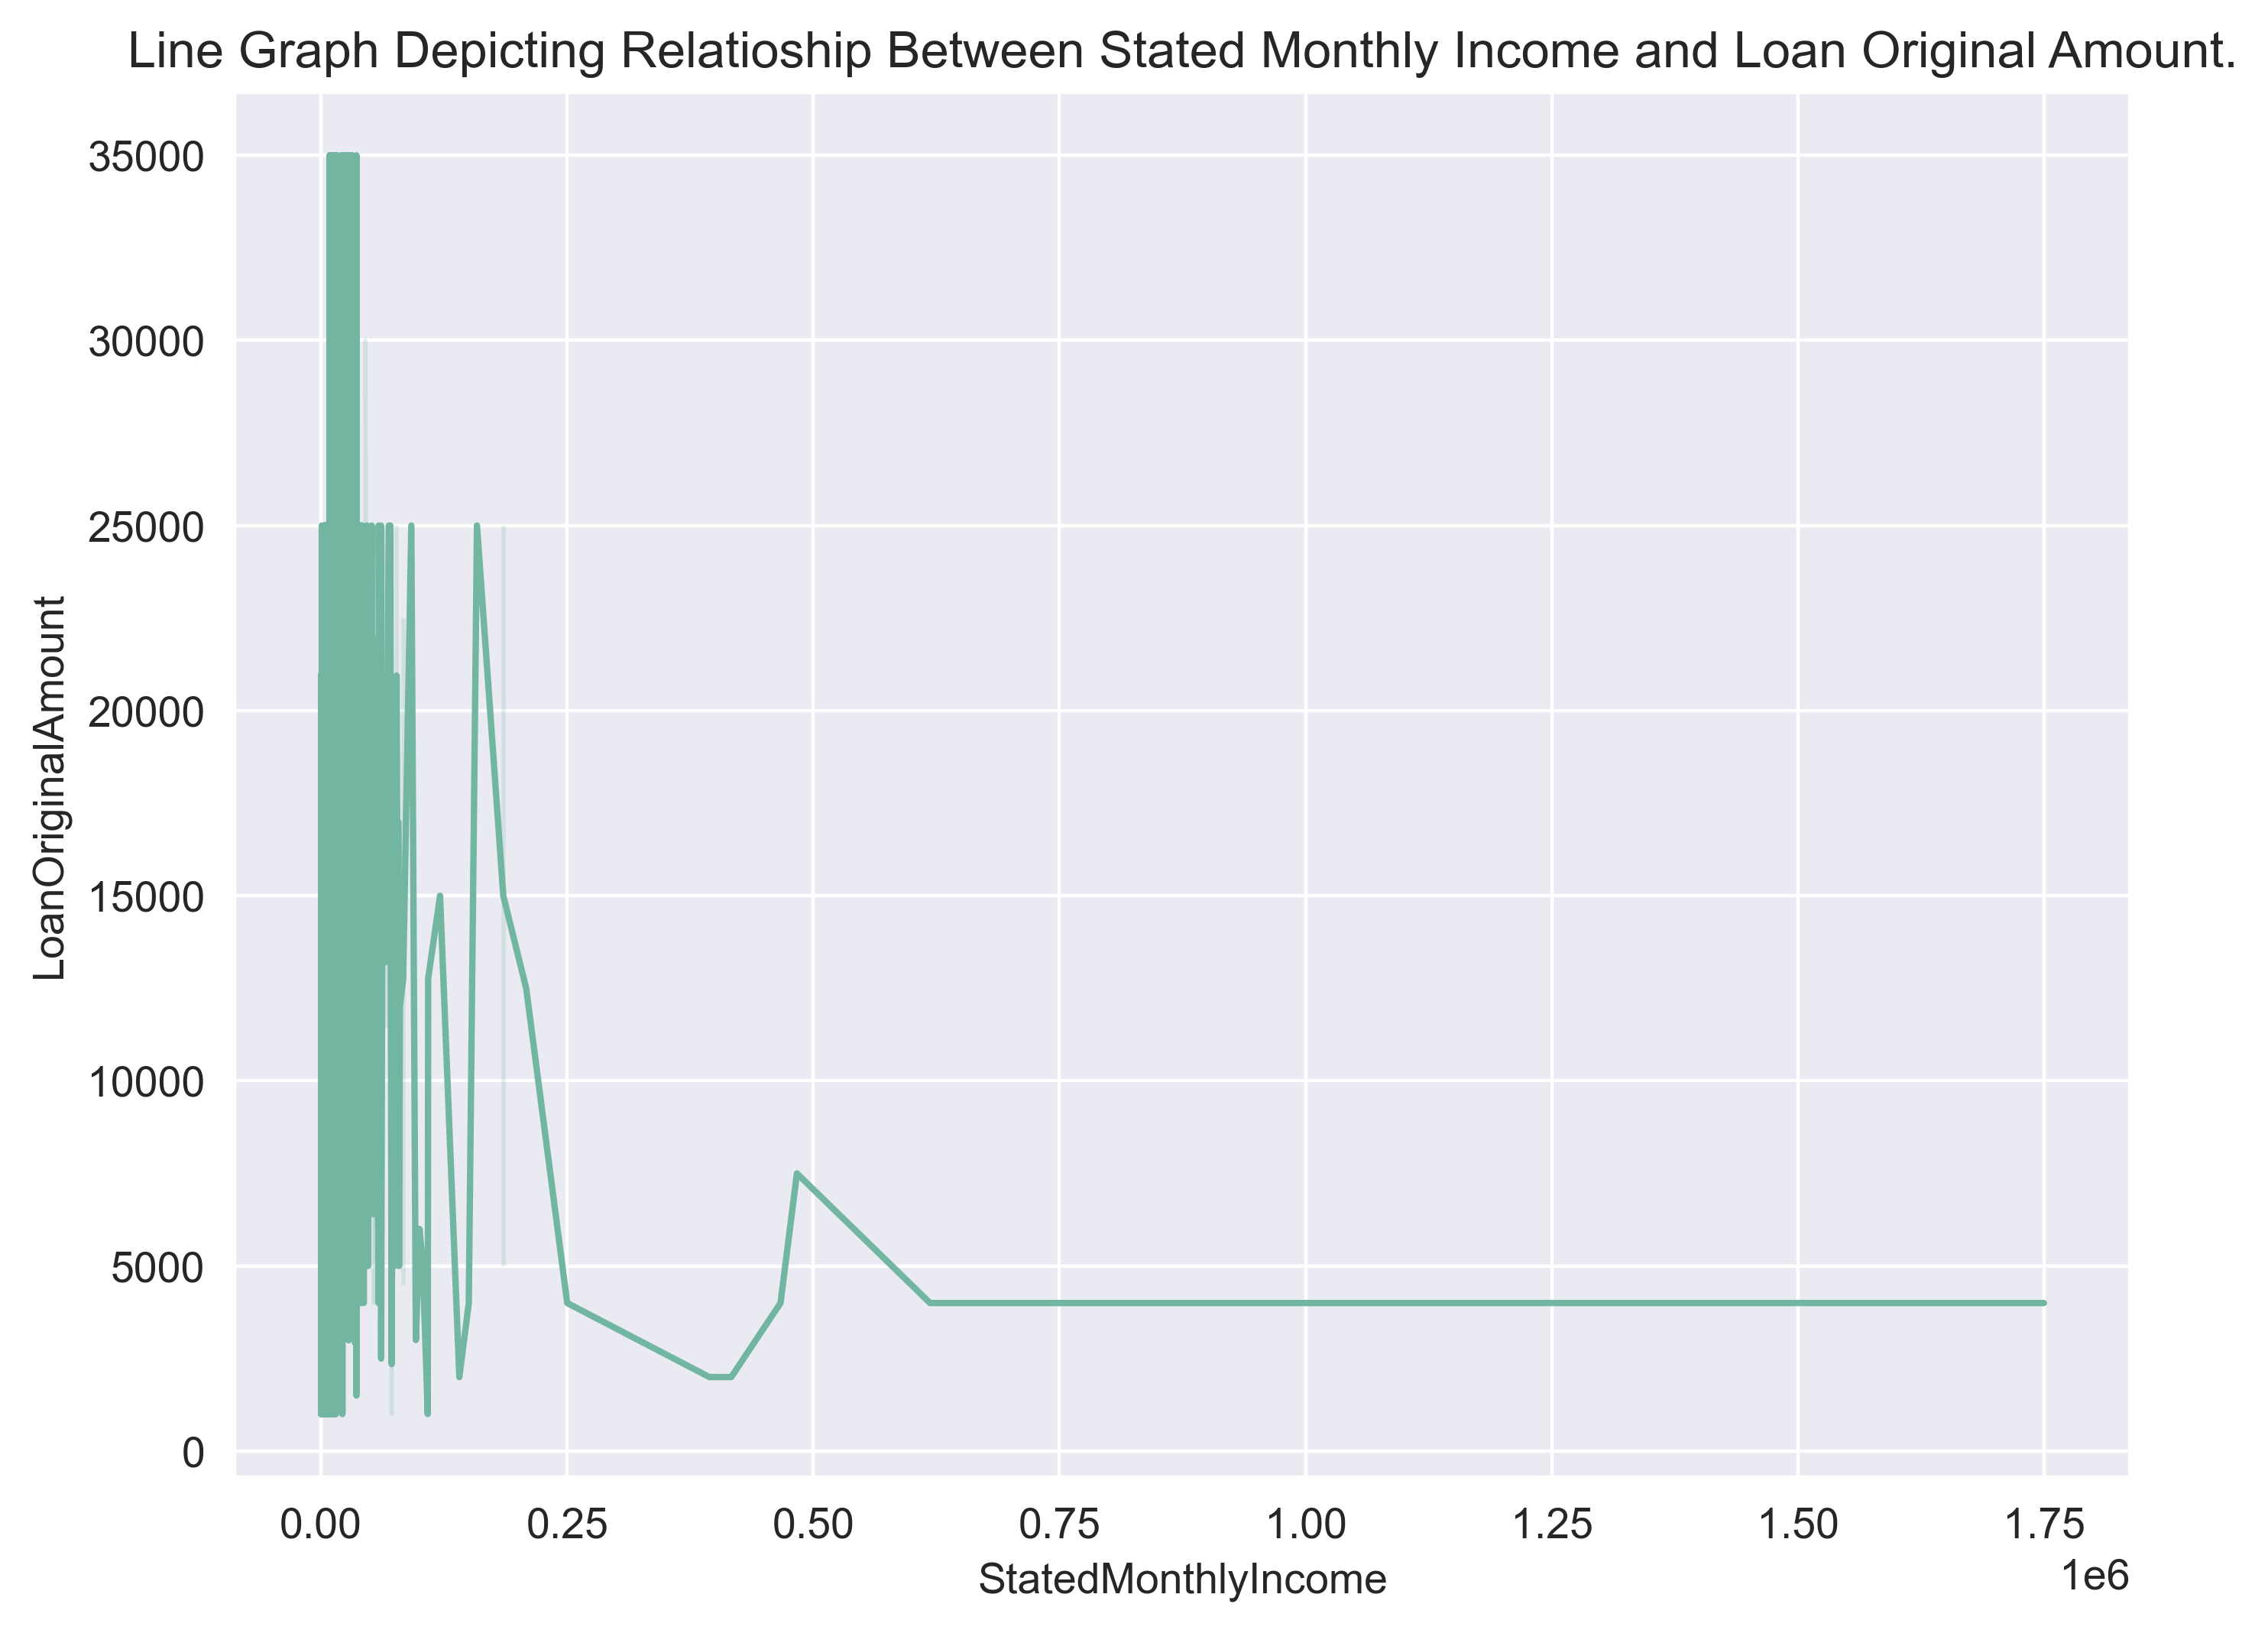

In [243]:
# To plot lineplot of stated monthly income against loan original amount
line_plot('StatedMonthlyIncome', 'LoanOriginalAmount', 'Line Graph Depicting Relatioship Between Stated Monthly Income and Loan Original Amount.')

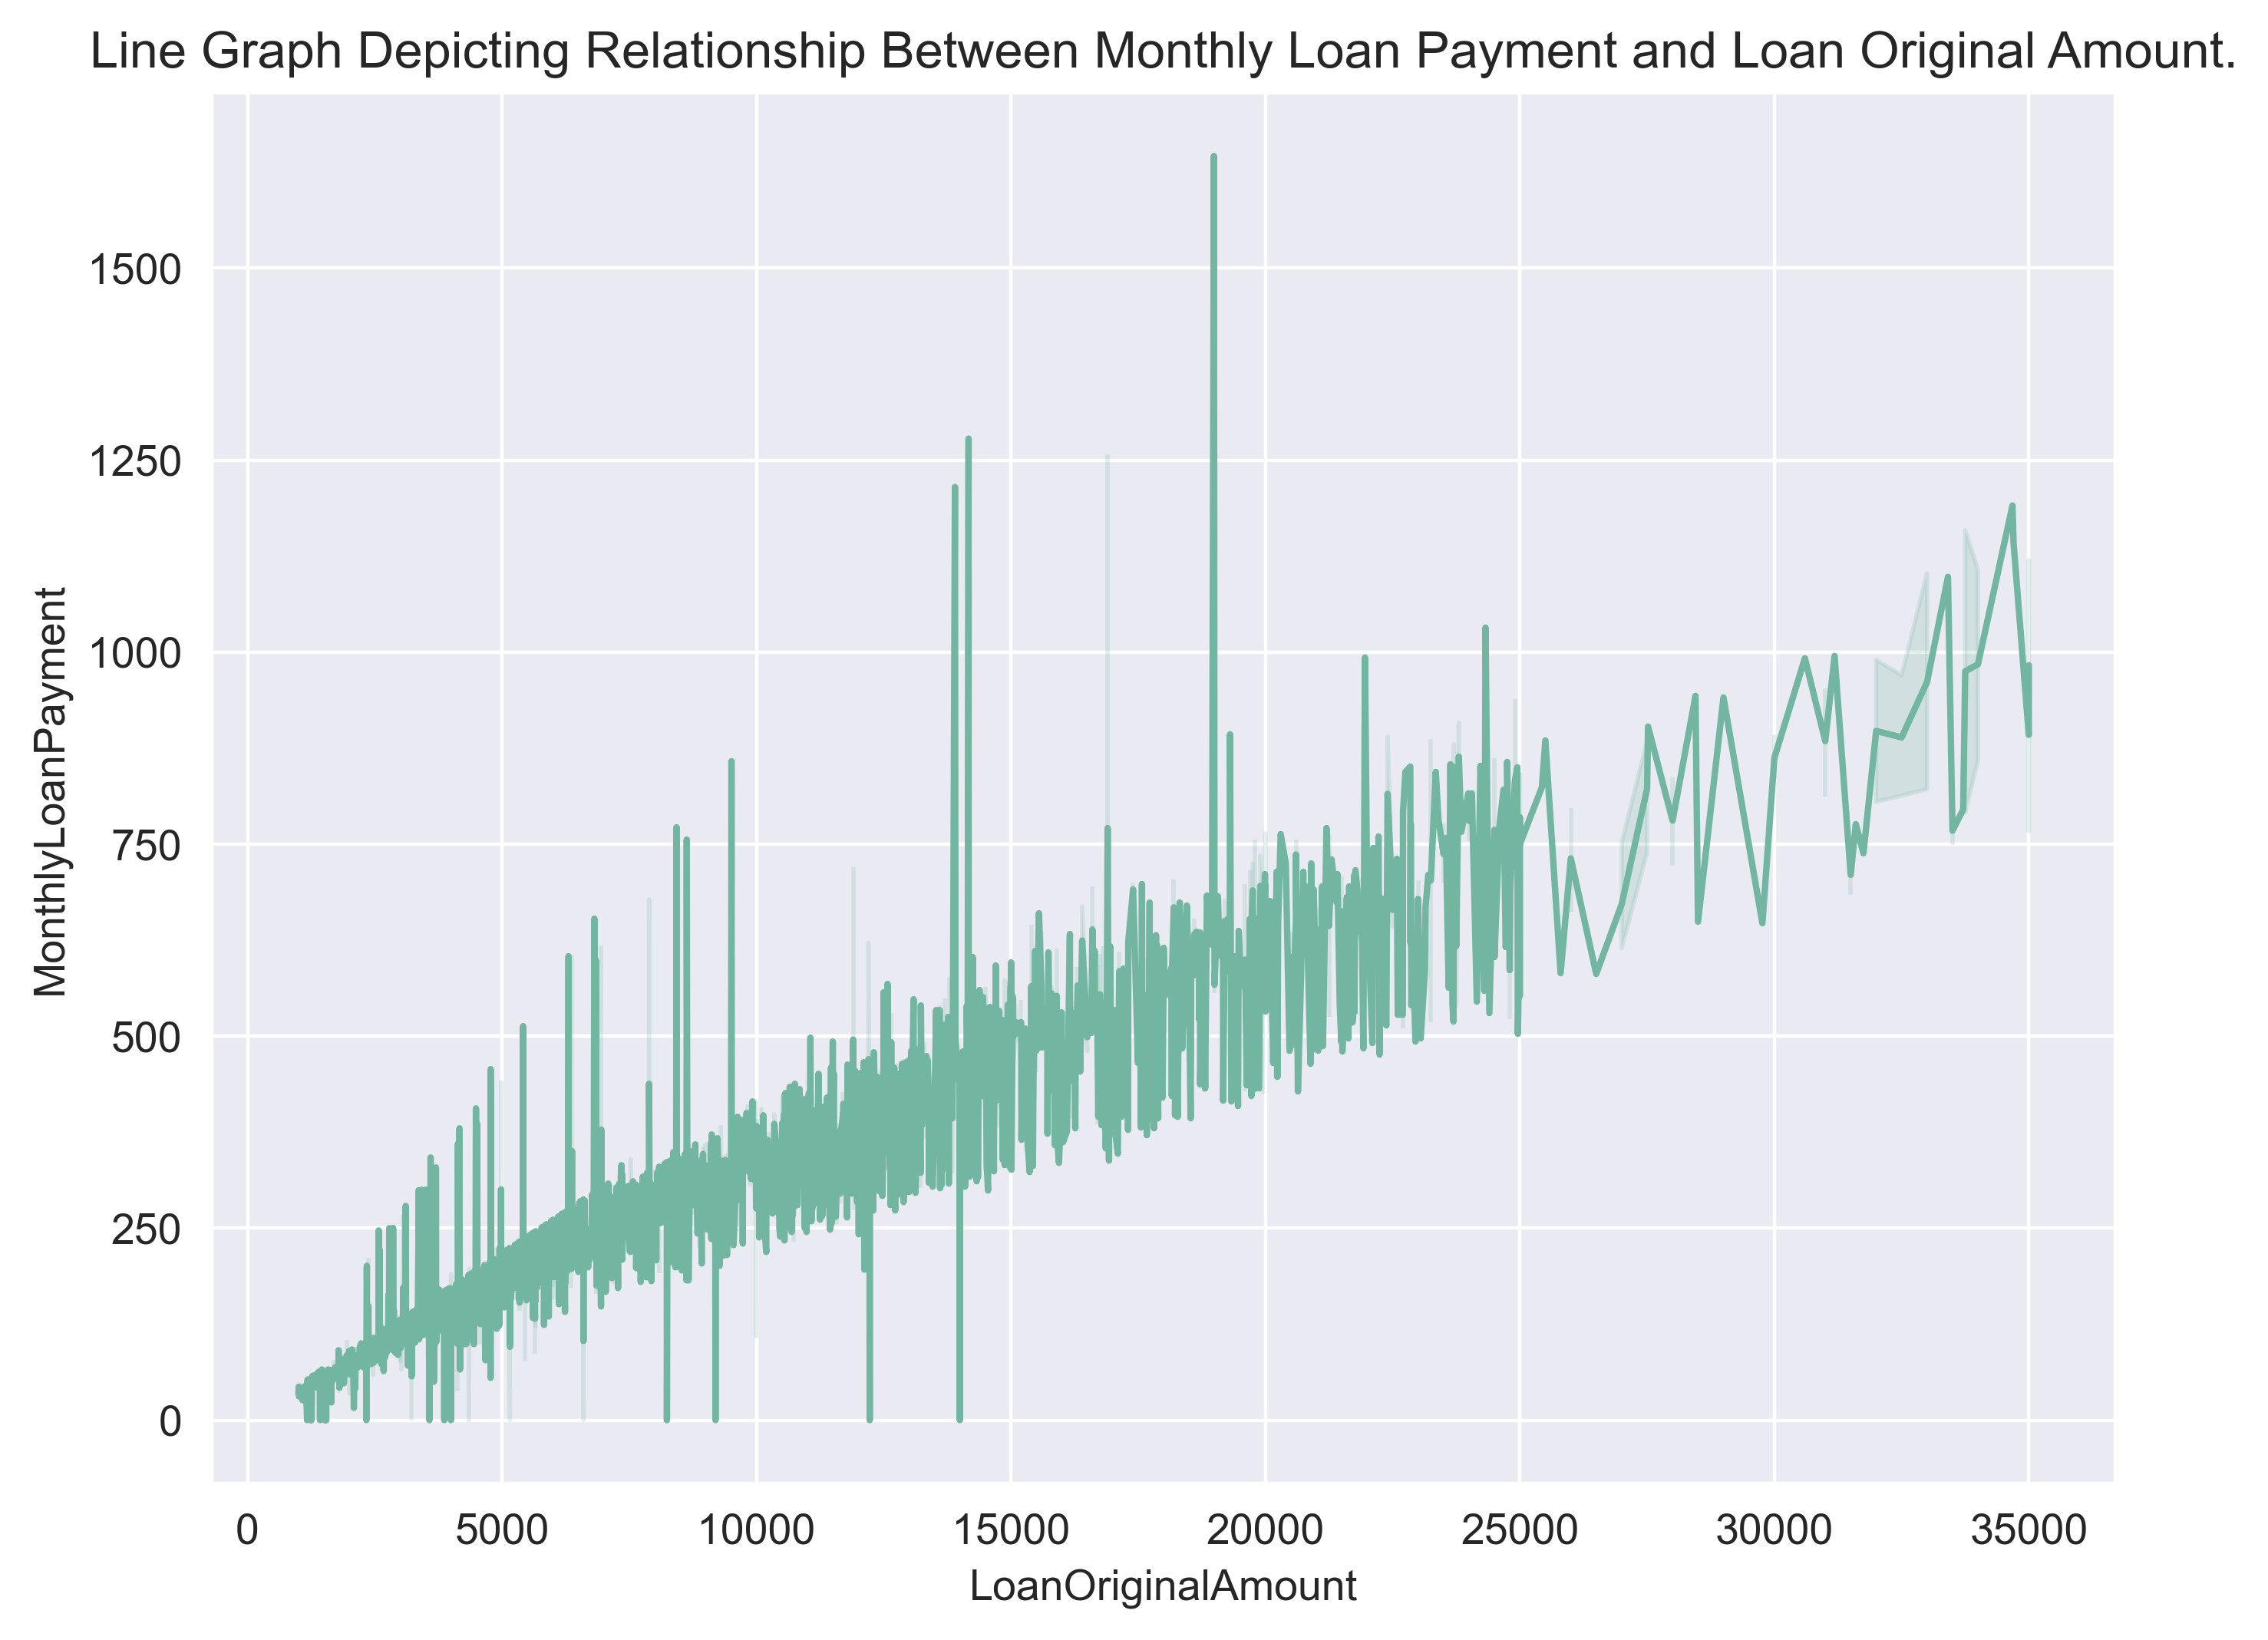

In [244]:
# To lineplot of monthly loan payment against loan original amount
line_plot('LoanOriginalAmount', 'MonthlyLoanPayment', 'Line Graph Depicting Relationship Between Monthly Loan Payment and Loan Original Amount.')

## Multivariate Exploration

- To show the relationship between three variables, two continous numerical variable and a categorical variable.

In [245]:
# define func to plot scatter plot loan original amount against current days of delinquency 
def draw_scatter(hue, title):
    """plot a scatterplot"""
    """param: hue, title"""
    """return none"""
    plt.figure(figsize=(10,8), dpi = 400)
    sns.scatterplot(x = 'LoanOriginalAmount', y = 'MonthlyLoanPayment', hue = hue, data = prosperloan_reduced)
    plt.xlabel('Loan Original Amount(Dollars)')
    plt.ylabel('Monthly Loan Payment(Dollars)')
    plt.title(title);

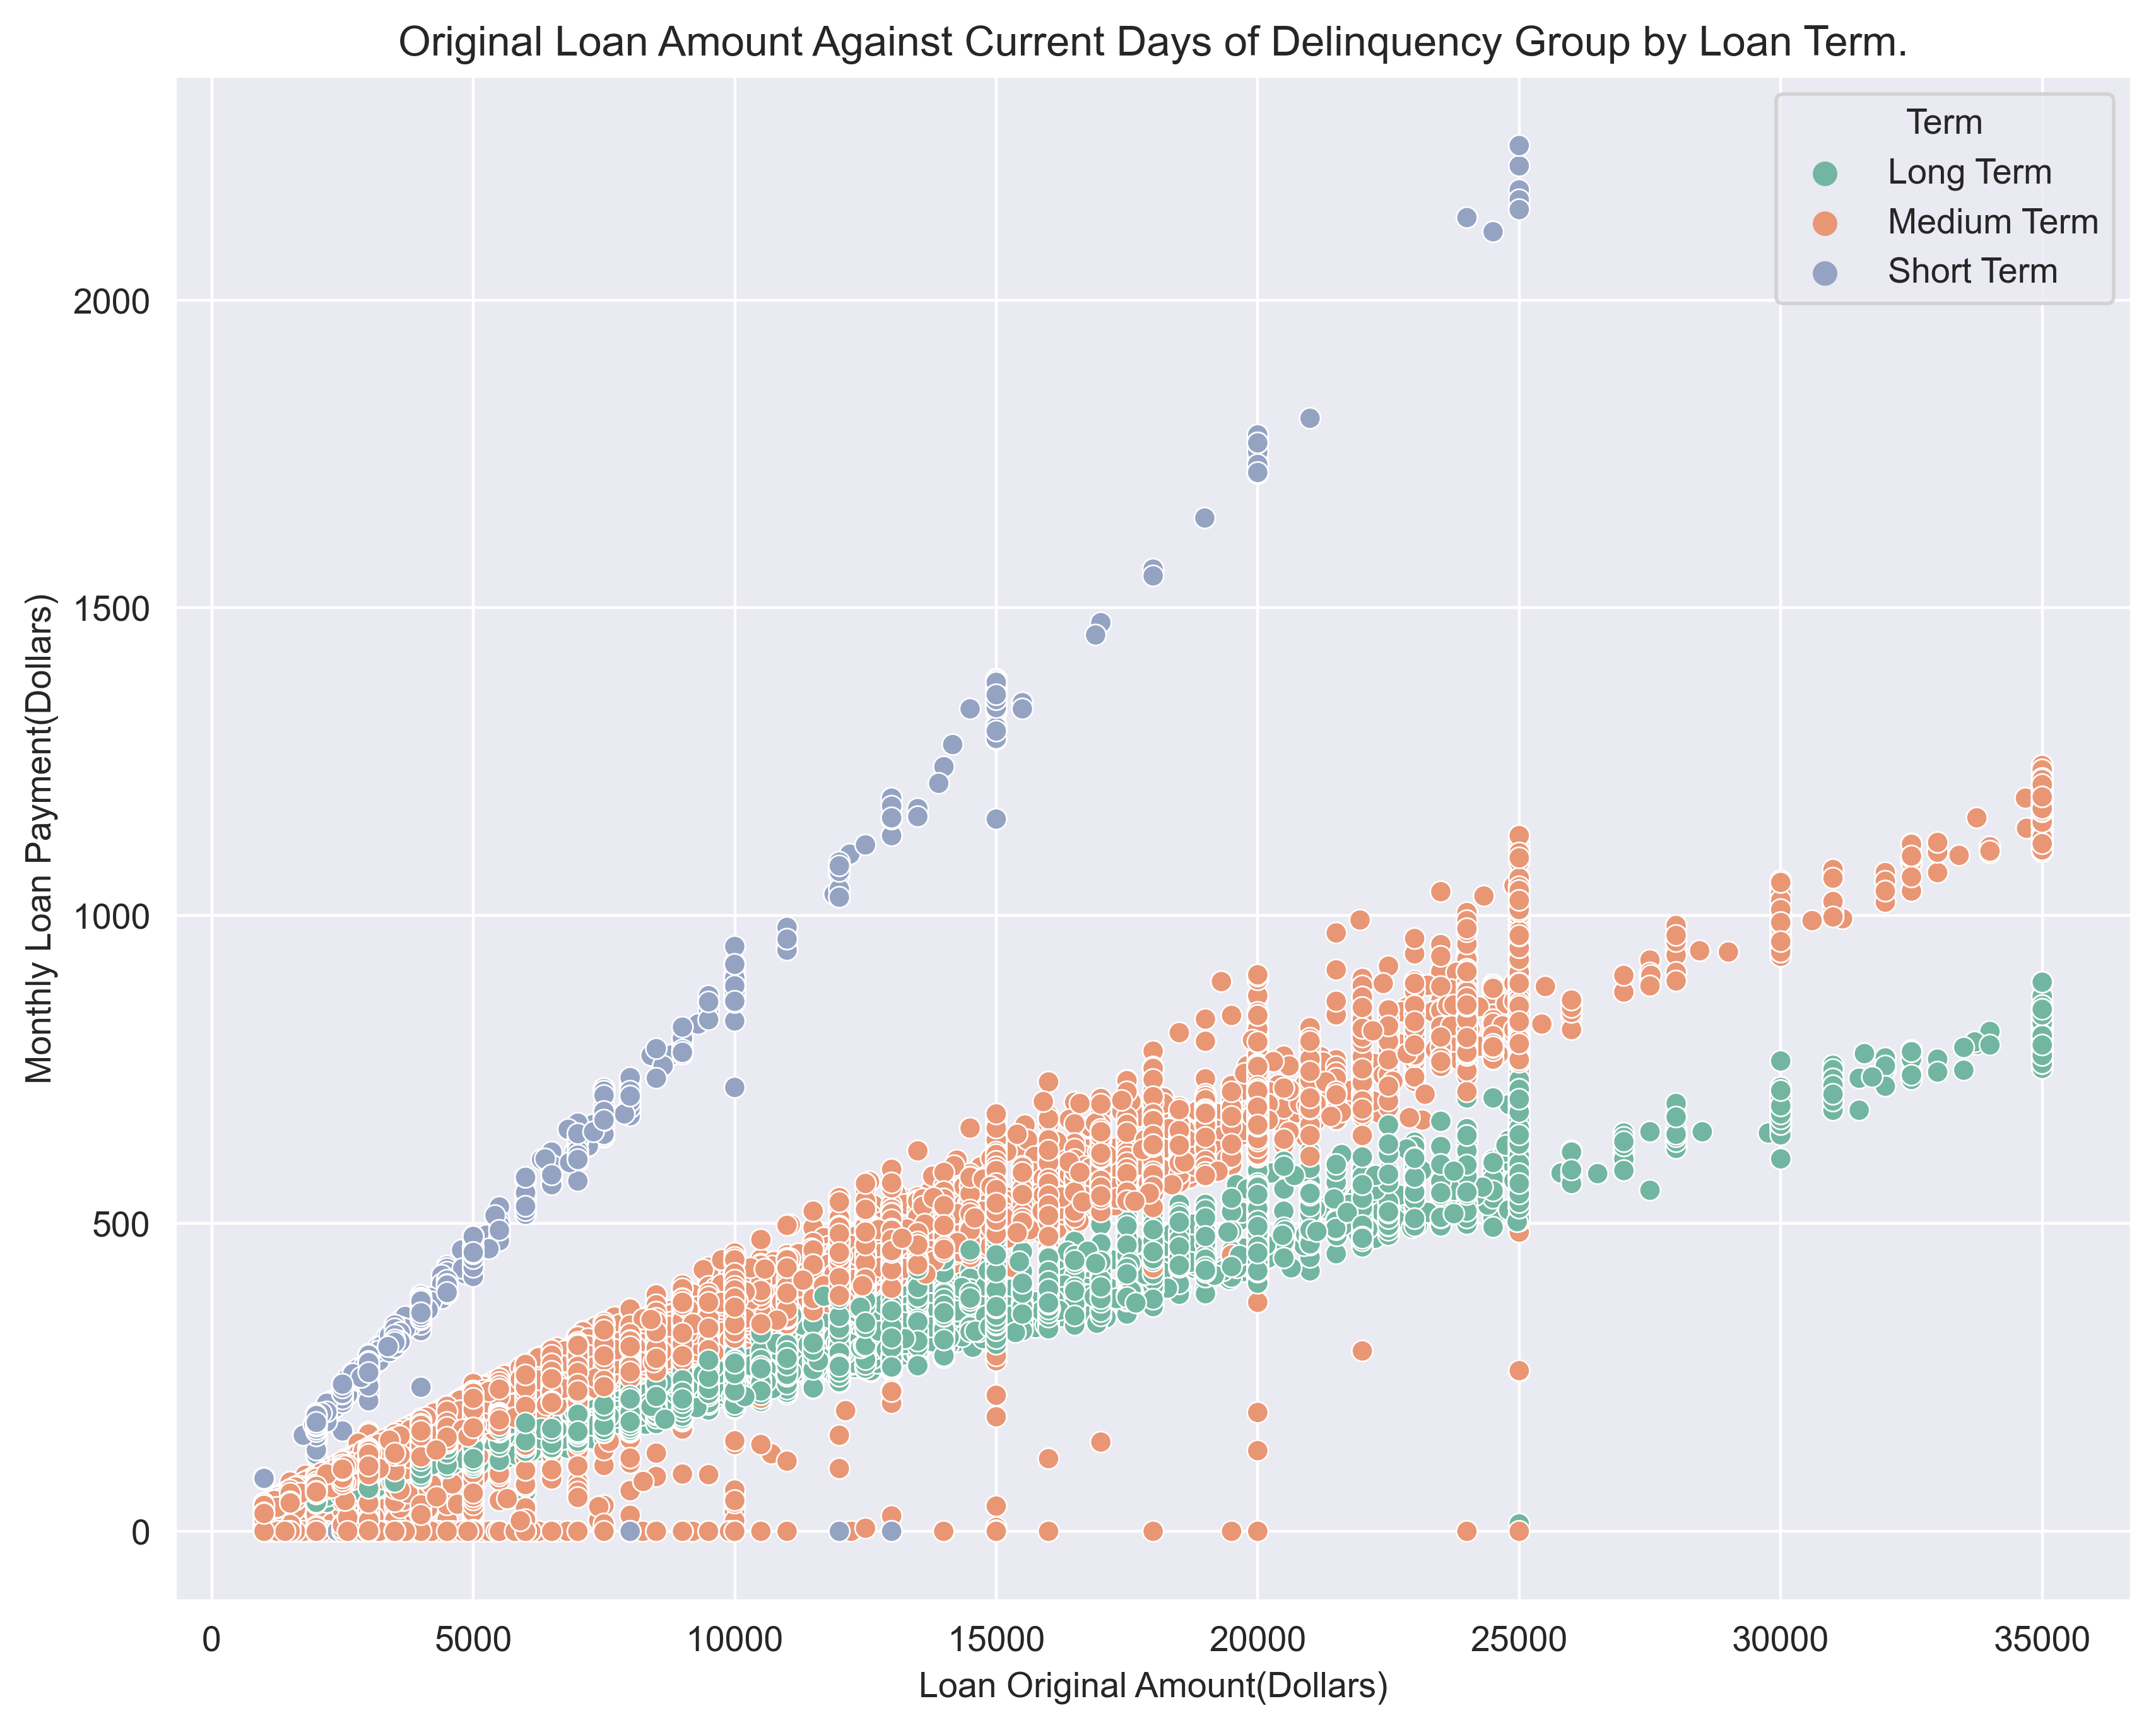

In [246]:
# To plot scatter plot group by loan term
draw_scatter('Term', 'Original Loan Amount Against Current Days of Delinquency Group by Loan Term.')

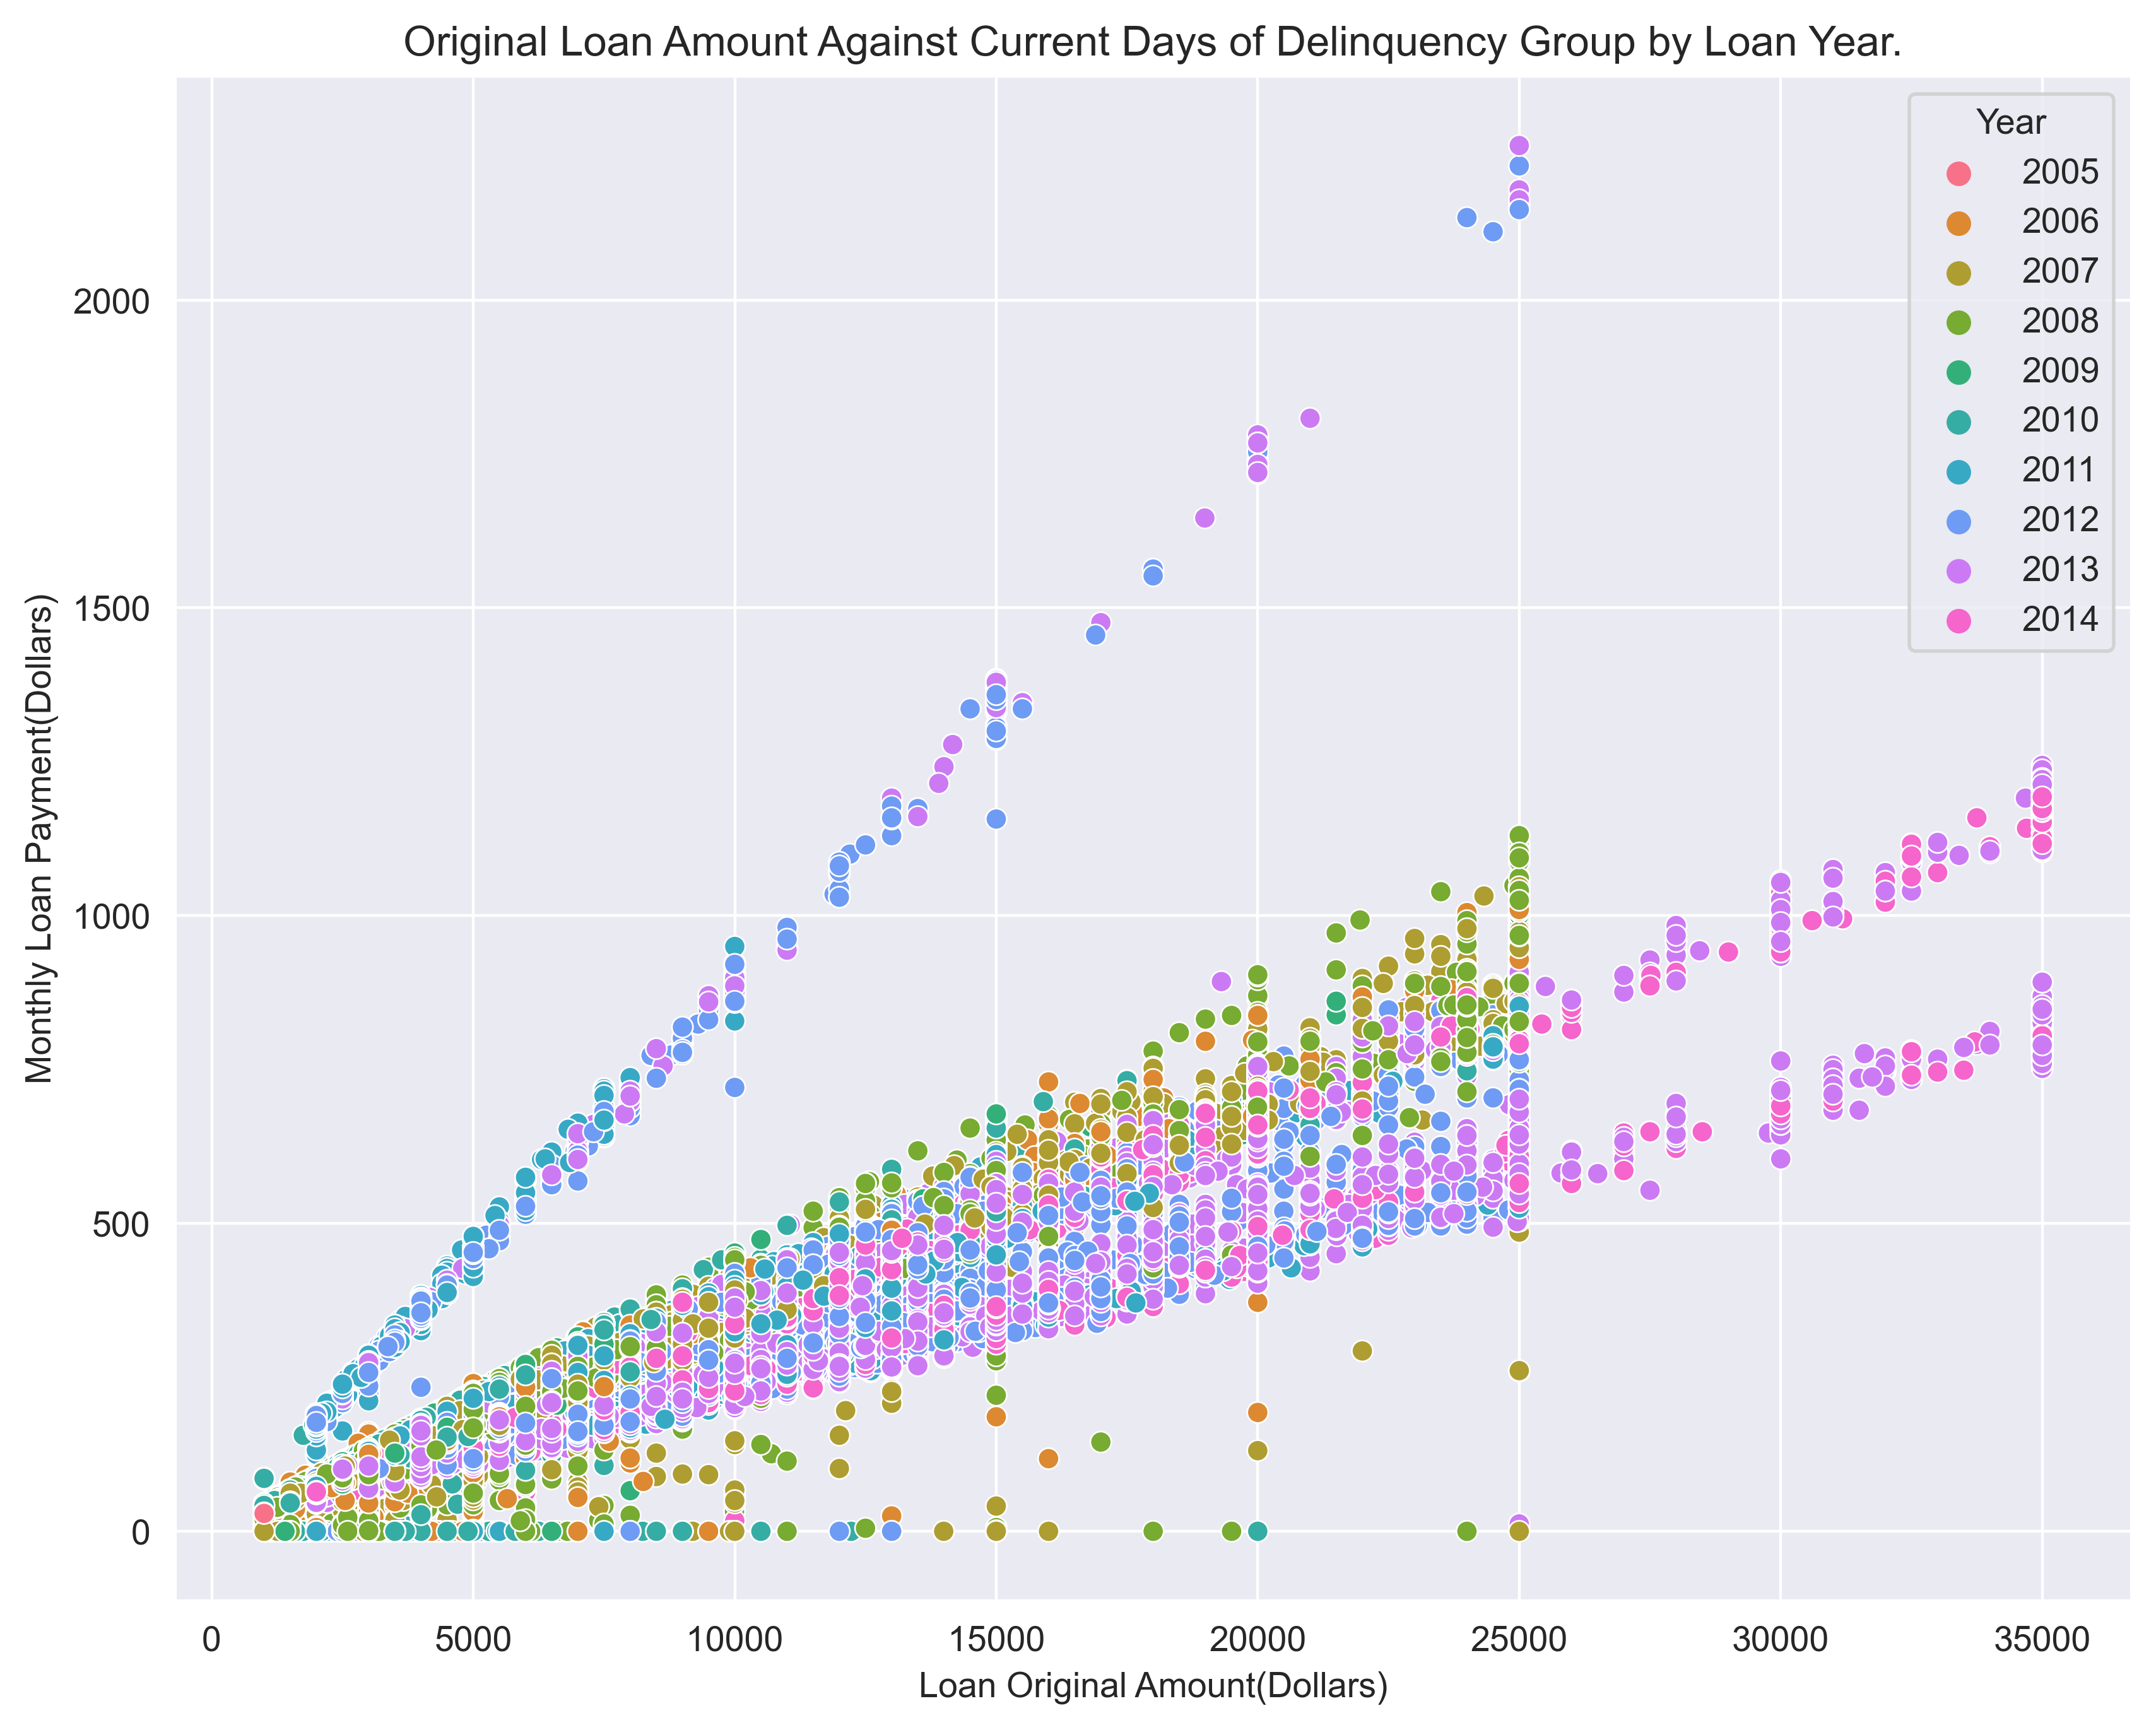

In [247]:
# To plot scatter plot group by year
draw_scatter('Year', 'Original Loan Amount Against Current Days of Delinquency Group by Loan Year.')

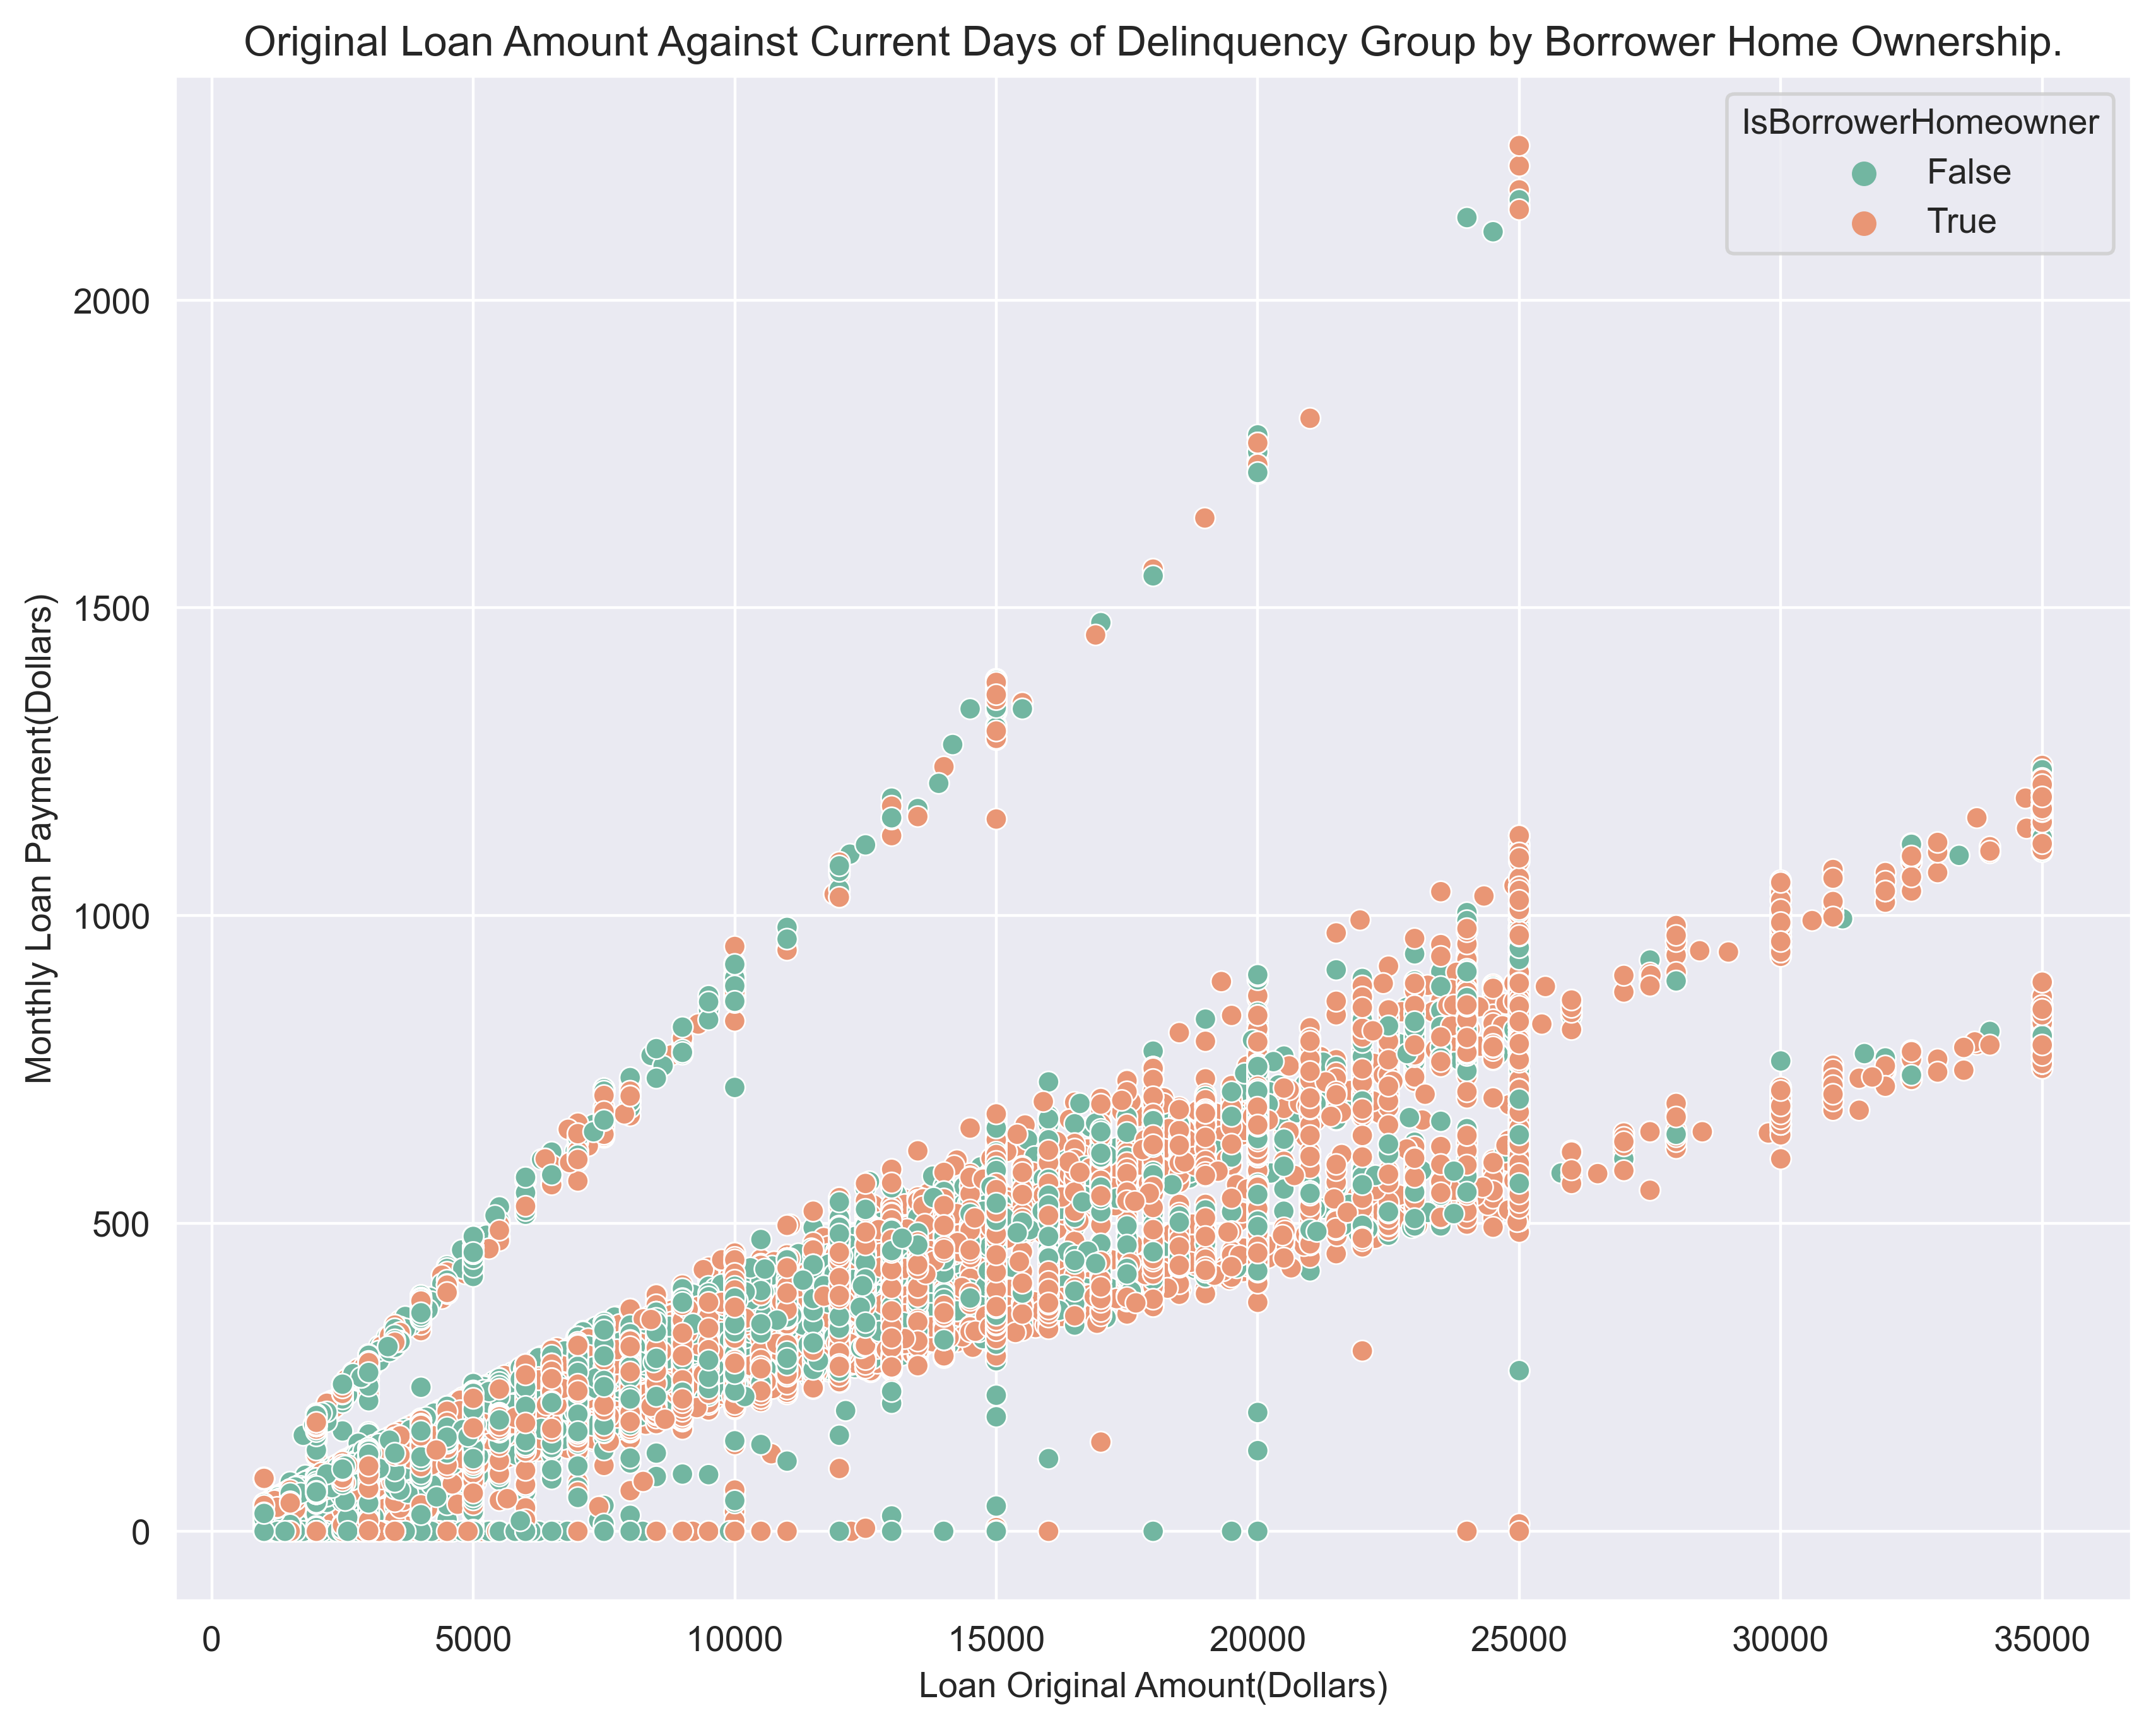

In [248]:
# To plot scatter plot group by borrower home ownership
draw_scatter('IsBorrowerHomeowner', 'Original Loan Amount Against Current Days of Delinquency Group by Borrower Home Ownership.')

The data points are dispersed across the plot and are organised according to job status; there is a positive correlation between the loan's original amount and the monthly loan payment.

Text(0.5, 1.0, 'Correlation Matrix Depicting Relationship Between Variable with Heatmap.')

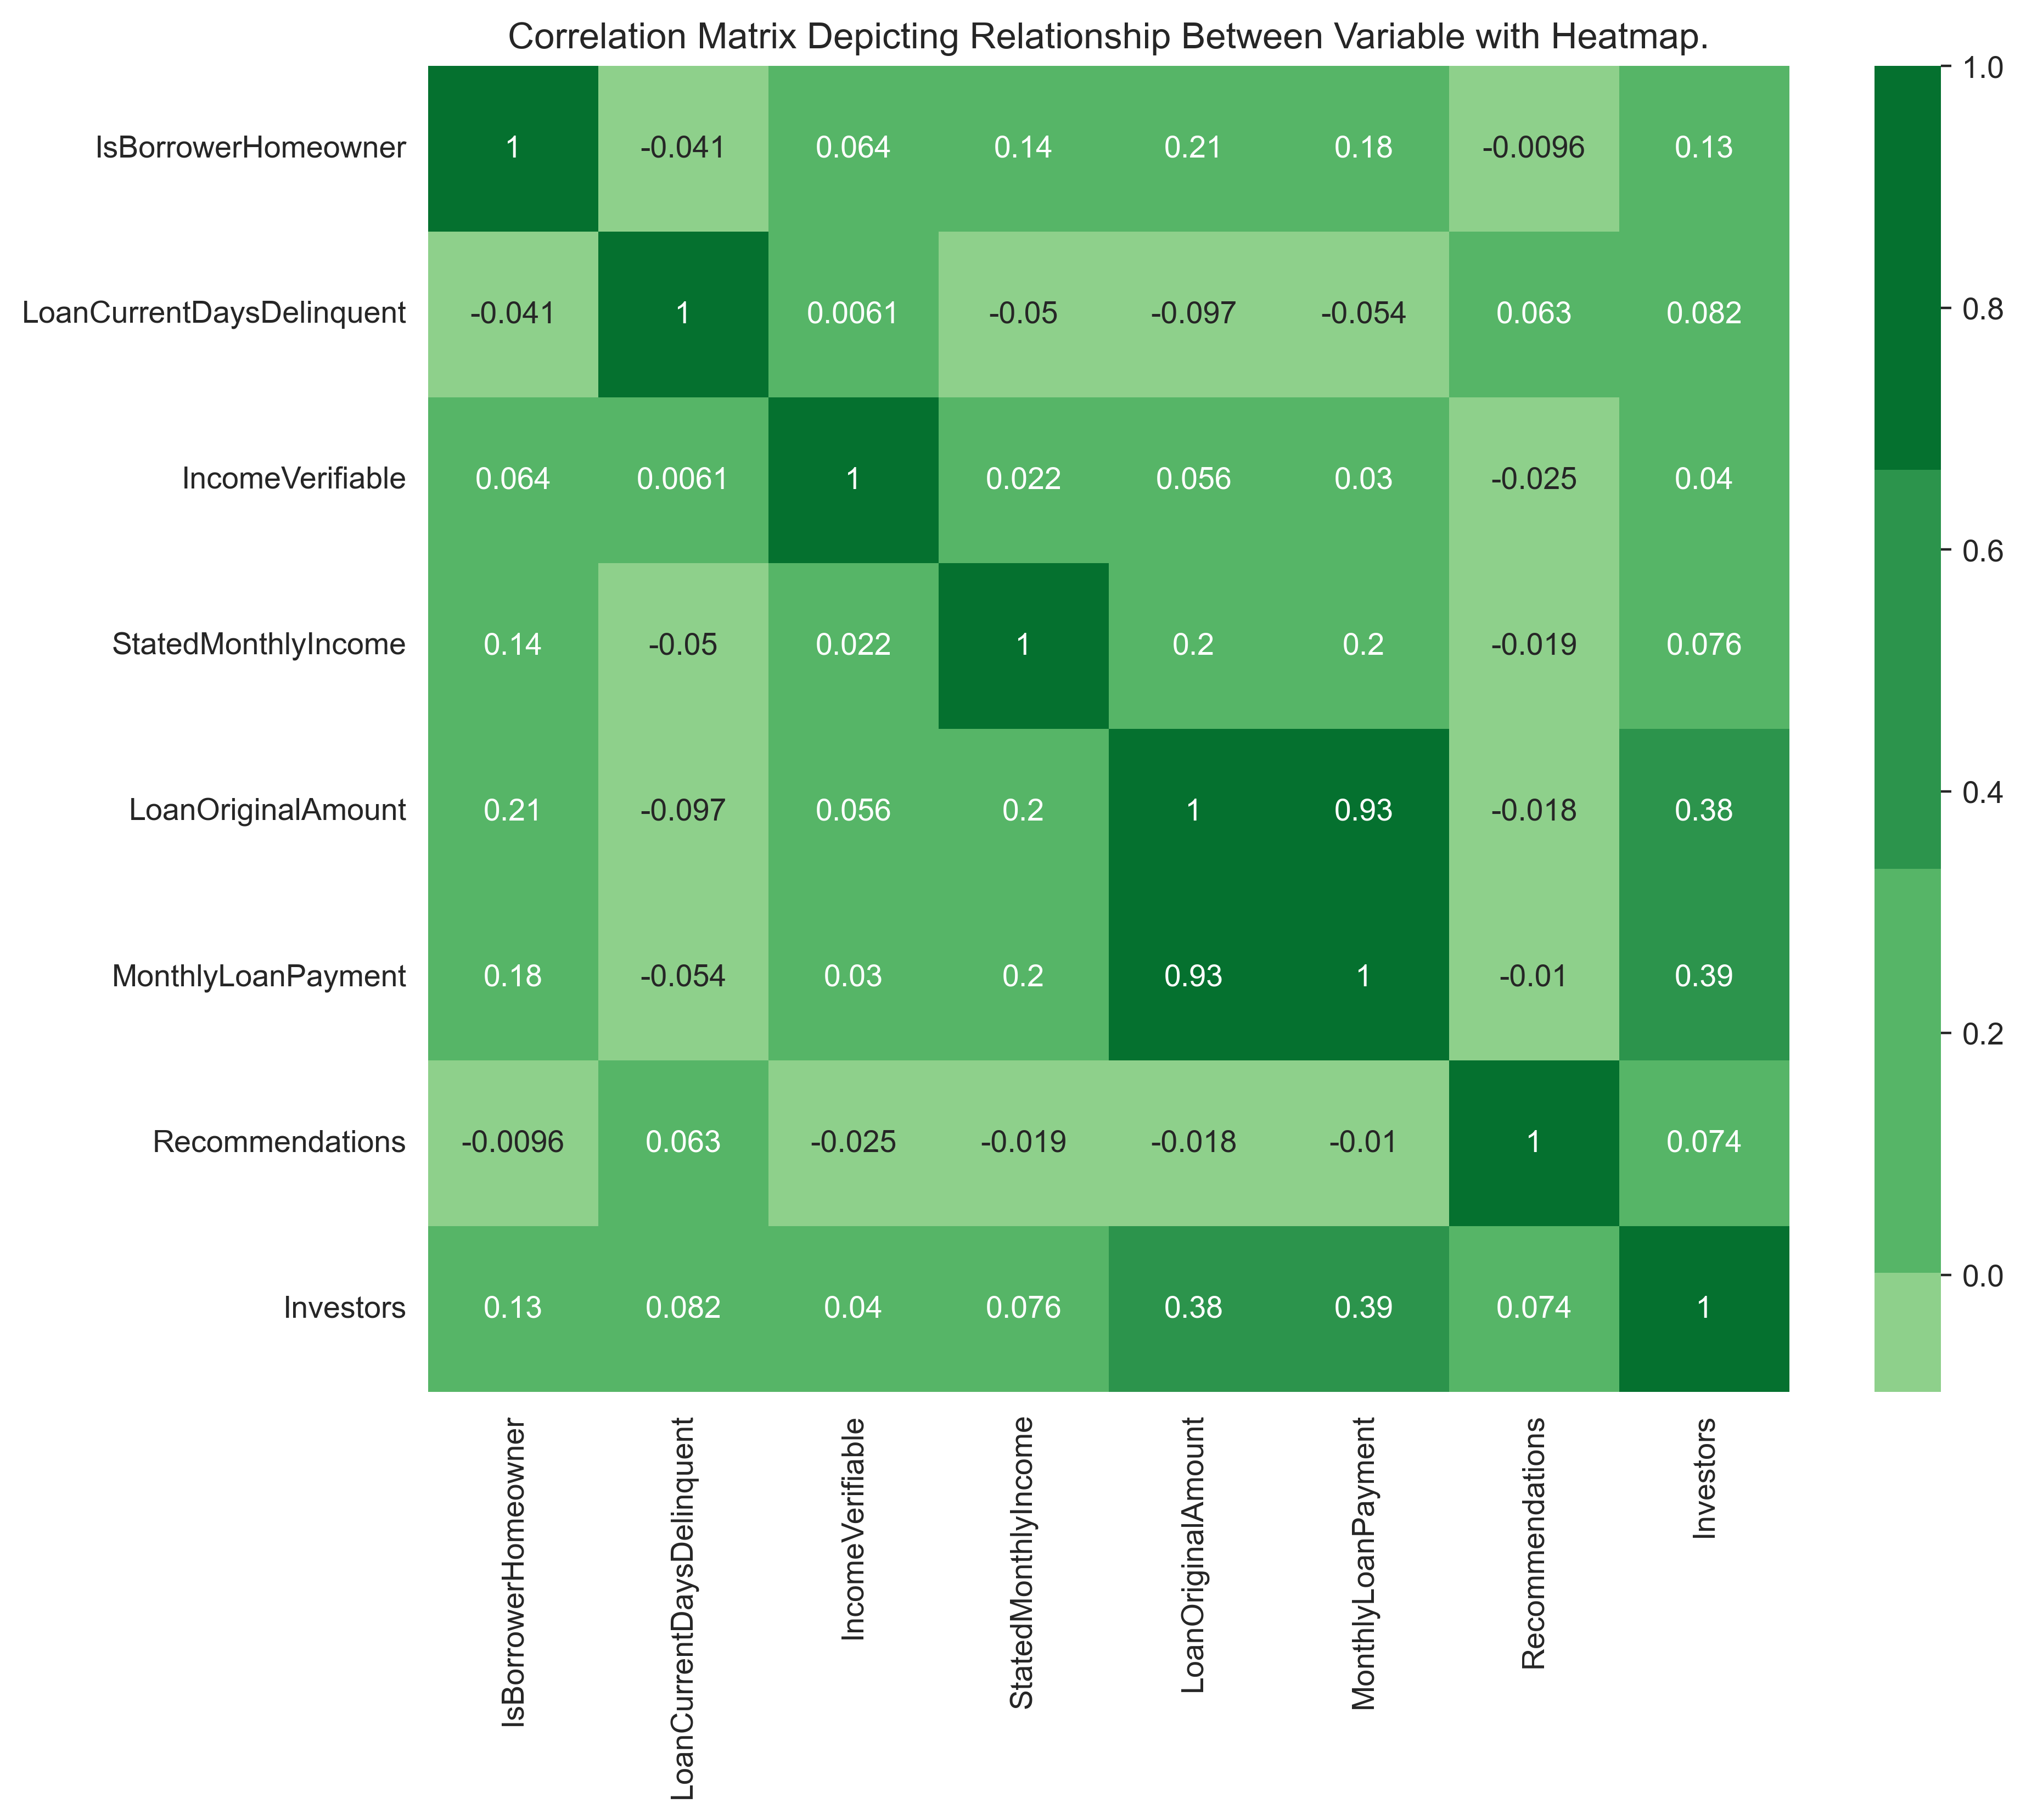

In [249]:
# plot a heatmap to show correlation
plt.figure(figsize=(10,8), dpi = 400)
colormap = sns.color_palette('Greens')
sns.heatmap(prosperloan_reduced.corr(), annot = True, cmap = colormap, center = 0)
plt.title('Correlation Matrix Depicting Relationship Between Variable with Heatmap.')

The reported monthly income and the original loan amount appear to have no link between them, but we can see that there is a positive association between the loan's original amount and the monthly loan payment with a correlation coefficient of 0.93.

> ### Summary

> The data points are spread across a scatterplot categorised by term of loan, year, verifiable income, home ownership, loan status, and employment status plotted on different scatter plots to better depict the spread. Previous research has found a positive relationship between the loan original amount and monthly loan payment. The findings' correlation of continuous numerical variables were also inferred from the heatmap, which showed a positive correlation between the original loan amount and the monthly loan payment with a correlation coefficient of 0.93, but no correlation between the stated monthly income and the original loan amount.

## Conclusions

**The loan origination date column was first converted from object datatype to datetime during the data cleaning process. Next, the year was extracted from the datetime before setting the data type of the extracted year column as categorical variable. Additionally, the loan term values were transformed from the original values of 12 months, 36 months, and 60 months to short term, medium term, and long term. There are values in the loan status that represent past due in several categories of days; these values have been replaced with a single value called "past due" that applies regardless of how many days have passed. The lending state. There are values in the loan status that represent past due in several categories of days; these values have been replaced with a single value called "past due" that applies regardless of how many days have passed. The stated monthly income and monthly loan payment variables, which were converted from float to integer for compatibility with the loan amount data type, were not left out of the transformation of the borrower state values from state abbreviation to full text. The object data type of the occupation column was changed to a categorical data type. Because there are 81 features, the variables that are important for this study were combined into a new dataframe and saved as comma-separated values to be referenced.**

**In the distribution of prior findings, the income verifiable variable has the true value as the largest occurrence, and the spread over the loan status category for the present loan status may be calculated as follows: 52434 have true (verifiable income), while 4142 have false (no verifiable income). There are 1857 borrowers with verified income and 210 borrowers without verifiable income in the past-due category. Borrowers with verified income make up 35292 of the completed loan status category while 2792 do not. According to past studies, the medium term appears to have the largest frequency of loan length in the distribution; the current loan status shows that 20127 loans were classified as long-term, 36387 as medium-term, and only 62 as short-term. There are 684 long-term dues, 1373 medium-term dues, and 10 short-term dues in the past-due category.According to past studies, the true and false values for the home ownership variable are evenly distributed. The distribution across the loan status category for the current loan status can be calculated as follows: 30478 were true (home owner), whereas 26098 were false (no home ownership). The distribution of house ownership in the past-due category is 1003 homes and 1064 no homes. Home ownership is represented by 18280 in the category of loans that have been paid off, whereas 19794 do not. Since the two variables are positively correlated, as the initial loan amount rises, so do the monthly loan payments.The data points are spread across a scatterplot categorised by term of loan, year, verifiable income, home ownership, loan status, and employment status plotted on different scatterplots to better depict the spread. Previous research has shown that there is a positive relationship between the loan original amount and monthly loan payment. We can also infer from the results that continuous numerical variables are correlated. Using the heatmap, we can see that the original loan amount and monthly loan payment have a positive correlation with a correlation coefficient of 0.93, whereas the stated monthly income and the original loan amount appear to be unrelated.**